In [1]:
import numpy as np 
import seaborn as sns
from NNetwork import NNetwork as nn
from src.sampling.Sampling import sampling_SNLD
from src.supervised_NDL.SNDL import sndl_equalEdge, sndl_reg
from util.plotting import *


In [2]:
def affinity_score_cal(graph_list, G_test_path, sample_size_list, k, n_components, iterations):
    # SNDL
    X, y = sampling_SNLD(graph_list, k=k, sample_size_list=sample_size_list)
    W, beta, H = sndl_equalEdge(graph_list, sample_size_1=sample_size_list[0], sample_size_2=sample_size_list[1], k=k, xi=2, n_components=n_components, iter=iterations)
    
    # Load new network
    G_test = nn.NNetwork()
    G_test.load_add_edges(G_test_path, increment_weights=False, use_genfromtxt=True)

    # Evaluate regression
    affinity = sndl_reg(G_test, W, beta, 1000)
    return affinity


In [3]:
def affinity_heatmap(ntwk_list, sample_size_list, k, n_components, iterations):
    graph_paths = []
    graph_list = []
    for ntwk in ntwk_list:
        path = "data/" + str(ntwk) + '.txt'
        graph_paths.append(path)
        G = nn.NNetwork()
        G.load_add_edges(path, increment_weights=False, use_genfromtxt=True)
        graph_list.append(G)

    assert len(graph_paths) == len(graph_list)
    
    num_graphs = len(graph_list)
    affinity_matrix = np.zeros((num_graphs * (num_graphs - 1), num_graphs))
    
    row_labels = []
    idx = 0
    
    for i in range(num_graphs):
        for j in range(num_graphs):
            if i != j:
                row_labels.append(f'{ntwk_list[i]} & {ntwk_list[j]}')
                for l in range(num_graphs):
                    print(f"Iteration: {i, j, l}")
                    G_test = graph_paths[l]
                    affinity_score = affinity_score_cal([graph_list[i], graph_list[j]], G_test, sample_size_list, k, n_components, iterations)
                    affinity_matrix[idx, l] = affinity_score
                idx += 1

    col_labels = [ntwk for ntwk in ntwk_list]

    plt.figure(figsize=(10, 8))
    sns.heatmap(affinity_matrix, annot=True, fmt=".2f", xticklabels=col_labels, yticklabels=row_labels, cmap='Blues')
    plt.xlabel('Test Network')
    plt.ylabel('Network Pair')
    plt.title('Affinity Scores Heatmap')
    plt.show()


Iteration: (0, 1, 0)
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
This is the second sample_size: 125
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
2272.0
1748.0
initial loading beta [[ 0.97378934 -0.33454889  0.01923121  0.95060618 -0.33466724 -0.7449227
  -0.03019108 -0.64573365  0.03222788 -0.53380969 -0.100065    0.74300313
  -0.50489228  0.24003155 -0.64333842  0.93823393 -0.94231392]]


  1%|          | 1/125 [00:00<01:00,  2.06it/s]

--- Training --- [threshold, AUC] =  [0.601, 0.817]
--- Iteration 0: Training loss --- [Data, Label, Total] = [1840.191864.3, 137.923806.3, 3818.307534.3]
--- Training --- [threshold, AUC] =  [0.644, 0.813]
--- Iteration 10: Training loss --- [Data, Label, Total] = [479.163869.3, 137.251525.3, 1095.579262.3]
!!! pred_type filter


  9%|▉         | 11/125 [00:00<00:07, 15.89it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.644, 0.813, 0.756, 0.719]
--- Training --- [threshold, AUC] =  [0.644, 0.817]
--- Iteration 20: Training loss --- [Data, Label, Total] = [286.331043.3, 135.876114.3, 708.538201.3]
!!! pred_type filter


 17%|█▋        | 21/125 [00:01<00:04, 24.87it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.644, 0.817, 0.76, 0.722]
--- Training --- [threshold, AUC] =  [0.487, 0.819]
--- Iteration 30: Training loss --- [Data, Label, Total] = [198.781131.3, 135.753440.3, 533.315703.3]
!!! pred_type filter


 31%|███       | 39/125 [00:01<00:02, 38.86it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.487, 0.819, 0.76, 0.779]
--- Training --- [threshold, AUC] =  [0.528, 0.82]
--- Iteration 40: Training loss --- [Data, Label, Total] = [151.494086.3, 135.915220.3, 438.903391.3]
!!! pred_type filter


 36%|███▌      | 45/125 [00:01<00:02, 36.04it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.528, 0.82, 0.76, 0.773]
--- Training --- [threshold, AUC] =  [0.527, 0.822]
--- Iteration 50: Training loss --- [Data, Label, Total] = [123.430298.3, 136.100978.3, 382.961574.3]
!!! pred_type filter


 49%|████▉     | 61/125 [00:01<00:01, 39.05it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.527, 0.822, 0.764, 0.776]
--- Training --- [threshold, AUC] =  [0.526, 0.822]
--- Iteration 60: Training loss --- [Data, Label, Total] = [106.685943.3, 136.307387.3, 349.679274.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.526, 0.822, 0.764, 0.776]


 57%|█████▋    | 71/125 [00:02<00:01, 41.29it/s]

--- Training --- [threshold, AUC] =  [0.525, 0.823]
--- Iteration 70: Training loss --- [Data, Label, Total] = [95.209020.3, 136.514691.3, 326.932732.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.525, 0.823, 0.768, 0.78]


 65%|██████▍   | 81/125 [00:02<00:00, 44.79it/s]

--- Training --- [threshold, AUC] =  [0.524, 0.823]
--- Iteration 80: Training loss --- [Data, Label, Total] = [86.571355.3, 136.703181.3, 309.845890.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.524, 0.823, 0.764, 0.777]


 73%|███████▎  | 91/125 [00:02<00:00, 46.70it/s]

--- Training --- [threshold, AUC] =  [0.531, 0.821]
--- Iteration 90: Training loss --- [Data, Label, Total] = [80.125441.3, 136.853584.3, 297.104466.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.531, 0.821, 0.756, 0.743]
--- Training --- [threshold, AUC] =  [0.533, 0.821]
--- Iteration 100: Training loss --- [Data, Label, Total] = [75.731501.3, 136.967396.3, 288.430399.3]
!!! pred_type filter


 89%|████████▉ | 111/125 [00:02<00:00, 51.48it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.533, 0.821, 0.756, 0.743]
--- Training --- [threshold, AUC] =  [0.534, 0.821]
--- Iteration 110: Training loss --- [Data, Label, Total] = [72.850644.3, 137.038731.3, 282.740020.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.534, 0.821, 0.756, 0.743]


100%|██████████| 125/125 [00:03<00:00, 39.87it/s]

--- Training --- [threshold, AUC] =  [0.517, 0.822]
--- Iteration 120: Training loss --- [Data, Label, Total] = [70.923790.3, 137.072387.3, 278.919967.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.517, 0.822, 0.76, 0.778]
!!! pred_type filter


Iteration: (0, 1, 1)
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
This is the second sample_size: 125
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
2358.0
1828.0
initial loading beta [[-0.60942486  0.07204502  0.86919972 -0.87311016  0.63897267  0.46068793
  -0.07283585  0.30034634 -0.64999173  0.16450024 -0.48343051 -0.24368777
   0.30930816 -0.36682237  0.07547355  0.57074169  0.16940899]]


  0%|          | 0/125 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.542, 0.807]
--- Iteration 0: Training loss --- [Data, Label, Total] = [1986.015307.3, 142.200687.3, 4114.231300.3]
--- Training --- [threshold, AUC] =  [0.625, 0.815]
--- Iteration 10: Training loss --- [Data, Label, Total] = [490.845855.3, 140.908933.3, 1122.600643.3]
!!! pred_type filter


  9%|▉         | 11/125 [00:00<00:02, 52.19it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.625, 0.815, 0.764, 0.731]
--- Training --- [threshold, AUC] =  [0.61, 0.818]
--- Iteration 20: Training loss --- [Data, Label, Total] = [312.170211.3, 139.931772.3, 764.272193.3]
!!! pred_type filter


 17%|█▋        | 21/125 [00:00<00:02, 48.74it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.61, 0.818, 0.768, 0.741]
--- Training --- [threshold, AUC] =  [0.556, 0.819]
--- Iteration 30: Training loss --- [Data, Label, Total] = [228.734683.3, 139.699879.3, 597.169245.3]
!!! pred_type filter


 33%|███▎      | 41/125 [00:00<00:01, 48.49it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.556, 0.819, 0.768, 0.772]
--- Training --- [threshold, AUC] =  [0.533, 0.821]
--- Iteration 40: Training loss --- [Data, Label, Total] = [192.519450.3, 139.719022.3, 524.757922.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.533, 0.821, 0.768, 0.779]


 41%|████      | 51/125 [00:01<00:01, 47.59it/s]

--- Training --- [threshold, AUC] =  [0.546, 0.821]
--- Iteration 50: Training loss --- [Data, Label, Total] = [175.965049.3, 139.834846.3, 491.764944.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.546, 0.821, 0.768, 0.777]
--- Training --- [threshold, AUC] =  [0.549, 0.822]
--- Iteration 60: Training loss --- [Data, Label, Total] = [164.506535.3, 139.955311.3, 468.968381.3]
!!! pred_type filter


 57%|█████▋    | 71/125 [00:01<00:01, 48.11it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.549, 0.822, 0.772, 0.769]
--- Training --- [threshold, AUC] =  [0.554, 0.823]
--- Iteration 70: Training loss --- [Data, Label, Total] = [154.891454.3, 140.023249.3, 449.806156.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.554, 0.823, 0.772, 0.765]


 65%|██████▍   | 81/125 [00:01<00:00, 47.47it/s]

--- Training --- [threshold, AUC] =  [0.549, 0.822]
--- Iteration 80: Training loss --- [Data, Label, Total] = [146.593349.3, 140.049021.3, 433.235720.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.549, 0.822, 0.776, 0.772]


 73%|███████▎  | 91/125 [00:01<00:00, 46.83it/s]

--- Training --- [threshold, AUC] =  [0.549, 0.822]
--- Iteration 90: Training loss --- [Data, Label, Total] = [138.947588.3, 140.047758.3, 417.942934.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.549, 0.822, 0.776, 0.772]


 81%|████████  | 101/125 [00:02<00:00, 44.65it/s]

--- Training --- [threshold, AUC] =  [0.55, 0.823]
--- Iteration 100: Training loss --- [Data, Label, Total] = [130.771738.3, 140.038249.3, 401.581724.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.55, 0.823, 0.776, 0.772]


 89%|████████▉ | 111/125 [00:02<00:00, 45.13it/s]

--- Training --- [threshold, AUC] =  [0.55, 0.823]
--- Iteration 110: Training loss --- [Data, Label, Total] = [122.690845.3, 140.028169.3, 385.409859.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.55, 0.823, 0.776, 0.772]


100%|██████████| 125/125 [00:02<00:00, 47.74it/s]

--- Training --- [threshold, AUC] =  [0.551, 0.823]
--- Iteration 120: Training loss --- [Data, Label, Total] = [116.506805.3, 140.041772.3, 373.055381.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.551, 0.823, 0.776, 0.772]
!!! pred_type filter


Iteration: (0, 1, 2)
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
This is the second sample_size: 125
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
2282.0
1786.0
initial loading beta [[ 0.13749951  0.39566405 -0.23646907  0.37820377  0.29976294  0.8369452
  -0.90189843 -0.98283122  0.57490749  0.54823575  0.05375197 -0.02967396
  -0.46702099 -0.45986977 -0.96067347  0.80361512 -0.71317562]]


  0%|          | 0/125 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.528, 0.814]
--- Iteration 0: Training loss --- [Data, Label, Total] = [1871.810673.3, 135.844349.3, 3879.465694.3]
--- Training --- [threshold, AUC] =  [0.558, 0.814]
--- Iteration 10: Training loss --- [Data, Label, Total] = [464.307480.3, 138.249033.3, 1066.863994.3]
!!! pred_type filter


 17%|█▋        | 21/125 [00:00<00:02, 48.92it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.558, 0.814, 0.764, 0.763]
--- Training --- [threshold, AUC] =  [0.553, 0.821]
--- Iteration 20: Training loss --- [Data, Label, Total] = [279.997776.3, 137.336320.3, 697.331872.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.553, 0.821, 0.768, 0.766]


 30%|██▉       | 37/125 [00:00<00:01, 50.98it/s]

--- Training --- [threshold, AUC] =  [0.525, 0.822]
--- Iteration 30: Training loss --- [Data, Label, Total] = [201.910783.3, 136.362622.3, 540.184189.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.525, 0.822, 0.764, 0.776]


 34%|███▍      | 43/125 [00:00<00:01, 44.07it/s]

--- Training --- [threshold, AUC] =  [0.515, 0.824]
--- Iteration 40: Training loss --- [Data, Label, Total] = [158.286549.3, 135.994215.3, 452.567313.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.515, 0.824, 0.772, 0.787]


 41%|████      | 51/125 [00:01<00:01, 42.42it/s]

--- Training --- [threshold, AUC] =  [0.526, 0.824]
--- Iteration 50: Training loss --- [Data, Label, Total] = [131.741296.3, 136.115109.3, 399.597701.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.526, 0.824, 0.772, 0.785]


 49%|████▉     | 61/125 [00:01<00:01, 45.03it/s]

--- Training --- [threshold, AUC] =  [0.529, 0.825]
--- Iteration 60: Training loss --- [Data, Label, Total] = [113.175924.3, 136.426454.3, 362.778302.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.529, 0.825, 0.776, 0.788]
--- Training --- [threshold, AUC] =  [0.523, 0.826]
--- Iteration 70: Training loss --- [Data, Label, Total] = [99.468413.3, 136.716350.3, 335.653177.3]
!!! pred_type filter


 65%|██████▍   | 81/125 [00:01<00:00, 47.00it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.523, 0.826, 0.776, 0.789]
--- Training --- [threshold, AUC] =  [0.524, 0.826]
--- Iteration 80: Training loss --- [Data, Label, Total] = [89.927246.3, 136.911065.3, 316.765557.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.524, 0.826, 0.78, 0.792]


 73%|███████▎  | 91/125 [00:01<00:00, 46.79it/s]

--- Training --- [threshold, AUC] =  [0.523, 0.826]
--- Iteration 90: Training loss --- [Data, Label, Total] = [83.729979.3, 137.008599.3, 304.468556.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.523, 0.826, 0.776, 0.789]
--- Training --- [threshold, AUC] =  [0.521, 0.826]
--- Iteration 100: Training loss --- [Data, Label, Total] = [79.523042.3, 137.035860.3, 296.081943.3]
!!! pred_type filter


 89%|████████▉ | 111/125 [00:02<00:00, 49.60it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.521, 0.826, 0.78, 0.792]
--- Training --- [threshold, AUC] =  [0.52, 0.826]
--- Iteration 110: Training loss --- [Data, Label, Total] = [76.178807.3, 137.006107.3, 289.363721.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.52, 0.826, 0.78, 0.792]


100%|██████████| 125/125 [00:02<00:00, 49.51it/s]

--- Training --- [threshold, AUC] =  [0.518, 0.827]
--- Iteration 120: Training loss --- [Data, Label, Total] = [72.919425.3, 136.950546.3, 282.789395.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.518, 0.827, 0.78, 0.792]
!!! pred_type filter


Iteration: (0, 2, 0)
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
This is the second sample_size: 125
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
2320.0
1852.0
initial loading beta [[-0.25494781  0.99391014 -0.76808059 -0.13084818 -0.76691723  0.12202276
  -0.88312554  0.9953192   0.98690922  0.25107651 -0.79720106 -0.97906058
  -0.71474675 -0.75865322  0.57069827 -0.28967592 -0.35979781]]


  0%|          | 0/125 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.535, 0.778]
--- Iteration 0: Training loss --- [Data, Label, Total] = [1881.967675.3, 144.838702.3, 3908.774051.3]
--- Training --- [threshold, AUC] =  [0.53, 0.78]
--- Iteration 10: Training loss --- [Data, Label, Total] = [544.979488.3, 144.860798.3, 1234.819774.3]
!!! pred_type filter


  9%|▉         | 11/125 [00:00<00:02, 50.70it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.53, 0.78, 0.712, 0.705]
--- Training --- [threshold, AUC] =  [0.541, 0.783]
--- Iteration 20: Training loss --- [Data, Label, Total] = [347.699408.3, 144.547567.3, 839.946383.3]
!!! pred_type filter


 25%|██▍       | 31/125 [00:00<00:01, 50.17it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.541, 0.783, 0.716, 0.713]
--- Training --- [threshold, AUC] =  [0.55, 0.784]
--- Iteration 30: Training loss --- [Data, Label, Total] = [245.177222.3, 144.541264.3, 634.895708.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.55, 0.784, 0.72, 0.713]


 33%|███▎      | 41/125 [00:00<00:01, 50.11it/s]

--- Training --- [threshold, AUC] =  [0.558, 0.787]
--- Iteration 40: Training loss --- [Data, Label, Total] = [161.935782.3, 144.348451.3, 468.220015.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.558, 0.787, 0.72, 0.708]
--- Training --- [threshold, AUC] =  [0.55, 0.79]
--- Iteration 50: Training loss --- [Data, Label, Total] = [111.471705.3, 144.319136.3, 367.262547.3]
!!! pred_type filter


 41%|████      | 51/125 [00:01<00:01, 48.74it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.55, 0.79, 0.724, 0.716]
--- Training --- [threshold, AUC] =  [0.557, 0.791]
--- Iteration 60: Training loss --- [Data, Label, Total] = [84.215356.3, 144.465745.3, 312.896457.3]
!!! pred_type filter


 57%|█████▋    | 71/125 [00:01<00:01, 50.73it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.557, 0.791, 0.724, 0.714]
--- Training --- [threshold, AUC] =  [0.556, 0.793]
--- Iteration 70: Training loss --- [Data, Label, Total] = [67.733344.3, 144.615336.3, 280.082024.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.556, 0.793, 0.724, 0.714]


 65%|██████▍   | 81/125 [00:01<00:00, 53.06it/s]

--- Training --- [threshold, AUC] =  [0.562, 0.793]
--- Iteration 80: Training loss --- [Data, Label, Total] = [58.722489.3, 144.689584.3, 262.134563.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.562, 0.793, 0.72, 0.706]
--- Training --- [threshold, AUC] =  [0.566, 0.793]
--- Iteration 90: Training loss --- [Data, Label, Total] = [54.292832.3, 144.700367.3, 253.286032.3]
!!! pred_type filter


 81%|████████  | 101/125 [00:01<00:00, 54.75it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.566, 0.793, 0.72, 0.706]
--- Training --- [threshold, AUC] =  [0.569, 0.795]
--- Iteration 100: Training loss --- [Data, Label, Total] = [52.243012.3, 144.673960.3, 249.159984.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.569, 0.795, 0.724, 0.699]


 89%|████████▉ | 111/125 [00:02<00:00, 56.43it/s]

--- Training --- [threshold, AUC] =  [0.568, 0.796]
--- Iteration 110: Training loss --- [Data, Label, Total] = [51.323309.3, 144.622776.3, 247.269393.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.568, 0.796, 0.724, 0.704]
--- Training --- [threshold, AUC] =  [0.568, 0.796]
--- Iteration 120: Training loss --- [Data, Label, Total] = [50.925114.3, 144.548564.3, 246.398792.3]
!!! pred_type filter


100%|██████████| 125/125 [00:02<00:00, 54.34it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.568, 0.796, 0.724, 0.704]
!!! pred_type filter


Iteration: (0, 2, 1)
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
This is the second sample_size: 125
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
2198.0
1808.0
initial loading beta [[-0.56003393  0.06020802  0.84438351 -0.56996326  0.187138   -0.37383921
   0.07221117 -0.08031665 -0.30146942 -0.71895368  0.81767697  0.87716829
   0.85436971 -0.42860767  0.80245376  0.56393567  0.92719367]]


  0%|          | 0/125 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.447, 0.757]
--- Iteration 0: Training loss --- [Data, Label, Total] = [1920.280731.3, 149.095703.3, 3989.657166.3]
--- Training --- [threshold, AUC] =  [0.641, 0.762]
--- Iteration 10: Training loss --- [Data, Label, Total] = [480.377399.3, 148.354416.3, 1109.109213.3]
!!! pred_type filter


  9%|▉         | 11/125 [00:00<00:02, 46.63it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.641, 0.762, 0.7, 0.634]
--- Training --- [threshold, AUC] =  [0.499, 0.769]
--- Iteration 20: Training loss --- [Data, Label, Total] = [327.357369.3, 147.609415.3, 802.324152.3]
!!! pred_type filter


 17%|█▋        | 21/125 [00:00<00:02, 47.63it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.499, 0.769, 0.708, 0.727]
--- Training --- [threshold, AUC] =  [0.517, 0.77]
--- Iteration 30: Training loss --- [Data, Label, Total] = [224.283513.3, 147.803044.3, 596.370070.3]
!!! pred_type filter


 33%|███▎      | 41/125 [00:00<00:01, 46.11it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.517, 0.77, 0.708, 0.714]
--- Training --- [threshold, AUC] =  [0.556, 0.771]
--- Iteration 40: Training loss --- [Data, Label, Total] = [155.393067.3, 148.008140.3, 458.794274.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.556, 0.771, 0.708, 0.695]


 41%|████      | 51/125 [00:01<00:01, 46.16it/s]

--- Training --- [threshold, AUC] =  [0.557, 0.773]
--- Iteration 50: Training loss --- [Data, Label, Total] = [119.712810.3, 148.108709.3, 387.534329.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.557, 0.773, 0.716, 0.7]


 49%|████▉     | 61/125 [00:01<00:01, 47.13it/s]

--- Training --- [threshold, AUC] =  [0.558, 0.773]
--- Iteration 60: Training loss --- [Data, Label, Total] = [106.197634.3, 148.211974.3, 360.607242.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.558, 0.773, 0.72, 0.706]


 57%|█████▋    | 71/125 [00:01<00:01, 47.03it/s]

--- Training --- [threshold, AUC] =  [0.557, 0.775]
--- Iteration 70: Training loss --- [Data, Label, Total] = [100.944769.3, 148.300547.3, 350.190086.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.557, 0.775, 0.72, 0.706]


 65%|██████▍   | 81/125 [00:01<00:00, 46.73it/s]

--- Training --- [threshold, AUC] =  [0.517, 0.775]
--- Iteration 80: Training loss --- [Data, Label, Total] = [98.748589.3, 148.350971.3, 345.848149.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.517, 0.775, 0.72, 0.722]


 73%|███████▎  | 91/125 [00:01<00:00, 46.56it/s]

--- Training --- [threshold, AUC] =  [0.518, 0.775]
--- Iteration 90: Training loss --- [Data, Label, Total] = [97.725304.3, 148.362751.3, 343.813360.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.518, 0.775, 0.72, 0.722]


 81%|████████  | 101/125 [00:02<00:00, 46.30it/s]

--- Training --- [threshold, AUC] =  [0.523, 0.775]
--- Iteration 100: Training loss --- [Data, Label, Total] = [97.166013.3, 148.352586.3, 342.684611.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.523, 0.775, 0.72, 0.72]


 89%|████████▉ | 111/125 [00:02<00:00, 46.39it/s]

--- Training --- [threshold, AUC] =  [0.523, 0.776]
--- Iteration 110: Training loss --- [Data, Label, Total] = [96.821292.3, 148.329811.3, 341.972396.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.523, 0.776, 0.72, 0.72]


100%|██████████| 125/125 [00:02<00:00, 46.93it/s]

--- Training --- [threshold, AUC] =  [0.522, 0.776]
--- Iteration 120: Training loss --- [Data, Label, Total] = [96.562308.3, 148.297611.3, 341.422227.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.522, 0.776, 0.72, 0.722]


!!! pred_type filter
Iteration: (0, 2, 2)
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
This is the second sample_size: 125
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
2340.0
1764.0
initial loading beta [[-0.68207831 -0.31406512  0.64067122  0.55904138 -0.60511459  0.43198835
   0.84756075  0.3238203   0.04781441  0.06389683 -0.93938411  0.48923802
   0.75734132  0.86028703 -0.72644662  0.16842061  0.15387369]]


  0%|          | 0/125 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.485, 0.828]
--- Iteration 0: Training loss --- [Data, Label, Total] = [1951.319710.3, 125.472296.3, 4028.111715.3]
--- Training --- [threshold, AUC] =  [0.451, 0.827]
--- Iteration 10: Training loss --- [Data, Label, Total] = [467.176061.3, 126.610346.3, 1060.962468.3]
!!! pred_type filter


  9%|▉         | 11/125 [00:00<00:02, 45.33it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.451, 0.827, 0.768, 0.791]
--- Training --- [threshold, AUC] =  [0.439, 0.826]
--- Iteration 20: Training loss --- [Data, Label, Total] = [287.075574.3, 127.049165.3, 701.200313.3]
!!! pred_type filter


 17%|█▋        | 21/125 [00:00<00:02, 45.64it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.439, 0.826, 0.764, 0.79]
--- Training --- [threshold, AUC] =  [0.501, 0.827]
--- Iteration 30: Training loss --- [Data, Label, Total] = [218.326526.3, 127.407244.3, 564.060297.3]
!!! pred_type filter


 25%|██▍       | 31/125 [00:00<00:02, 46.60it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.501, 0.827, 0.764, 0.781]
--- Training --- [threshold, AUC] =  [0.503, 0.828]
--- Iteration 40: Training loss --- [Data, Label, Total] = [180.054405.3, 127.705877.3, 487.814687.3]
!!! pred_type filter


 33%|███▎      | 41/125 [00:00<00:01, 46.26it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.503, 0.828, 0.764, 0.781]


 40%|████      | 50/125 [00:00<00:01, 54.95it/s]

--- Training --- [threshold, AUC] =  [0.503, 0.829]
--- Iteration 50: Training loss --- [Data, Label, Total] = [158.251661.3, 127.876962.3, 444.380284.3]
!!! pred_type filter


 46%|████▌     | 57/125 [00:01<00:01, 48.24it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.503, 0.829, 0.768, 0.784]
--- Training --- [threshold, AUC] =  [0.509, 0.829]
--- Iteration 60: Training loss --- [Data, Label, Total] = [142.945529.3, 127.943206.3, 413.834264.3]
!!! pred_type filter


 50%|█████     | 63/125 [00:01<00:01, 41.95it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.509, 0.829, 0.768, 0.78]
--- Training --- [threshold, AUC] =  [0.509, 0.829]
--- Iteration 70: Training loss --- [Data, Label, Total] = [128.377705.3, 128.023008.3, 384.778418.3]
!!! pred_type filter


 65%|██████▍   | 81/125 [00:01<00:00, 45.24it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.509, 0.829, 0.768, 0.78]
--- Training --- [threshold, AUC] =  [0.509, 0.829]
--- Iteration 80: Training loss --- [Data, Label, Total] = [114.319941.3, 128.124966.3, 356.764848.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.509, 0.829, 0.768, 0.78]


 73%|███████▎  | 91/125 [00:01<00:00, 46.75it/s]

--- Training --- [threshold, AUC] =  [0.51, 0.829]
--- Iteration 90: Training loss --- [Data, Label, Total] = [103.611055.3, 128.205417.3, 335.427527.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.51, 0.829, 0.768, 0.78]


 81%|████████  | 101/125 [00:02<00:00, 46.66it/s]

--- Training --- [threshold, AUC] =  [0.51, 0.828]
--- Iteration 100: Training loss --- [Data, Label, Total] = [97.228166.3, 128.279461.3, 322.735794.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.51, 0.828, 0.768, 0.78]
--- Training --- [threshold, AUC] =  [0.509, 0.828]
--- Iteration 110: Training loss --- [Data, Label, Total] = [92.739338.3, 128.343012.3, 313.821688.3]
!!! pred_type filter


100%|██████████| 125/125 [00:02<00:00, 48.64it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.509, 0.828, 0.768, 0.78]
--- Training --- [threshold, AUC] =  [0.508, 0.828]
--- Iteration 120: Training loss --- [Data, Label, Total] = [88.918312.3, 128.403217.3, 306.239842.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.508, 0.828, 0.768, 0.78]


!!! pred_type filter
Iteration: (1, 0, 0)
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
This is the second sample_size: 125
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
1810.0
2382.0
initial loading beta [[ 0.87851808 -0.95112646 -0.06831615 -0.5006138  -0.83485069  0.74747827
  -0.3067711   0.11141497  0.08868028 -0.89821114 -0.10064233 -0.74274308
  -0.70819418  0.0831841  -0.77596485  0.8755891  -0.69217262]]


  0%|          | 0/125 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.467, 0.849]
--- Iteration 0: Training loss --- [Data, Label, Total] = [1979.053119.3, 125.756985.3, 4083.863224.3]
--- Training --- [threshold, AUC] =  [0.463, 0.839]
--- Iteration 10: Training loss --- [Data, Label, Total] = [523.276286.3, 129.859723.3, 1176.412295.3]
!!! pred_type filter


 17%|█▋        | 21/125 [00:00<00:02, 48.81it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.463, 0.839, 0.792, 0.797]
--- Training --- [threshold, AUC] =  [0.488, 0.847]
--- Iteration 20: Training loss --- [Data, Label, Total] = [340.275804.3, 128.188400.3, 808.740007.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.488, 0.847, 0.808, 0.806]


 25%|██▍       | 31/125 [00:00<00:01, 49.24it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.85]
--- Iteration 30: Training loss --- [Data, Label, Total] = [259.156007.3, 127.579637.3, 645.891652.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.502, 0.85, 0.804, 0.797]
--- Training --- [threshold, AUC] =  [0.476, 0.852]
--- Iteration 40: Training loss --- [Data, Label, Total] = [217.191015.3, 126.934140.3, 561.316170.3]
!!! pred_type filter


 41%|████      | 51/125 [00:01<00:01, 50.22it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.476, 0.852, 0.808, 0.805]
--- Training --- [threshold, AUC] =  [0.477, 0.854]
--- Iteration 50: Training loss --- [Data, Label, Total] = [188.960849.3, 126.644813.3, 504.566511.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.477, 0.854, 0.808, 0.805]


 49%|████▉     | 61/125 [00:01<00:01, 51.60it/s]

--- Training --- [threshold, AUC] =  [0.479, 0.854]
--- Iteration 60: Training loss --- [Data, Label, Total] = [165.012477.3, 126.587511.3, 456.612465.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.479, 0.854, 0.804, 0.8]
--- Training --- [threshold, AUC] =  [0.505, 0.855]
--- Iteration 70: Training loss --- [Data, Label, Total] = [145.452058.3, 126.661983.3, 417.566099.3]
!!! pred_type filter


 65%|██████▍   | 81/125 [00:01<00:00, 51.70it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.505, 0.855, 0.808, 0.797]
--- Training --- [threshold, AUC] =  [0.482, 0.854]
--- Iteration 80: Training loss --- [Data, Label, Total] = [131.874523.3, 126.758381.3, 390.507428.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.482, 0.854, 0.804, 0.8]


 73%|███████▎  | 91/125 [00:01<00:00, 52.99it/s]

--- Training --- [threshold, AUC] =  [0.507, 0.855]
--- Iteration 90: Training loss --- [Data, Label, Total] = [123.069332.3, 126.823045.3, 372.961709.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.507, 0.855, 0.804, 0.791]
--- Training --- [threshold, AUC] =  [0.511, 0.855]
--- Iteration 100: Training loss --- [Data, Label, Total] = [116.878106.3, 126.859394.3, 360.615606.3]
!!! pred_type filter


 89%|████████▉ | 111/125 [00:02<00:00, 53.48it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.511, 0.855, 0.804, 0.79]
--- Training --- [threshold, AUC] =  [0.512, 0.855]
--- Iteration 110: Training loss --- [Data, Label, Total] = [111.921737.3, 126.851802.3, 350.695276.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.512, 0.855, 0.804, 0.79]


100%|██████████| 125/125 [00:02<00:00, 53.07it/s]

--- Training --- [threshold, AUC] =  [0.512, 0.854]
--- Iteration 120: Training loss --- [Data, Label, Total] = [107.201675.3, 126.779733.3, 341.183083.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.512, 0.854, 0.804, 0.79]
!!! pred_type filter


Iteration: (1, 0, 1)
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
This is the second sample_size: 125
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
1786.0
2236.0
initial loading beta [[ 0.8019808   0.16841988 -0.18933231 -0.5385326   0.61692799  0.43077242
  -0.44498384 -0.45698284 -0.40743512 -0.51072294 -0.34722044 -0.00404941
   0.90515495  0.03932669  0.63886576  0.85032628 -0.99492617]]


  0%|          | 0/125 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.418, 0.762]
--- Iteration 0: Training loss --- [Data, Label, Total] = [1902.920783.3, 147.186654.3, 3953.028220.3]
--- Training --- [threshold, AUC] =  [0.441, 0.768]
--- Iteration 10: Training loss --- [Data, Label, Total] = [492.789296.3, 146.302408.3, 1131.881000.3]
!!! pred_type filter


  9%|▉         | 11/125 [00:00<00:02, 44.03it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.441, 0.768, 0.712, 0.725]
--- Training --- [threshold, AUC] =  [0.468, 0.773]
--- Iteration 20: Training loss --- [Data, Label, Total] = [287.370971.3, 145.522804.3, 720.264745.3]
!!! pred_type filter


 17%|█▋        | 21/125 [00:00<00:02, 42.97it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.468, 0.773, 0.72, 0.711]
--- Training --- [threshold, AUC] =  [0.475, 0.781]
--- Iteration 30: Training loss --- [Data, Label, Total] = [213.349724.3, 145.331037.3, 572.030485.3]
!!! pred_type filter


 25%|██▍       | 31/125 [00:00<00:02, 44.68it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.475, 0.781, 0.716, 0.703]
--- Training --- [threshold, AUC] =  [0.481, 0.781]
--- Iteration 40: Training loss --- [Data, Label, Total] = [178.765284.3, 145.424853.3, 502.955422.3]
!!! pred_type filter


 33%|███▎      | 41/125 [00:00<00:01, 43.75it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.481, 0.781, 0.716, 0.698]
--- Training --- [threshold, AUC] =  [0.482, 0.78]
--- Iteration 50: Training loss --- [Data, Label, Total] = [160.728568.3, 145.603546.3, 467.060683.3]
!!! pred_type filter


 49%|████▉     | 61/125 [00:01<00:01, 46.48it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.482, 0.78, 0.716, 0.698]
--- Training --- [threshold, AUC] =  [0.481, 0.78]
--- Iteration 60: Training loss --- [Data, Label, Total] = [150.046537.3, 145.769819.3, 445.862893.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.481, 0.78, 0.716, 0.698]


 57%|█████▋    | 71/125 [00:01<00:01, 46.30it/s]

--- Training --- [threshold, AUC] =  [0.485, 0.779]
--- Iteration 70: Training loss --- [Data, Label, Total] = [142.412661.3, 145.931167.3, 430.756488.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.485, 0.779, 0.712, 0.692]


 65%|██████▍   | 81/125 [00:01<00:00, 45.15it/s]

--- Training --- [threshold, AUC] =  [0.458, 0.779]
--- Iteration 80: Training loss --- [Data, Label, Total] = [134.784974.3, 146.086809.3, 415.656757.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.458, 0.779, 0.712, 0.707]


 73%|███████▎  | 91/125 [00:02<00:00, 45.46it/s]

--- Training --- [threshold, AUC] =  [0.461, 0.779]
--- Iteration 90: Training loss --- [Data, Label, Total] = [125.008997.3, 146.225180.3, 396.243174.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.461, 0.779, 0.712, 0.707]


 81%|████████  | 101/125 [00:02<00:00, 44.65it/s]

--- Training --- [threshold, AUC] =  [0.464, 0.778]
--- Iteration 100: Training loss --- [Data, Label, Total] = [112.932055.3, 146.329706.3, 372.193817.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.464, 0.778, 0.712, 0.707]


 89%|████████▉ | 111/125 [00:02<00:00, 45.93it/s]

--- Training --- [threshold, AUC] =  [0.459, 0.778]
--- Iteration 110: Training loss --- [Data, Label, Total] = [101.804043.3, 146.404542.3, 350.012627.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.459, 0.778, 0.712, 0.707]
--- Training --- [threshold, AUC] =  [0.454, 0.778]
--- Iteration 120: Training loss --- [Data, Label, Total] = [94.629350.3, 146.474883.3, 335.733582.3]
!!! pred_type filter


100%|██████████| 125/125 [00:02<00:00, 46.45it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.454, 0.778, 0.708, 0.707]
!!! pred_type filter


Iteration: (1, 0, 2)
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
This is the second sample_size: 125
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
1810.0
2386.0
initial loading beta [[ 0.49572024 -0.86186411 -0.35674582 -0.6802987   0.00215907 -0.41595323
  -0.38019387  0.10573955  0.55974737 -0.4272582   0.75745585  0.23938285
  -0.36281389  0.17279988 -0.29176506  0.11444635  0.78508894]]


  0%|          | 0/125 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.419, 0.838]
--- Iteration 0: Training loss --- [Data, Label, Total] = [1968.595755.3, 132.296098.3, 4069.487608.3]
--- Training --- [threshold, AUC] =  [0.397, 0.836]
--- Iteration 10: Training loss --- [Data, Label, Total] = [566.878102.3, 134.095035.3, 1267.851239.3]
!!! pred_type filter


  9%|▉         | 11/125 [00:00<00:02, 39.87it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.397, 0.836, 0.804, 0.816]
--- Training --- [threshold, AUC] =  [0.394, 0.837]
--- Iteration 20: Training loss --- [Data, Label, Total] = [371.031785.3, 134.291515.3, 876.355086.3]
!!! pred_type filter


 25%|██▍       | 31/125 [00:00<00:02, 43.94it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.394, 0.837, 0.788, 0.804]
--- Training --- [threshold, AUC] =  [0.413, 0.836]
--- Iteration 30: Training loss --- [Data, Label, Total] = [274.564762.3, 134.836237.3, 683.965761.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.413, 0.836, 0.8, 0.812]


 33%|███▎      | 41/125 [00:00<00:01, 46.13it/s]

--- Training --- [threshold, AUC] =  [0.398, 0.838]
--- Iteration 40: Training loss --- [Data, Label, Total] = [214.797049.3, 134.945594.3, 564.539691.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.398, 0.838, 0.808, 0.821]
--- Training --- [threshold, AUC] =  [0.418, 0.841]
--- Iteration 50: Training loss --- [Data, Label, Total] = [173.723240.3, 134.757687.3, 482.204166.3]
!!! pred_type filter


 41%|████      | 51/125 [00:01<00:01, 46.21it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.418, 0.841, 0.808, 0.821]
--- Training --- [threshold, AUC] =  [0.401, 0.842]
--- Iteration 60: Training loss --- [Data, Label, Total] = [147.289548.3, 134.573197.3, 429.152294.3]
!!! pred_type filter


 57%|█████▋    | 71/125 [00:01<00:01, 47.38it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.401, 0.842, 0.812, 0.828]
--- Training --- [threshold, AUC] =  [0.41, 0.845]
--- Iteration 70: Training loss --- [Data, Label, Total] = [129.373977.3, 134.488881.3, 393.236835.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.41, 0.845, 0.812, 0.825]


 65%|██████▍   | 81/125 [00:01<00:00, 48.19it/s]

--- Training --- [threshold, AUC] =  [0.416, 0.845]
--- Iteration 80: Training loss --- [Data, Label, Total] = [115.804287.3, 134.460953.3, 366.069526.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.416, 0.845, 0.812, 0.825]
--- Training --- [threshold, AUC] =  [0.419, 0.847]
--- Iteration 90: Training loss --- [Data, Label, Total] = [104.579054.3, 134.467162.3, 343.625270.3]
!!! pred_type filter


 81%|████████  | 101/125 [00:02<00:00, 50.32it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.419, 0.847, 0.812, 0.824]
--- Training --- [threshold, AUC] =  [0.389, 0.849]
--- Iteration 100: Training loss --- [Data, Label, Total] = [95.109484.3, 134.501437.3, 324.720405.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.389, 0.849, 0.816, 0.832]


 89%|████████▉ | 111/125 [00:02<00:00, 51.40it/s]

--- Training --- [threshold, AUC] =  [0.397, 0.85]
--- Iteration 110: Training loss --- [Data, Label, Total] = [87.275042.3, 134.559533.3, 309.109616.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.397, 0.85, 0.816, 0.832]
--- Training --- [threshold, AUC] =  [0.403, 0.849]
--- Iteration 120: Training loss --- [Data, Label, Total] = [80.716730.3, 134.599587.3, 296.033046.3]
!!! pred_type filter


100%|██████████| 125/125 [00:02<00:00, 48.46it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.403, 0.849, 0.816, 0.832]
!!! pred_type filter


Iteration: (1, 2, 0)
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
This is the second sample_size: 125
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
1852.0
1834.0
initial loading beta [[ 0.40520894 -0.65574487  0.62587109  0.26701304  0.04300892 -0.52277606
   0.97097436  0.89138894 -0.44345252 -0.21926719  0.75573459 -0.26483441
   0.6798518  -0.38781171  0.71181403  0.77850405  0.88192358]]


  0%|          | 0/125 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.497, 0.544]
--- Iteration 0: Training loss --- [Data, Label, Total] = [1737.186715.3, 172.580563.3, 3646.953993.3]
--- Training --- [threshold, AUC] =  [0.488, 0.554]
--- Iteration 10: Training loss --- [Data, Label, Total] = [327.020267.3, 171.964396.3, 826.004930.3]
!!! pred_type filter


  9%|▉         | 11/125 [00:00<00:02, 47.36it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.488, 0.554, 0.552, 0.639]
--- Training --- [threshold, AUC] =  [0.488, 0.562]
--- Iteration 20: Training loss --- [Data, Label, Total] = [197.458348.3, 171.316872.3, 566.233568.3]
!!! pred_type filter


 17%|█▋        | 21/125 [00:00<00:02, 44.87it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.488, 0.562, 0.568, 0.647]
--- Training --- [threshold, AUC] =  [0.489, 0.57]
--- Iteration 30: Training loss --- [Data, Label, Total] = [152.349465.3, 171.089914.3, 475.788843.3]
!!! pred_type filter


 25%|██▍       | 31/125 [00:00<00:02, 45.10it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.489, 0.57, 0.568, 0.647]
--- Training --- [threshold, AUC] =  [0.479, 0.575]
--- Iteration 40: Training loss --- [Data, Label, Total] = [132.150641.3, 170.975662.3, 435.276944.3]
!!! pred_type filter


 33%|███▎      | 41/125 [00:00<00:01, 45.02it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.479, 0.575, 0.568, 0.662]
--- Training --- [threshold, AUC] =  [0.481, 0.571]
--- Iteration 50: Training loss --- [Data, Label, Total] = [116.818343.3, 170.834409.3, 404.471096.3]
!!! pred_type filter


 41%|████      | 51/125 [00:01<00:01, 44.84it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.481, 0.571, 0.572, 0.662]
--- Training --- [threshold, AUC] =  [0.482, 0.573]
--- Iteration 60: Training loss --- [Data, Label, Total] = [103.906616.3, 170.712066.3, 378.525297.3]
!!! pred_type filter


 49%|████▉     | 61/125 [00:01<00:01, 42.42it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.482, 0.573, 0.576, 0.667]
--- Training --- [threshold, AUC] =  [0.484, 0.574]
--- Iteration 70: Training loss --- [Data, Label, Total] = [94.524499.3, 170.658929.3, 359.707926.3]
!!! pred_type filter


 57%|█████▋    | 71/125 [00:01<00:01, 42.87it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.484, 0.574, 0.576, 0.667]
--- Training --- [threshold, AUC] =  [0.483, 0.575]
--- Iteration 80: Training loss --- [Data, Label, Total] = [87.354019.3, 170.628886.3, 345.336924.3]
!!! pred_type filter


 65%|██████▍   | 81/125 [00:01<00:01, 43.21it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.483, 0.575, 0.576, 0.667]
--- Training --- [threshold, AUC] =  [0.482, 0.572]
--- Iteration 90: Training loss --- [Data, Label, Total] = [80.862383.3, 170.599879.3, 332.324645.3]
!!! pred_type filter


 73%|███████▎  | 91/125 [00:02<00:00, 44.08it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.482, 0.572, 0.58, 0.671]
--- Training --- [threshold, AUC] =  [0.468, 0.573]
--- Iteration 100: Training loss --- [Data, Label, Total] = [74.911275.3, 170.564855.3, 320.387405.3]
!!! pred_type filter


 81%|████████  | 101/125 [00:02<00:00, 42.91it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.468, 0.573, 0.572, 0.673]
--- Training --- [threshold, AUC] =  [0.469, 0.572]
--- Iteration 110: Training loss --- [Data, Label, Total] = [69.896217.3, 170.520517.3, 310.312950.3]
!!! pred_type filter


 89%|████████▉ | 111/125 [00:02<00:00, 43.21it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.469, 0.572, 0.572, 0.673]
--- Training --- [threshold, AUC] =  [0.472, 0.572]
--- Iteration 120: Training loss --- [Data, Label, Total] = [65.302276.3, 170.461983.3, 301.066535.3]
!!! pred_type filter


100%|██████████| 125/125 [00:02<00:00, 44.56it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.472, 0.572, 0.572, 0.673]
!!! pred_type filter


Iteration: (1, 2, 1)
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
This is the second sample_size: 125
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
1716.0
1844.0
initial loading beta [[-0.3356989   0.05731289 -0.08756709 -0.88830468  0.9800192   0.57851199
  -0.73332406 -0.3970147  -0.82824906  0.52861558  0.73271285 -0.8665174
   0.43361043  0.27123434  0.5131034   0.30040619 -0.92569139]]


  8%|▊         | 10/125 [00:00<00:01, 99.72it/s]

--- Training --- [threshold, AUC] =  [0.486, 0.633]
--- Iteration 0: Training loss --- [Data, Label, Total] = [1671.253589.3, 168.030931.3, 3510.538110.3]
--- Training --- [threshold, AUC] =  [0.456, 0.654]
--- Iteration 10: Training loss --- [Data, Label, Total] = [273.725241.3, 167.685531.3, 715.136012.3]
!!! pred_type filter


 16%|█▌        | 20/125 [00:00<00:01, 52.77it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.456, 0.654, 0.644, 0.651]
--- Training --- [threshold, AUC] =  [0.454, 0.659]
--- Iteration 20: Training loss --- [Data, Label, Total] = [142.291678.3, 167.094142.3, 451.677498.3]
!!! pred_type filter


 22%|██▏       | 27/125 [00:00<00:02, 41.05it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.454, 0.659, 0.648, 0.654]
--- Training --- [threshold, AUC] =  [0.461, 0.659]
--- Iteration 30: Training loss --- [Data, Label, Total] = [94.819460.3, 167.009528.3, 356.648448.3]
!!! pred_type filter


 26%|██▌       | 32/125 [00:00<00:02, 35.18it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.461, 0.659, 0.644, 0.643]
--- Training --- [threshold, AUC] =  [0.463, 0.66]
--- Iteration 40: Training loss --- [Data, Label, Total] = [78.247957.3, 167.003112.3, 323.499026.3]
!!! pred_type filter


 33%|███▎      | 41/125 [00:00<00:02, 37.69it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.463, 0.66, 0.644, 0.645]
--- Training --- [threshold, AUC] =  [0.454, 0.659]
--- Iteration 50: Training loss --- [Data, Label, Total] = [71.631218.3, 166.985572.3, 310.248008.3]
!!! pred_type filter


 49%|████▉     | 61/125 [00:01<00:01, 42.72it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.454, 0.659, 0.644, 0.651]
--- Training --- [threshold, AUC] =  [0.454, 0.659]
--- Iteration 60: Training loss --- [Data, Label, Total] = [65.431380.3, 166.966831.3, 297.829591.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.454, 0.659, 0.644, 0.651]


 60%|██████    | 75/125 [00:01<00:01, 42.70it/s]

--- Training --- [threshold, AUC] =  [0.453, 0.66]
--- Iteration 70: Training loss --- [Data, Label, Total] = [56.964729.3, 166.947855.3, 280.877312.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.453, 0.66, 0.644, 0.651]


 65%|██████▍   | 81/125 [00:01<00:01, 38.46it/s]

--- Training --- [threshold, AUC] =  [0.452, 0.661]
--- Iteration 80: Training loss --- [Data, Label, Total] = [49.447822.3, 166.929077.3, 265.824721.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.452, 0.661, 0.644, 0.651]


 73%|███████▎  | 91/125 [00:02<00:00, 39.17it/s]

--- Training --- [threshold, AUC] =  [0.482, 0.661]
--- Iteration 90: Training loss --- [Data, Label, Total] = [45.326773.3, 166.916777.3, 257.570324.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.482, 0.661, 0.644, 0.631]


 81%|████████  | 101/125 [00:02<00:00, 40.51it/s]

--- Training --- [threshold, AUC] =  [0.483, 0.661]
--- Iteration 100: Training loss --- [Data, Label, Total] = [43.344554.3, 166.912571.3, 253.601680.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.483, 0.661, 0.644, 0.631]


 89%|████████▉ | 111/125 [00:02<00:00, 40.11it/s]

--- Training --- [threshold, AUC] =  [0.482, 0.662]
--- Iteration 110: Training loss --- [Data, Label, Total] = [42.200648.3, 166.911419.3, 251.312715.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.482, 0.662, 0.644, 0.631]


100%|██████████| 125/125 [00:02<00:00, 42.62it/s]

--- Training --- [threshold, AUC] =  [0.482, 0.662]
--- Iteration 120: Training loss --- [Data, Label, Total] = [41.322234.3, 166.911845.3, 249.556312.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.482, 0.662, 0.644, 0.631]


!!! pred_type filter
Iteration: (1, 2, 2)
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
This is the second sample_size: 125
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
1786.0
1852.0
initial loading beta [[ 0.35352648 -0.17788786  0.02882026  0.29619689  0.96440102 -0.1126141
  -0.48591667 -0.82590171  0.50769738  0.08654636 -0.46267223  0.20745539
  -0.85382788  0.34940931 -0.66826109 -0.65960972  0.30053837]]


  0%|          | 0/125 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.496, 0.597]
--- Iteration 0: Training loss --- [Data, Label, Total] = [1741.849239.3, 171.140245.3, 3654.838723.3]
--- Training --- [threshold, AUC] =  [0.488, 0.595]
--- Iteration 10: Training loss --- [Data, Label, Total] = [348.768785.3, 169.678344.3, 867.215914.3]
!!! pred_type filter


  9%|▉         | 11/125 [00:00<00:02, 38.49it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.488, 0.595, 0.592, 0.523]
--- Training --- [threshold, AUC] =  [0.481, 0.604]
--- Iteration 20: Training loss --- [Data, Label, Total] = [218.538274.3, 168.804849.3, 605.881396.3]
!!! pred_type filter


 17%|█▋        | 21/125 [00:00<00:02, 37.88it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.481, 0.604, 0.6, 0.528]
--- Training --- [threshold, AUC] =  [0.469, 0.608]
--- Iteration 30: Training loss --- [Data, Label, Total] = [171.280922.3, 168.651131.3, 511.212975.3]
!!! pred_type filter


 25%|██▍       | 31/125 [00:00<00:02, 40.92it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.469, 0.608, 0.6, 0.576]
--- Training --- [threshold, AUC] =  [0.47, 0.61]
--- Iteration 40: Training loss --- [Data, Label, Total] = [140.761363.3, 168.626697.3, 450.149423.3]
!!! pred_type filter


 33%|███▎      | 41/125 [00:01<00:02, 41.79it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.47, 0.61, 0.604, 0.571]
--- Training --- [threshold, AUC] =  [0.471, 0.607]
--- Iteration 50: Training loss --- [Data, Label, Total] = [116.011334.3, 168.695320.3, 400.717989.3]
!!! pred_type filter


 41%|████      | 51/125 [00:01<00:01, 41.86it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.471, 0.607, 0.6, 0.565]
--- Training --- [threshold, AUC] =  [0.495, 0.605]
--- Iteration 60: Training loss --- [Data, Label, Total] = [96.147031.3, 168.774790.3, 361.068853.3]
!!! pred_type filter


 49%|████▉     | 61/125 [00:01<00:01, 41.50it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.495, 0.605, 0.596, 0.492]
--- Training --- [threshold, AUC] =  [0.473, 0.608]
--- Iteration 70: Training loss --- [Data, Label, Total] = [83.342303.3, 168.798395.3, 335.483000.3]
!!! pred_type filter


 57%|█████▋    | 71/125 [00:01<00:01, 38.49it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.473, 0.608, 0.6, 0.565]
--- Training --- [threshold, AUC] =  [0.478, 0.612]
--- Iteration 80: Training loss --- [Data, Label, Total] = [76.403293.3, 168.757000.3, 321.563586.3]
!!! pred_type filter


 65%|██████▍   | 81/125 [00:02<00:01, 38.87it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.478, 0.612, 0.608, 0.559]
--- Training --- [threshold, AUC] =  [0.473, 0.617]
--- Iteration 90: Training loss --- [Data, Label, Total] = [72.835928.3, 168.702105.3, 314.373961.3]
!!! pred_type filter


 73%|███████▎  | 91/125 [00:02<00:00, 39.12it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.473, 0.617, 0.612, 0.569]
--- Training --- [threshold, AUC] =  [0.475, 0.613]
--- Iteration 100: Training loss --- [Data, Label, Total] = [70.981897.3, 168.653663.3, 310.617457.3]
!!! pred_type filter


 81%|████████  | 101/125 [00:02<00:00, 39.61it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.475, 0.613, 0.604, 0.556]
--- Training --- [threshold, AUC] =  [0.478, 0.609]
--- Iteration 110: Training loss --- [Data, Label, Total] = [69.727242.3, 168.618314.3, 308.072799.3]
!!! pred_type filter


 89%|████████▉ | 111/125 [00:02<00:00, 39.45it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.478, 0.609, 0.6, 0.55]
--- Training --- [threshold, AUC] =  [0.477, 0.609]
--- Iteration 120: Training loss --- [Data, Label, Total] = [68.647710.3, 168.592172.3, 305.887593.3]
!!! pred_type filter


 97%|█████████▋| 121/125 [00:03<00:00, 39.34it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.477, 0.609, 0.6, 0.55]


100%|██████████| 125/125 [00:03<00:00, 40.65it/s]

!!! pred_type filter


Iteration: (2, 0, 0)
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
This is the second sample_size: 125
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
1878.0
2368.0
initial loading beta [[ 0.50080479 -0.78681712 -0.2167255   0.36630485  0.35124702 -0.67987278
  -0.09037015  0.17964809  0.45106363 -0.47239587  0.79690755 -0.67952146
  -0.75298149  0.94754149 -0.91915901 -0.15964468  0.6003096 ]]


  9%|▉         | 11/125 [00:00<00:02, 53.36it/s]

--- Training --- [threshold, AUC] =  [0.468, 0.769]
--- Iteration 0: Training loss --- [Data, Label, Total] = [1974.141201.3, 146.381143.3, 4094.663546.3]
--- Training --- [threshold, AUC] =  [0.579, 0.767]
--- Iteration 10: Training loss --- [Data, Label, Total] = [550.552372.3, 147.156656.3, 1248.261401.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.579, 0.767, 0.704, 0.637]


 17%|█▋        | 21/125 [00:00<00:02, 49.05it/s]

--- Training --- [threshold, AUC] =  [0.476, 0.767]
--- Iteration 20: Training loss --- [Data, Label, Total] = [358.843655.3, 147.021390.3, 864.708700.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.476, 0.767, 0.712, 0.7]


 25%|██▍       | 31/125 [00:00<00:02, 45.73it/s]

--- Training --- [threshold, AUC] =  [0.478, 0.766]
--- Iteration 30: Training loss --- [Data, Label, Total] = [263.921242.3, 147.010945.3, 674.853429.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.478, 0.766, 0.716, 0.703]


 33%|███▎      | 41/125 [00:00<00:01, 43.40it/s]

--- Training --- [threshold, AUC] =  [0.468, 0.769]
--- Iteration 40: Training loss --- [Data, Label, Total] = [212.342926.3, 146.860547.3, 571.546399.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.468, 0.769, 0.72, 0.72]


 41%|████      | 51/125 [00:01<00:01, 45.40it/s]

--- Training --- [threshold, AUC] =  [0.516, 0.771]
--- Iteration 50: Training loss --- [Data, Label, Total] = [173.617689.3, 146.772857.3, 494.008235.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.516, 0.771, 0.72, 0.688]


 49%|████▉     | 61/125 [00:01<00:01, 45.80it/s]

--- Training --- [threshold, AUC] =  [0.522, 0.773]
--- Iteration 60: Training loss --- [Data, Label, Total] = [143.335370.3, 146.612525.3, 433.283265.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.522, 0.773, 0.72, 0.688]


 57%|█████▋    | 71/125 [00:01<00:01, 44.67it/s]

--- Training --- [threshold, AUC] =  [0.517, 0.775]
--- Iteration 70: Training loss --- [Data, Label, Total] = [124.843318.3, 146.457223.3, 396.143858.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.517, 0.775, 0.72, 0.688]


 65%|██████▍   | 81/125 [00:01<00:00, 46.30it/s]

--- Training --- [threshold, AUC] =  [0.489, 0.777]
--- Iteration 80: Training loss --- [Data, Label, Total] = [114.534147.3, 146.359642.3, 375.427936.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.489, 0.777, 0.728, 0.717]
--- Training --- [threshold, AUC] =  [0.49, 0.778]
--- Iteration 90: Training loss --- [Data, Label, Total] = [107.683267.3, 146.282999.3, 361.649534.3]
!!! pred_type filter


 73%|███████▎  | 91/125 [00:01<00:00, 47.52it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.49, 0.778, 0.728, 0.717]
--- Training --- [threshold, AUC] =  [0.492, 0.779]
--- Iteration 100: Training loss --- [Data, Label, Total] = [101.865109.3, 146.213711.3, 349.943928.3]
!!! pred_type filter


 81%|████████  | 101/125 [00:02<00:00, 45.46it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.492, 0.779, 0.728, 0.709]
--- Training --- [threshold, AUC] =  [0.494, 0.778]
--- Iteration 110: Training loss --- [Data, Label, Total] = [95.595358.3, 146.148283.3, 337.338998.3]
!!! pred_type filter


 97%|█████████▋| 121/125 [00:02<00:00, 48.46it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.494, 0.778, 0.724, 0.704]
--- Training --- [threshold, AUC] =  [0.524, 0.781]
--- Iteration 120: Training loss --- [Data, Label, Total] = [88.172732.3, 146.079661.3, 322.425124.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.524, 0.781, 0.728, 0.694]


100%|██████████| 125/125 [00:02<00:00, 47.51it/s]


!!! pred_type filter
Iteration: (2, 0, 1)
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
This is the second sample_size: 125
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
1854.0
2378.0
initial loading beta [[ 0.85699554 -0.83674151  0.58449976  0.93126351 -0.71700644 -0.81138725
   0.78218164  0.84205379  0.26413648 -0.99961135  0.44571116  0.91035846
   0.32524301  0.3123576  -0.69403675 -0.91542157 -0.76513088]]


  0%|          | 0/125 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.489, 0.795]
--- Iteration 0: Training loss --- [Data, Label, Total] = [1963.687957.3, 144.139505.3, 4071.515419.3]
--- Training --- [threshold, AUC] =  [0.485, 0.791]
--- Iteration 10: Training loss --- [Data, Label, Total] = [570.244903.3, 144.715088.3, 1285.204894.3]
!!! pred_type filter


  9%|▉         | 11/125 [00:00<00:02, 43.88it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.485, 0.791, 0.732, 0.715]
--- Training --- [threshold, AUC] =  [0.506, 0.797]
--- Iteration 20: Training loss --- [Data, Label, Total] = [409.312313.3, 143.840070.3, 962.464696.3]
!!! pred_type filter


 17%|█▋        | 21/125 [00:00<00:02, 41.63it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.506, 0.797, 0.736, 0.713]
--- Training --- [threshold, AUC] =  [0.507, 0.8]
--- Iteration 30: Training loss --- [Data, Label, Total] = [299.254731.3, 143.338456.3, 741.847918.3]
!!! pred_type filter


 25%|██▍       | 31/125 [00:00<00:02, 43.81it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.507, 0.8, 0.74, 0.714]
--- Training --- [threshold, AUC] =  [0.5, 0.799]
--- Iteration 40: Training loss --- [Data, Label, Total] = [215.805802.3, 143.191133.3, 574.802738.3]
!!! pred_type filter


 33%|███▎      | 41/125 [00:00<00:01, 43.02it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.5, 0.799, 0.74, 0.716]
--- Training --- [threshold, AUC] =  [0.52, 0.8]
--- Iteration 50: Training loss --- [Data, Label, Total] = [163.274066.3, 143.265551.3, 469.813682.3]
!!! pred_type filter


 41%|████      | 51/125 [00:01<00:01, 41.81it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.52, 0.8, 0.74, 0.709]
--- Training --- [threshold, AUC] =  [0.501, 0.799]
--- Iteration 60: Training loss --- [Data, Label, Total] = [131.794928.3, 143.383946.3, 406.973802.3]
!!! pred_type filter


 57%|█████▋    | 71/125 [00:01<00:01, 45.46it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.501, 0.799, 0.74, 0.719]
--- Training --- [threshold, AUC] =  [0.5, 0.8]
--- Iteration 70: Training loss --- [Data, Label, Total] = [109.728134.3, 143.505940.3, 362.962208.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.5, 0.8, 0.74, 0.719]


 65%|██████▍   | 81/125 [00:01<00:00, 44.71it/s]

--- Training --- [threshold, AUC] =  [0.468, 0.801]
--- Iteration 80: Training loss --- [Data, Label, Total] = [92.203850.3, 143.613323.3, 328.021022.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.468, 0.801, 0.74, 0.726]


 73%|███████▎  | 91/125 [00:02<00:00, 45.89it/s]

--- Training --- [threshold, AUC] =  [0.468, 0.801]
--- Iteration 90: Training loss --- [Data, Label, Total] = [77.919681.3, 143.700614.3, 299.539976.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.468, 0.801, 0.74, 0.726]


 81%|████████  | 101/125 [00:02<00:00, 47.26it/s]

--- Training --- [threshold, AUC] =  [0.468, 0.803]
--- Iteration 100: Training loss --- [Data, Label, Total] = [66.975872.3, 143.760047.3, 277.711791.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.468, 0.803, 0.736, 0.72]


 89%|████████▉ | 111/125 [00:02<00:00, 46.76it/s]

--- Training --- [threshold, AUC] =  [0.466, 0.804]
--- Iteration 110: Training loss --- [Data, Label, Total] = [59.530221.3, 143.809302.3, 262.869745.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.466, 0.804, 0.74, 0.726]
--- Training --- [threshold, AUC] =  [0.499, 0.804]
--- Iteration 120: Training loss --- [Data, Label, Total] = [54.887491.3, 143.856028.3, 253.631010.3]
!!! pred_type filter


100%|██████████| 125/125 [00:02<00:00, 42.30it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.499, 0.804, 0.74, 0.721]
!!! pred_type filter


Iteration: (2, 0, 2)
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
This is the second sample_size: 125
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
1746.0
2340.0
initial loading beta [[-0.24813771 -0.63364919  0.9480295  -0.91441112  0.16579952 -0.71259292
   0.8669221  -0.62084292 -0.33494703  0.0880533  -0.74359958 -0.41153301
  -0.2415259  -0.03256255  0.90107634 -0.56194231 -0.53309032]]


  0%|          | 0/125 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.458, 0.853]
--- Iteration 0: Training loss --- [Data, Label, Total] = [1835.237261.3, 123.635047.3, 3794.109569.3]
--- Training --- [threshold, AUC] =  [0.411, 0.851]
--- Iteration 10: Training loss --- [Data, Label, Total] = [474.433398.3, 124.793027.3, 1073.659822.3]
!!! pred_type filter


 16%|█▌        | 20/125 [00:00<00:02, 45.02it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.411, 0.851, 0.796, 0.8]
--- Training --- [threshold, AUC] =  [0.419, 0.858]
--- Iteration 20: Training loss --- [Data, Label, Total] = [278.378126.3, 123.921533.3, 680.677785.3]
!!! pred_type filter


 22%|██▏       | 27/125 [00:00<00:03, 27.59it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.419, 0.858, 0.8, 0.805]
--- Training --- [threshold, AUC] =  [0.408, 0.859]
--- Iteration 30: Training loss --- [Data, Label, Total] = [201.155796.3, 124.317778.3, 526.629369.3]
!!! pred_type filter


 26%|██▌       | 32/125 [00:01<00:04, 23.17it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.408, 0.859, 0.796, 0.8]
--- Training --- [threshold, AUC] =  [0.417, 0.858]
--- Iteration 40: Training loss --- [Data, Label, Total] = [160.910245.3, 124.676416.3, 446.496905.3]
!!! pred_type filter


 39%|███▉      | 49/125 [00:01<00:02, 30.61it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.417, 0.858, 0.792, 0.794]
--- Training --- [threshold, AUC] =  [0.415, 0.858]
--- Iteration 50: Training loss --- [Data, Label, Total] = [138.569498.3, 124.970384.3, 402.109380.3]
!!! pred_type filter


 47%|████▋     | 59/125 [00:02<00:02, 26.73it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.415, 0.858, 0.792, 0.794]
--- Training --- [threshold, AUC] =  [0.409, 0.858]
--- Iteration 60: Training loss --- [Data, Label, Total] = [124.981110.3, 125.146583.3, 375.108803.3]
!!! pred_type filter


 50%|█████     | 63/125 [00:02<00:03, 19.30it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.409, 0.858, 0.788, 0.797]
--- Training --- [threshold, AUC] =  [0.432, 0.857]
--- Iteration 70: Training loss --- [Data, Label, Total] = [114.988303.3, 125.293667.3, 355.270274.3]
!!! pred_type filter


 57%|█████▋    | 71/125 [00:02<00:02, 19.44it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.432, 0.857, 0.784, 0.784]
--- Training --- [threshold, AUC] =  [0.432, 0.857]
--- Iteration 80: Training loss --- [Data, Label, Total] = [106.624684.3, 125.427814.3, 338.677182.3]
!!! pred_type filter


 72%|███████▏  | 90/125 [00:03<00:01, 29.66it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.432, 0.857, 0.784, 0.784]
--- Training --- [threshold, AUC] =  [0.433, 0.858]
--- Iteration 90: Training loss --- [Data, Label, Total] = [99.851600.3, 125.511893.3, 325.215092.3]
!!! pred_type filter


 76%|███████▌  | 95/125 [00:03<00:01, 21.14it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.433, 0.858, 0.784, 0.784]
--- Training --- [threshold, AUC] =  [0.433, 0.857]
--- Iteration 100: Training loss --- [Data, Label, Total] = [94.704595.3, 125.568247.3, 314.977436.3]
!!! pred_type filter


 87%|████████▋ | 109/125 [00:04<00:00, 26.21it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.433, 0.857, 0.784, 0.784]
--- Training --- [threshold, AUC] =  [0.43, 0.857]
--- Iteration 110: Training loss --- [Data, Label, Total] = [90.603693.3, 125.597771.3, 306.805158.3]
!!! pred_type filter


 91%|█████████ | 114/125 [00:04<00:00, 21.39it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.43, 0.857, 0.784, 0.784]
--- Training --- [threshold, AUC] =  [0.427, 0.858]
--- Iteration 120: Training loss --- [Data, Label, Total] = [86.955725.3, 125.610174.3, 299.521625.3]
!!! pred_type filter


100%|██████████| 125/125 [00:05<00:00, 23.69it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.427, 0.858, 0.784, 0.784]
!!! pred_type filter


Iteration: (2, 1, 0)
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
This is the second sample_size: 125
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
1732.0
1836.0
initial loading beta [[-0.06324871  0.6940366   0.63539041 -0.55204776  0.78902073  0.05283822
   0.03967937 -0.53080409  0.08774692  0.72226747  0.59810239 -0.42474654
  -0.49786865  0.03175218  0.73947132  0.12600739 -0.29146141]]


  7%|▋         | 9/125 [00:00<00:01, 77.42it/s]

--- Training --- [threshold, AUC] =  [0.499, 0.615]
--- Iteration 0: Training loss --- [Data, Label, Total] = [1702.643548.3, 169.934755.3, 3575.221852.3]
--- Training --- [threshold, AUC] =  [0.471, 0.622]
--- Iteration 10: Training loss --- [Data, Label, Total] = [306.090499.3, 168.747463.3, 780.928461.3]
!!! pred_type filter


 14%|█▎        | 17/125 [00:00<00:04, 26.40it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.471, 0.622, 0.612, 0.62]
--- Training --- [threshold, AUC] =  [0.485, 0.625]
--- Iteration 20: Training loss --- [Data, Label, Total] = [213.546868.3, 168.306080.3, 595.399815.3]
!!! pred_type filter


 18%|█▊        | 22/125 [00:00<00:05, 19.24it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.485, 0.625, 0.612, 0.576]
--- Training --- [threshold, AUC] =  [0.471, 0.633]
--- Iteration 30: Training loss --- [Data, Label, Total] = [176.290838.3, 168.267201.3, 520.848877.3]
!!! pred_type filter


 30%|███       | 38/125 [00:01<00:03, 27.18it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.471, 0.633, 0.616, 0.593]
--- Training --- [threshold, AUC] =  [0.473, 0.632]
--- Iteration 40: Training loss --- [Data, Label, Total] = [141.107640.3, 168.290423.3, 450.505702.3]
!!! pred_type filter


 34%|███▍      | 43/125 [00:01<00:04, 19.91it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.473, 0.632, 0.616, 0.593]
--- Training --- [threshold, AUC] =  [0.459, 0.633]
--- Iteration 50: Training loss --- [Data, Label, Total] = [119.432111.3, 168.317682.3, 407.181904.3]
!!! pred_type filter


 41%|████      | 51/125 [00:02<00:03, 19.55it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.459, 0.633, 0.62, 0.63]
--- Training --- [threshold, AUC] =  [0.478, 0.634]
--- Iteration 60: Training loss --- [Data, Label, Total] = [105.691755.3, 168.324492.3, 379.708002.3]
!!! pred_type filter


 56%|█████▌    | 70/125 [00:02<00:01, 27.95it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.478, 0.634, 0.616, 0.586]
--- Training --- [threshold, AUC] =  [0.465, 0.638]
--- Iteration 70: Training loss --- [Data, Label, Total] = [95.970946.3, 168.308254.3, 360.250146.3]
!!! pred_type filter


 60%|██████    | 75/125 [00:03<00:02, 22.62it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.465, 0.638, 0.62, 0.625]
--- Training --- [threshold, AUC] =  [0.465, 0.637]
--- Iteration 80: Training loss --- [Data, Label, Total] = [88.921814.3, 168.284115.3, 346.127743.3]
!!! pred_type filter


 65%|██████▍   | 81/125 [00:03<00:02, 20.32it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.465, 0.637, 0.62, 0.625]
--- Training --- [threshold, AUC] =  [0.465, 0.637]
--- Iteration 90: Training loss --- [Data, Label, Total] = [83.974670.3, 168.262659.3, 336.211999.3]
!!! pred_type filter


 73%|███████▎  | 91/125 [00:04<00:01, 21.18it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.465, 0.637, 0.616, 0.616]
--- Training --- [threshold, AUC] =  [0.457, 0.636]
--- Iteration 100: Training loss --- [Data, Label, Total] = [80.445493.3, 168.248339.3, 329.139325.3]
!!! pred_type filter


 81%|████████  | 101/125 [00:04<00:01, 21.72it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.457, 0.636, 0.612, 0.623]
--- Training --- [threshold, AUC] =  [0.474, 0.639]
--- Iteration 110: Training loss --- [Data, Label, Total] = [77.607663.3, 168.239676.3, 323.455002.3]
!!! pred_type filter


 89%|████████▉ | 111/125 [00:04<00:00, 23.16it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.474, 0.639, 0.608, 0.566]
--- Training --- [threshold, AUC] =  [0.472, 0.635]
--- Iteration 120: Training loss --- [Data, Label, Total] = [74.812081.3, 168.235319.3, 317.859481.3]
!!! pred_type filter


100%|██████████| 125/125 [00:05<00:00, 23.30it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.472, 0.635, 0.608, 0.566]
!!! pred_type filter


Iteration: (2, 1, 1)
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
This is the second sample_size: 125
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
1846.0
1764.0
initial loading beta [[-0.59696374 -0.76908587 -0.95255452 -0.24857755  0.07930652 -0.54589809
   0.71581544 -0.72764792  0.24622491 -0.71553437  0.57256538  0.1426998
  -0.58499711 -0.94376696  0.31994707  0.90499146 -0.74242012]]


  6%|▋         | 8/125 [00:00<00:01, 79.65it/s]

--- Training --- [threshold, AUC] =  [0.494, 0.599]
--- Iteration 0: Training loss --- [Data, Label, Total] = [1674.440721.3, 170.647601.3, 3519.529043.3]
--- Training --- [threshold, AUC] =  [0.518, 0.604]
--- Iteration 10: Training loss --- [Data, Label, Total] = [365.936905.3, 170.203524.3, 902.077335.3]
!!! pred_type filter


 13%|█▎        | 16/125 [00:00<00:04, 24.35it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.518, 0.604, 0.6, 0.615]
--- Training --- [threshold, AUC] =  [0.529, 0.606]
--- Iteration 20: Training loss --- [Data, Label, Total] = [229.199397.3, 169.825892.3, 628.224686.3]
!!! pred_type filter


 23%|██▎       | 29/125 [00:01<00:03, 29.21it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.529, 0.606, 0.604, 0.618]
--- Training --- [threshold, AUC] =  [0.529, 0.602]
--- Iteration 30: Training loss --- [Data, Label, Total] = [170.423050.3, 169.776166.3, 510.622266.3]
!!! pred_type filter


 32%|███▏      | 40/125 [00:01<00:03, 26.50it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.529, 0.602, 0.6, 0.615]
--- Training --- [threshold, AUC] =  [0.53, 0.624]
--- Iteration 40: Training loss --- [Data, Label, Total] = [135.020433.3, 169.732228.3, 439.773095.3]
!!! pred_type filter


 36%|███▌      | 45/125 [00:01<00:03, 21.54it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.53, 0.624, 0.608, 0.62]
--- Training --- [threshold, AUC] =  [0.528, 0.627]
--- Iteration 50: Training loss --- [Data, Label, Total] = [104.937864.3, 169.651410.3, 379.527137.3]
!!! pred_type filter


 46%|████▋     | 58/125 [00:02<00:02, 24.81it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.528, 0.627, 0.608, 0.62]
--- Training --- [threshold, AUC] =  [0.526, 0.628]
--- Iteration 60: Training loss --- [Data, Label, Total] = [82.216163.3, 169.538573.3, 333.970900.3]
!!! pred_type filter


 50%|████▉     | 62/125 [00:02<00:03, 19.24it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.526, 0.628, 0.608, 0.62]
--- Training --- [threshold, AUC] =  [0.526, 0.629]
--- Iteration 70: Training loss --- [Data, Label, Total] = [68.557377.3, 169.452217.3, 306.566972.3]
!!! pred_type filter


 63%|██████▎   | 79/125 [00:03<00:01, 26.40it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.526, 0.629, 0.604, 0.618]
--- Training --- [threshold, AUC] =  [0.466, 0.628]
--- Iteration 80: Training loss --- [Data, Label, Total] = [60.076322.3, 169.386960.3, 289.539603.3]
!!! pred_type filter


 67%|██████▋   | 84/125 [00:03<00:02, 19.23it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.466, 0.628, 0.6, 0.667]
--- Training --- [threshold, AUC] =  [0.467, 0.625]
--- Iteration 90: Training loss --- [Data, Label, Total] = [54.938759.3, 169.341133.3, 279.218651.3]
!!! pred_type filter


 73%|███████▎  | 91/125 [00:04<00:01, 18.44it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.467, 0.625, 0.6, 0.667]
--- Training --- [threshold, AUC] =  [0.467, 0.622]
--- Iteration 100: Training loss --- [Data, Label, Total] = [52.066792.3, 169.315226.3, 273.448811.3]
!!! pred_type filter


 88%|████████▊ | 110/125 [00:04<00:00, 28.54it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.467, 0.622, 0.6, 0.667]
--- Training --- [threshold, AUC] =  [0.467, 0.623]
--- Iteration 110: Training loss --- [Data, Label, Total] = [50.493958.3, 169.299825.3, 270.287741.3]
!!! pred_type filter


 92%|█████████▏| 115/125 [00:05<00:00, 22.95it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.467, 0.623, 0.6, 0.667]
--- Training --- [threshold, AUC] =  [0.479, 0.624]
--- Iteration 120: Training loss --- [Data, Label, Total] = [49.588050.3, 169.290854.3, 268.466954.3]
!!! pred_type filter


100%|██████████| 125/125 [00:05<00:00, 23.09it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.479, 0.624, 0.6, 0.662]
!!! pred_type filter


Iteration: (2, 1, 2)
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
This is the second sample_size: 125
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
1782.0
1936.0
initial loading beta [[ 0.23016298 -0.54105706  0.46936329 -0.95873974  0.96094885 -0.63489812
   0.25498921 -0.30167916  0.95509091 -0.65752016  0.98214735 -0.89483152
  -0.04527959 -0.08169339  0.25473976  0.89527721  0.16731717]]


  7%|▋         | 9/125 [00:00<00:01, 81.38it/s]

--- Training --- [threshold, AUC] =  [0.537, 0.584]
--- Iteration 0: Training loss --- [Data, Label, Total] = [1736.151304.3, 168.461236.3, 3640.763844.3]
--- Training --- [threshold, AUC] =  [0.512, 0.586]
--- Iteration 10: Training loss --- [Data, Label, Total] = [377.677572.3, 168.803046.3, 924.158191.3]
!!! pred_type filter


 14%|█▍        | 18/125 [00:00<00:03, 29.55it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.512, 0.586, 0.6, 0.537]
--- Training --- [threshold, AUC] =  [0.504, 0.595]
--- Iteration 20: Training loss --- [Data, Label, Total] = [228.992632.3, 168.542093.3, 626.527356.3]
!!! pred_type filter


 18%|█▊        | 23/125 [00:00<00:04, 20.44it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.504, 0.595, 0.612, 0.576]
--- Training --- [threshold, AUC] =  [0.506, 0.598]
--- Iteration 30: Training loss --- [Data, Label, Total] = [165.718487.3, 168.515673.3, 499.952648.3]
!!! pred_type filter


 25%|██▍       | 31/125 [00:01<00:04, 20.31it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.506, 0.598, 0.62, 0.581]
--- Training --- [threshold, AUC] =  [0.506, 0.594]
--- Iteration 40: Training loss --- [Data, Label, Total] = [137.283784.3, 168.537364.3, 443.104932.3]
!!! pred_type filter


 33%|███▎      | 41/125 [00:01<00:04, 20.61it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.506, 0.594, 0.616, 0.579]
--- Training --- [threshold, AUC] =  [0.509, 0.591]
--- Iteration 50: Training loss --- [Data, Label, Total] = [120.689113.3, 168.562184.3, 409.940410.3]
!!! pred_type filter


 41%|████      | 51/125 [00:02<00:03, 21.19it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.509, 0.591, 0.604, 0.54]
--- Training --- [threshold, AUC] =  [0.507, 0.594]
--- Iteration 60: Training loss --- [Data, Label, Total] = [110.715213.3, 168.582435.3, 390.012861.3]
!!! pred_type filter


 49%|████▉     | 61/125 [00:02<00:03, 20.95it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.507, 0.594, 0.62, 0.581]
--- Training --- [threshold, AUC] =  [0.507, 0.59]
--- Iteration 70: Training loss --- [Data, Label, Total] = [103.743020.3, 168.588553.3, 376.074594.3]
!!! pred_type filter


 63%|██████▎   | 79/125 [00:03<00:01, 26.70it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.507, 0.59, 0.616, 0.575]
--- Training --- [threshold, AUC] =  [0.505, 0.594]
--- Iteration 80: Training loss --- [Data, Label, Total] = [98.116798.3, 168.588071.3, 364.821668.3]
!!! pred_type filter


 66%|██████▋   | 83/125 [00:03<00:01, 22.29it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.505, 0.594, 0.62, 0.581]
--- Training --- [threshold, AUC] =  [0.505, 0.595]
--- Iteration 90: Training loss --- [Data, Label, Total] = [93.021361.3, 168.586811.3, 354.629534.3]
!!! pred_type filter


 73%|███████▎  | 91/125 [00:04<00:01, 22.15it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.505, 0.595, 0.62, 0.581]
--- Training --- [threshold, AUC] =  [0.505, 0.598]
--- Iteration 100: Training loss --- [Data, Label, Total] = [88.433298.3, 168.587479.3, 345.454075.3]
!!! pred_type filter


 81%|████████  | 101/125 [00:04<00:01, 23.74it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.505, 0.598, 0.62, 0.581]
--- Training --- [threshold, AUC] =  [0.505, 0.595]
--- Iteration 110: Training loss --- [Data, Label, Total] = [84.446426.3, 168.589037.3, 337.481889.3]
!!! pred_type filter


 94%|█████████▎| 117/125 [00:04<00:00, 27.87it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.505, 0.595, 0.62, 0.581]
--- Training --- [threshold, AUC] =  [0.504, 0.594]
--- Iteration 120: Training loss --- [Data, Label, Total] = [80.849676.3, 168.590651.3, 330.290004.3]
!!! pred_type filter


100%|██████████| 125/125 [00:05<00:00, 23.36it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.504, 0.594, 0.62, 0.581]
!!! pred_type filter


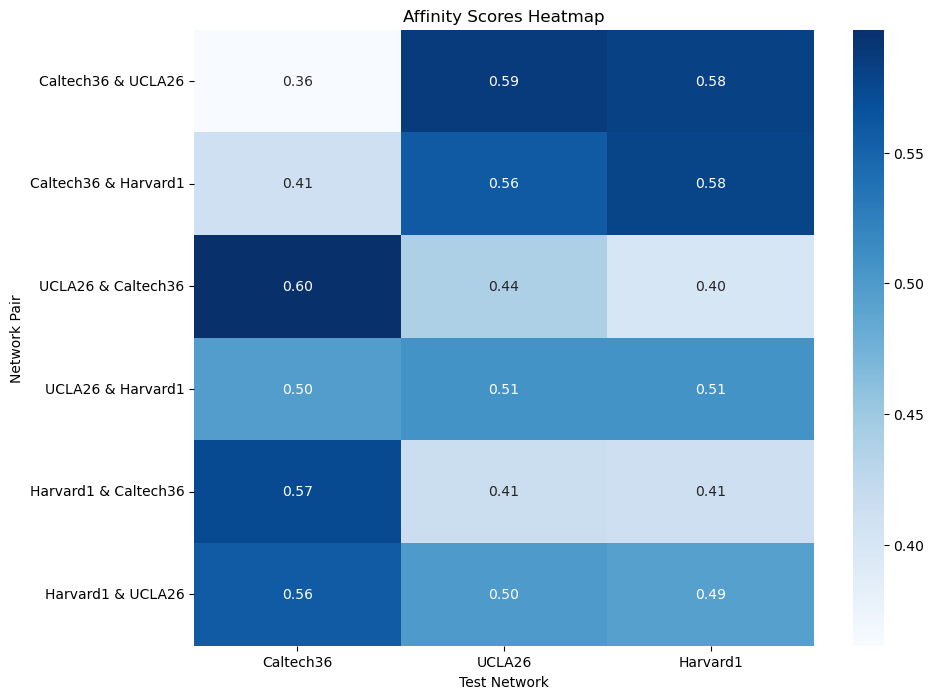

In [4]:
# Example usage 1
ntwk_list = ["Caltech36", "UCLA26", 'Harvard1']
sample_size_list = [125, 125]
k = 7
n_components = 16
iterations = 125

affinity_heatmap(ntwk_list, sample_size_list, k, n_components, iterations)

Iteration: (0, 1, 0)
num of subgraphs induced on k-paths: 500
num of subgraphs induced on k-paths: 500
This is the second sample_size: 500
num of subgraphs induced on k-paths: 500
num of subgraphs induced on k-paths: 500
73280.0
33560.0
initial loading beta [[ 0.87289732 -0.54681875  0.87351084 -0.42473961 -0.35716894  0.7428971
   0.34468755  0.90392723  0.79162206 -0.2257054   0.15412014 -0.16920494
   0.82016068 -0.73178425  0.14832143  0.69550089 -0.88004377]]


  1%|          | 2/250 [00:00<00:14, 17.34it/s]

--- Training --- [threshold, AUC] =  [0.722, 0.997]
--- Iteration 0: Training loss --- [Data, Label, Total] = [79560.925350.3, 69.312911.3, 159191.163612.3]


  4%|▍         | 10/250 [00:00<00:11, 20.14it/s]

--- Training --- [threshold, AUC] =  [0.642, 0.995]
--- Iteration 10: Training loss --- [Data, Label, Total] = [46565.097920.3, 77.294003.3, 93207.489843.3]
!!! pred_type filter


  6%|▌         | 15/250 [00:01<00:29,  7.99it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.642, 0.995, 0.982, 0.982]


  8%|▊         | 20/250 [00:01<00:19, 11.92it/s]

--- Training --- [threshold, AUC] =  [0.735, 0.996]
--- Iteration 20: Training loss --- [Data, Label, Total] = [44703.532733.3, 73.696945.3, 89480.762412.3]
!!! pred_type filter


  9%|▉         | 22/250 [00:02<00:39,  5.82it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.735, 0.996, 0.983, 0.983]


 11%|█         | 28/250 [00:02<00:22,  9.98it/s]

--- Training --- [threshold, AUC] =  [0.738, 0.996]
--- Iteration 30: Training loss --- [Data, Label, Total] = [43408.760840.3, 72.519901.3, 86890.041581.3]
!!! pred_type filter


 13%|█▎        | 33/250 [00:03<00:28,  7.59it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.738, 0.996, 0.984, 0.984]


 16%|█▌        | 39/250 [00:04<00:17, 11.75it/s]

--- Training --- [threshold, AUC] =  [0.747, 0.996]
--- Iteration 40: Training loss --- [Data, Label, Total] = [42685.236046.3, 72.388093.3, 85442.860185.3]
!!! pred_type filter


 17%|█▋        | 43/250 [00:04<00:27,  7.66it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.747, 0.996, 0.984, 0.984]


 20%|█▉        | 49/250 [00:05<00:16, 11.96it/s]

--- Training --- [threshold, AUC] =  [0.693, 0.996]
--- Iteration 50: Training loss --- [Data, Label, Total] = [42229.203515.3, 72.708727.3, 84531.115756.3]
!!! pred_type filter


 21%|██        | 53/250 [00:06<00:25,  7.67it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.693, 0.996, 0.983, 0.983]


 24%|██▎       | 59/250 [00:06<00:15, 12.05it/s]

--- Training --- [threshold, AUC] =  [0.683, 0.996]
--- Iteration 60: Training loss --- [Data, Label, Total] = [41909.054956.3, 73.262216.3, 83891.372128.3]
!!! pred_type filter


 25%|██▌       | 63/250 [00:07<00:24,  7.51it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.683, 0.996, 0.983, 0.983]


 27%|██▋       | 68/250 [00:07<00:16, 11.08it/s]

--- Training --- [threshold, AUC] =  [0.675, 0.996]
--- Iteration 70: Training loss --- [Data, Label, Total] = [41671.160687.3, 73.922727.3, 83416.244101.3]
!!! pred_type filter


 29%|██▉       | 73/250 [00:08<00:22,  7.70it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.675, 0.996, 0.983, 0.983]


 32%|███▏      | 79/250 [00:08<00:14, 11.79it/s]

--- Training --- [threshold, AUC] =  [0.722, 0.996]
--- Iteration 80: Training loss --- [Data, Label, Total] = [41488.942304.3, 74.559700.3, 83052.444308.3]
!!! pred_type filter


 33%|███▎      | 83/250 [00:09<00:22,  7.54it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.722, 0.996, 0.982, 0.982]


 36%|███▌      | 89/250 [00:10<00:13, 11.88it/s]

--- Training --- [threshold, AUC] =  [0.73, 0.996]
--- Iteration 90: Training loss --- [Data, Label, Total] = [41346.124422.3, 75.091980.3, 82767.340825.3]
!!! pred_type filter


 37%|███▋      | 93/250 [00:10<00:20,  7.64it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.73, 0.996, 0.982, 0.982]


 39%|███▉      | 98/250 [00:11<00:14, 10.49it/s]

--- Training --- [threshold, AUC] =  [0.731, 0.996]
--- Iteration 100: Training loss --- [Data, Label, Total] = [41230.917680.3, 75.574845.3, 82537.410204.3]
!!! pred_type filter


 41%|████      | 103/250 [00:12<00:19,  7.56it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.731, 0.996, 0.982, 0.982]


 43%|████▎     | 108/250 [00:12<00:12, 11.26it/s]

--- Training --- [threshold, AUC] =  [0.717, 0.996]
--- Iteration 110: Training loss --- [Data, Label, Total] = [41136.189820.3, 75.966128.3, 82348.345768.3]
!!! pred_type filter


 45%|████▌     | 113/250 [00:13<00:17,  7.81it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.717, 0.996, 0.983, 0.983]


 48%|████▊     | 119/250 [00:13<00:10, 12.06it/s]

--- Training --- [threshold, AUC] =  [0.715, 0.996]
--- Iteration 120: Training loss --- [Data, Label, Total] = [41056.606855.3, 76.284792.3, 82189.498502.3]
!!! pred_type filter


 49%|████▉     | 123/250 [00:14<00:17,  7.46it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.715, 0.996, 0.983, 0.983]


 52%|█████▏    | 130/250 [00:14<00:09, 12.03it/s]

--- Training --- [threshold, AUC] =  [0.714, 0.996]
--- Iteration 130: Training loss --- [Data, Label, Total] = [40989.207036.3, 76.520420.3, 82054.934493.3]
!!! pred_type filter


 53%|█████▎    | 132/250 [00:15<00:21,  5.57it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.714, 0.996, 0.982, 0.982]


 56%|█████▌    | 140/250 [00:16<00:09, 11.14it/s]

--- Training --- [threshold, AUC] =  [0.704, 0.996]
--- Iteration 140: Training loss --- [Data, Label, Total] = [40931.640493.3, 76.694199.3, 81939.975186.3]
!!! pred_type filter


 57%|█████▋    | 142/250 [00:17<00:19,  5.44it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.704, 0.996, 0.982, 0.982]


 60%|██████    | 150/250 [00:17<00:08, 11.42it/s]

--- Training --- [threshold, AUC] =  [0.7, 0.996]
--- Iteration 150: Training loss --- [Data, Label, Total] = [40882.063616.3, 76.798974.3, 81840.926205.3]
!!! pred_type filter


 61%|██████    | 152/250 [00:18<00:16,  5.88it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.7, 0.996, 0.982, 0.982]


 64%|██████▎   | 159/250 [00:18<00:08, 10.70it/s]

--- Training --- [threshold, AUC] =  [0.698, 0.996]
--- Iteration 160: Training loss --- [Data, Label, Total] = [40838.756179.3, 76.858799.3, 81754.371157.3]
!!! pred_type filter


 65%|██████▌   | 163/250 [00:19<00:12,  6.94it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.698, 0.996, 0.982, 0.982]


 68%|██████▊   | 170/250 [00:19<00:06, 12.72it/s]

--- Training --- [threshold, AUC] =  [0.723, 0.996]
--- Iteration 170: Training loss --- [Data, Label, Total] = [40800.363553.3, 76.891852.3, 81677.618958.3]
!!! pred_type filter


 70%|███████   | 175/250 [00:20<00:09,  7.99it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.723, 0.996, 0.981, 0.981]


 72%|███████▏  | 179/250 [00:21<00:06, 10.77it/s]

--- Training --- [threshold, AUC] =  [0.694, 0.996]
--- Iteration 180: Training loss --- [Data, Label, Total] = [40765.750374.3, 76.903260.3, 81608.404007.3]
!!! pred_type filter


 73%|███████▎  | 183/250 [00:22<00:09,  7.10it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.694, 0.996, 0.981, 0.981]


 75%|███████▌  | 188/250 [00:22<00:05, 11.12it/s]

--- Training --- [threshold, AUC] =  [0.693, 0.996]
--- Iteration 190: Training loss --- [Data, Label, Total] = [40734.422663.3, 76.907877.3, 81545.753203.3]
!!! pred_type filter


 77%|███████▋  | 193/250 [00:23<00:07,  7.68it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.693, 0.996, 0.981, 0.981]


 80%|████████  | 200/250 [00:23<00:03, 13.00it/s]

--- Training --- [threshold, AUC] =  [0.686, 0.996]
--- Iteration 200: Training loss --- [Data, Label, Total] = [40706.293261.3, 76.915043.3, 81489.501566.3]
!!! pred_type filter


 82%|████████▏ | 204/250 [00:24<00:06,  7.62it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.686, 0.996, 0.981, 0.981]


 84%|████████▍ | 210/250 [00:24<00:03, 11.72it/s]

--- Training --- [threshold, AUC] =  [0.684, 0.996]
--- Iteration 210: Training loss --- [Data, Label, Total] = [40680.964673.3, 76.902916.3, 81438.832261.3]
!!! pred_type filter


 86%|████████▌ | 214/250 [00:25<00:05,  6.96it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.684, 0.996, 0.981, 0.981]


 88%|████████▊ | 219/250 [00:26<00:02, 10.66it/s]

--- Training --- [threshold, AUC] =  [0.681, 0.996]
--- Iteration 220: Training loss --- [Data, Label, Total] = [40658.139336.3, 76.880359.3, 81393.159031.3]
!!! pred_type filter


 89%|████████▉ | 223/250 [00:26<00:03,  6.96it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.681, 0.996, 0.981, 0.981]


 91%|█████████ | 228/250 [00:27<00:02, 10.60it/s]

--- Training --- [threshold, AUC] =  [0.766, 0.996]
--- Iteration 230: Training loss --- [Data, Label, Total] = [40637.481975.3, 76.853297.3, 81351.817248.3]
!!! pred_type filter


 93%|█████████▎| 233/250 [00:28<00:02,  7.48it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.766, 0.996, 0.981, 0.981]


 96%|█████████▌| 239/250 [00:28<00:00, 11.84it/s]

--- Training --- [threshold, AUC] =  [0.766, 0.996]
--- Iteration 240: Training loss --- [Data, Label, Total] = [40618.739399.3, 76.814127.3, 81314.292924.3]
!!! pred_type filter


 97%|█████████▋| 243/250 [00:29<00:00,  7.60it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.766, 0.996, 0.981, 0.981]


100%|██████████| 250/250 [00:29<00:00,  8.41it/s]


!!! pred_type filter
Iteration: (0, 1, 1)
num of subgraphs induced on k-paths: 500
num of subgraphs induced on k-paths: 500
This is the second sample_size: 500
num of subgraphs induced on k-paths: 500
num of subgraphs induced on k-paths: 500
71610.0
33944.0
initial loading beta [[-0.89284465  0.07363102  0.09636751  0.86631702  0.65354261  0.17337738
   0.49800078  0.35541672  0.99481261 -0.1120592  -0.68871523 -0.71429215
  -0.05938222 -0.67936035  0.18052647  0.71443542 -0.06044953]]


  1%|          | 2/250 [00:00<00:18, 13.25it/s]

--- Training --- [threshold, AUC] =  [0.588, 0.997]
--- Iteration 0: Training loss --- [Data, Label, Total] = [79109.587834.3, 75.147580.3, 158294.323247.3]


  3%|▎         | 8/250 [00:00<00:13, 17.95it/s]

--- Training --- [threshold, AUC] =  [0.569, 0.995]
--- Iteration 10: Training loss --- [Data, Label, Total] = [45790.508468.3, 88.090036.3, 91669.106971.3]
!!! pred_type filter


  5%|▌         | 13/250 [00:01<00:33,  7.15it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.569, 0.995, 0.976, 0.976]


  8%|▊         | 19/250 [00:01<00:19, 11.73it/s]

--- Training --- [threshold, AUC] =  [0.53, 0.996]
--- Iteration 20: Training loss --- [Data, Label, Total] = [43878.242706.3, 83.708709.3, 87840.194121.3]
!!! pred_type filter


  9%|▉         | 23/250 [00:02<00:33,  6.69it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.53, 0.996, 0.98, 0.98]


 11%|█         | 28/250 [00:03<00:21, 10.17it/s]

--- Training --- [threshold, AUC] =  [0.524, 0.996]
--- Iteration 30: Training loss --- [Data, Label, Total] = [42570.023484.3, 83.046466.3, 85223.093434.3]
!!! pred_type filter


 13%|█▎        | 33/250 [00:04<00:31,  6.98it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.524, 0.996, 0.98, 0.98]


 16%|█▌        | 40/250 [00:04<00:17, 11.86it/s]

--- Training --- [threshold, AUC] =  [0.504, 0.996]
--- Iteration 40: Training loss --- [Data, Label, Total] = [41847.060957.3, 83.403637.3, 83777.525551.3]
!!! pred_type filter


 18%|█▊        | 44/250 [00:05<00:28,  7.25it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.504, 0.996, 0.979, 0.979]


 20%|█▉        | 49/250 [00:05<00:18, 10.83it/s]

--- Training --- [threshold, AUC] =  [0.562, 0.996]
--- Iteration 50: Training loss --- [Data, Label, Total] = [41402.565429.3, 83.712893.3, 82888.843752.3]
!!! pred_type filter


 21%|██        | 53/250 [00:06<00:27,  7.14it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.562, 0.996, 0.978, 0.978]


 24%|██▍       | 60/250 [00:07<00:14, 12.74it/s]

--- Training --- [threshold, AUC] =  [0.525, 0.996]
--- Iteration 60: Training loss --- [Data, Label, Total] = [41101.632846.3, 83.975239.3, 82287.240931.3]
!!! pred_type filter


 26%|██▌       | 64/250 [00:07<00:24,  7.56it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.525, 0.996, 0.979, 0.979]


 28%|██▊       | 70/250 [00:08<00:15, 11.72it/s]

--- Training --- [threshold, AUC] =  [0.544, 0.996]
--- Iteration 70: Training loss --- [Data, Label, Total] = [40883.911393.3, 84.241404.3, 81852.064190.3]
!!! pred_type filter


 30%|███       | 75/250 [00:09<00:21,  8.01it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.544, 0.996, 0.979, 0.979]


 32%|███▏      | 79/250 [00:09<00:15, 11.01it/s]

--- Training --- [threshold, AUC] =  [0.546, 0.996]
--- Iteration 80: Training loss --- [Data, Label, Total] = [40716.905925.3, 84.535734.3, 81518.347584.3]
!!! pred_type filter


 33%|███▎      | 83/250 [00:10<00:23,  7.20it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.546, 0.996, 0.978, 0.978]


 36%|███▌      | 89/250 [00:10<00:13, 11.68it/s]

--- Training --- [threshold, AUC] =  [0.588, 0.996]
--- Iteration 90: Training loss --- [Data, Label, Total] = [40580.164045.3, 84.781063.3, 81245.109154.3]
!!! pred_type filter


 37%|███▋      | 93/250 [00:11<00:20,  7.57it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.588, 0.996, 0.977, 0.977]


 40%|████      | 100/250 [00:11<00:11, 13.10it/s]

--- Training --- [threshold, AUC] =  [0.598, 0.996]
--- Iteration 100: Training loss --- [Data, Label, Total] = [40464.064209.3, 85.000080.3, 81013.128499.3]
!!! pred_type filter


 42%|████▏     | 104/250 [00:12<00:19,  7.51it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.598, 0.996, 0.977, 0.977]


 44%|████▍     | 110/250 [00:12<00:11, 11.86it/s]

--- Training --- [threshold, AUC] =  [0.601, 0.996]
--- Iteration 110: Training loss --- [Data, Label, Total] = [40362.659909.3, 85.209771.3, 80810.529589.3]
!!! pred_type filter


 46%|████▌     | 114/250 [00:13<00:17,  7.69it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.601, 0.996, 0.977, 0.977]


 47%|████▋     | 118/250 [00:14<00:12, 10.64it/s]

--- Training --- [threshold, AUC] =  [0.638, 0.996]
--- Iteration 120: Training loss --- [Data, Label, Total] = [40273.261796.3, 85.426999.3, 80631.950592.3]
!!! pred_type filter


 50%|████▉     | 124/250 [00:14<00:15,  8.34it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.638, 0.996, 0.977, 0.977]


 52%|█████▏    | 130/250 [00:15<00:09, 12.63it/s]

--- Training --- [threshold, AUC] =  [0.619, 0.996]
--- Iteration 130: Training loss --- [Data, Label, Total] = [40194.582087.3, 85.591524.3, 80474.755698.3]
!!! pred_type filter


 54%|█████▍    | 135/250 [00:16<00:13,  8.34it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.619, 0.996, 0.978, 0.978]


 56%|█████▌    | 140/250 [00:16<00:09, 12.13it/s]

--- Training --- [threshold, AUC] =  [0.625, 0.996]
--- Iteration 140: Training loss --- [Data, Label, Total] = [40125.322050.3, 85.716881.3, 80336.360981.3]
!!! pred_type filter


 58%|█████▊    | 144/250 [00:17<00:14,  7.44it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.625, 0.996, 0.978, 0.978]


 59%|█████▉    | 148/250 [00:17<00:09, 10.45it/s]

--- Training --- [threshold, AUC] =  [0.629, 0.996]
--- Iteration 150: Training loss --- [Data, Label, Total] = [40063.882178.3, 85.808418.3, 80213.572774.3]
!!! pred_type filter


 61%|██████    | 153/250 [00:18<00:12,  7.68it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.629, 0.996, 0.978, 0.978]


 63%|██████▎   | 158/250 [00:18<00:08, 11.36it/s]

--- Training --- [threshold, AUC] =  [0.622, 0.996]
--- Iteration 160: Training loss --- [Data, Label, Total] = [40009.333084.3, 85.861029.3, 80104.527197.3]
!!! pred_type filter


 66%|██████▌   | 164/250 [00:19<00:09,  8.62it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.622, 0.996, 0.978, 0.978]


 68%|██████▊   | 170/250 [00:19<00:06, 12.72it/s]

--- Training --- [threshold, AUC] =  [0.616, 0.996]
--- Iteration 170: Training loss --- [Data, Label, Total] = [39961.163790.3, 85.909432.3, 80008.237012.3]
!!! pred_type filter


 70%|██████▉   | 174/250 [00:20<00:09,  7.73it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.616, 0.996, 0.978, 0.978]


 72%|███████▏  | 179/250 [00:21<00:06, 11.20it/s]

--- Training --- [threshold, AUC] =  [0.603, 0.996]
--- Iteration 180: Training loss --- [Data, Label, Total] = [39918.764281.3, 85.906874.3, 79923.435436.3]
!!! pred_type filter


 73%|███████▎  | 183/250 [00:21<00:08,  7.46it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.603, 0.996, 0.979, 0.979]


 76%|███████▌  | 189/250 [00:22<00:04, 12.40it/s]

--- Training --- [threshold, AUC] =  [0.602, 0.996]
--- Iteration 190: Training loss --- [Data, Label, Total] = [39881.576847.3, 85.878721.3, 79849.032416.3]
!!! pred_type filter


 77%|███████▋  | 193/250 [00:23<00:07,  7.65it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.602, 0.996, 0.979, 0.979]


 80%|███████▉  | 199/250 [00:23<00:04, 12.46it/s]

--- Training --- [threshold, AUC] =  [0.601, 0.996]
--- Iteration 200: Training loss --- [Data, Label, Total] = [39848.443471.3, 85.836358.3, 79782.723300.3]
!!! pred_type filter


 82%|████████▏ | 204/250 [00:24<00:05,  8.47it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.601, 0.996, 0.979, 0.979]


 84%|████████▍ | 210/250 [00:24<00:03, 12.58it/s]

--- Training --- [threshold, AUC] =  [0.6, 0.996]
--- Iteration 210: Training loss --- [Data, Label, Total] = [39818.494437.3, 85.778245.3, 79722.767119.3]
!!! pred_type filter


 85%|████████▍ | 212/250 [00:25<00:05,  6.63it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.6, 0.996, 0.979, 0.979]


 87%|████████▋ | 218/250 [00:25<00:03, 10.66it/s]

--- Training --- [threshold, AUC] =  [0.522, 0.996]
--- Iteration 220: Training loss --- [Data, Label, Total] = [39791.262205.3, 85.714268.3, 79668.238679.3]
!!! pred_type filter


 89%|████████▉ | 223/250 [00:26<00:03,  7.95it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.522, 0.996, 0.98, 0.98]


 92%|█████████▏| 229/250 [00:26<00:01, 12.01it/s]

--- Training --- [threshold, AUC] =  [0.541, 0.996]
--- Iteration 230: Training loss --- [Data, Label, Total] = [39766.358398.3, 85.641864.3, 79618.358660.3]
!!! pred_type filter


 93%|█████████▎| 233/250 [00:27<00:02,  7.91it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.541, 0.996, 0.98, 0.98]


 95%|█████████▌| 238/250 [00:27<00:01, 11.45it/s]

--- Training --- [threshold, AUC] =  [0.544, 0.996]
--- Iteration 240: Training loss --- [Data, Label, Total] = [39743.488882.3, 85.566463.3, 79572.544227.3]
!!! pred_type filter


 97%|█████████▋| 243/250 [00:28<00:00,  8.06it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.544, 0.996, 0.98, 0.98]


100%|██████████| 250/250 [00:29<00:00,  8.58it/s]


!!! pred_type filter
Iteration: (1, 0, 0)
num of subgraphs induced on k-paths: 500
num of subgraphs induced on k-paths: 500
This is the second sample_size: 500
num of subgraphs induced on k-paths: 500
num of subgraphs induced on k-paths: 500
34142.0
71750.0
initial loading beta [[ 0.66373844 -0.3774882  -0.10537219 -0.21627714 -0.79540069  0.23955014
  -0.59536243 -0.96237309 -0.35851907  0.99955484  0.49006648 -0.14043191
  -0.73155232  0.50471473  0.75141913 -0.55971312 -0.24877086]]


  1%|          | 2/250 [00:00<00:16, 15.20it/s]

--- Training --- [threshold, AUC] =  [0.547, 0.997]
--- Iteration 0: Training loss --- [Data, Label, Total] = [79369.848660.3, 69.215401.3, 158808.912721.3]


  3%|▎         | 8/250 [00:00<00:12, 19.08it/s]

--- Training --- [threshold, AUC] =  [0.513, 0.997]
--- Iteration 10: Training loss --- [Data, Label, Total] = [45885.104709.3, 76.394239.3, 91846.603657.3]
!!! pred_type filter


  5%|▌         | 13/250 [00:01<00:31,  7.54it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.513, 0.997, 0.981, 0.981]


  7%|▋         | 18/250 [00:01<00:21, 10.90it/s]

--- Training --- [threshold, AUC] =  [0.487, 0.997]
--- Iteration 20: Training loss --- [Data, Label, Total] = [43845.269558.3, 71.556599.3, 87762.095715.3]
!!! pred_type filter


  9%|▉         | 23/250 [00:02<00:29,  7.59it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.487, 0.997, 0.982, 0.982]


 11%|█         | 28/250 [00:02<00:19, 11.12it/s]

--- Training --- [threshold, AUC] =  [0.459, 0.998]
--- Iteration 30: Training loss --- [Data, Label, Total] = [42545.506070.3, 71.037637.3, 85162.049778.3]
!!! pred_type filter


 13%|█▎        | 33/250 [00:03<00:29,  7.44it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.459, 0.998, 0.982, 0.982]


 16%|█▌        | 39/250 [00:04<00:18, 11.62it/s]

--- Training --- [threshold, AUC] =  [0.45, 0.998]
--- Iteration 40: Training loss --- [Data, Label, Total] = [41840.162525.3, 71.644921.3, 83751.969972.3]
!!! pred_type filter


 17%|█▋        | 43/250 [00:05<00:28,  7.15it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.45, 0.998, 0.981, 0.981]


 19%|█▉        | 48/250 [00:05<00:18, 11.00it/s]

--- Training --- [threshold, AUC] =  [0.44, 0.998]
--- Iteration 50: Training loss --- [Data, Label, Total] = [41418.411678.3, 72.074599.3, 82908.897955.3]
!!! pred_type filter


 21%|██        | 53/250 [00:06<00:26,  7.36it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.44, 0.998, 0.981, 0.981]


 24%|██▎       | 59/250 [00:06<00:16, 11.48it/s]

--- Training --- [threshold, AUC] =  [0.509, 0.998]
--- Iteration 60: Training loss --- [Data, Label, Total] = [41125.395206.3, 72.290372.3, 82323.080784.3]
!!! pred_type filter


 25%|██▌       | 63/250 [00:07<00:24,  7.54it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.509, 0.998, 0.981, 0.981]


 27%|██▋       | 68/250 [00:07<00:16, 10.88it/s]

--- Training --- [threshold, AUC] =  [0.519, 0.998]
--- Iteration 70: Training loss --- [Data, Label, Total] = [40897.225476.3, 72.413430.3, 81866.864381.3]
!!! pred_type filter


 29%|██▉       | 73/250 [00:08<00:23,  7.64it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.519, 0.998, 0.981, 0.981]


 32%|███▏      | 79/250 [00:09<00:14, 11.69it/s]

--- Training --- [threshold, AUC] =  [0.511, 0.998]
--- Iteration 80: Training loss --- [Data, Label, Total] = [40709.576000.3, 72.523890.3, 81491.675889.3]
!!! pred_type filter


 33%|███▎      | 83/250 [00:09<00:21,  7.61it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.511, 0.998, 0.981, 0.981]


 35%|███▌      | 88/250 [00:10<00:15, 10.77it/s]

--- Training --- [threshold, AUC] =  [0.5, 0.998]
--- Iteration 90: Training loss --- [Data, Label, Total] = [40554.154108.3, 72.690752.3, 81180.998967.3]
!!! pred_type filter


 37%|███▋      | 93/250 [00:11<00:20,  7.56it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.5, 0.998, 0.981, 0.981]


 40%|███▉      | 99/250 [00:11<00:12, 11.82it/s]

--- Training --- [threshold, AUC] =  [0.522, 0.998]
--- Iteration 100: Training loss --- [Data, Label, Total] = [40423.222001.3, 72.892533.3, 80919.336534.3]
!!! pred_type filter


 41%|████      | 103/250 [00:12<00:19,  7.64it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.522, 0.998, 0.98, 0.98]


 43%|████▎     | 108/250 [00:12<00:12, 11.36it/s]

--- Training --- [threshold, AUC] =  [0.516, 0.998]
--- Iteration 110: Training loss --- [Data, Label, Total] = [40312.225624.3, 73.138831.3, 80697.590079.3]
!!! pred_type filter


 45%|████▌     | 113/250 [00:13<00:17,  7.89it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.516, 0.998, 0.98, 0.98]


 48%|████▊     | 119/250 [00:13<00:10, 11.93it/s]

--- Training --- [threshold, AUC] =  [0.475, 0.998]
--- Iteration 120: Training loss --- [Data, Label, Total] = [40218.594517.3, 73.372093.3, 80510.561126.3]
!!! pred_type filter


 49%|████▉     | 123/250 [00:14<00:16,  7.47it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.475, 0.998, 0.98, 0.98]


 51%|█████     | 128/250 [00:14<00:11, 10.80it/s]

--- Training --- [threshold, AUC] =  [0.472, 0.998]
--- Iteration 130: Training loss --- [Data, Label, Total] = [40139.067235.3, 73.563101.3, 80351.697571.3]
!!! pred_type filter


 54%|█████▎    | 134/250 [00:15<00:13,  8.30it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.472, 0.998, 0.98, 0.98]


 55%|█████▌    | 138/250 [00:16<00:10, 10.95it/s]

--- Training --- [threshold, AUC] =  [0.317, 0.998]
--- Iteration 140: Training loss --- [Data, Label, Total] = [40070.403292.3, 73.735504.3, 80214.542088.3]
!!! pred_type filter


 57%|█████▋    | 143/250 [00:17<00:13,  7.73it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.317, 0.998, 0.98, 0.98]


 59%|█████▉    | 148/250 [00:17<00:09, 11.07it/s]

--- Training --- [threshold, AUC] =  [0.32, 0.998]
--- Iteration 150: Training loss --- [Data, Label, Total] = [40010.369776.3, 73.891102.3, 80094.630655.3]
!!! pred_type filter


 61%|██████    | 153/250 [00:18<00:12,  7.79it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.32, 0.998, 0.98, 0.98]


 64%|██████▍   | 160/250 [00:18<00:07, 12.65it/s]

--- Training --- [threshold, AUC] =  [0.322, 0.998]
--- Iteration 160: Training loss --- [Data, Label, Total] = [39957.766225.3, 74.011736.3, 79989.544186.3]
!!! pred_type filter


 66%|██████▌   | 164/250 [00:19<00:11,  7.73it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.322, 0.998, 0.98, 0.98]


 67%|██████▋   | 168/250 [00:19<00:07, 10.55it/s]

--- Training --- [threshold, AUC] =  [0.323, 0.998]
--- Iteration 170: Training loss --- [Data, Label, Total] = [39911.728047.3, 74.145669.3, 79897.601762.3]
!!! pred_type filter


 69%|██████▉   | 173/250 [00:20<00:10,  7.40it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.323, 0.998, 0.98, 0.98]


 72%|███████▏  | 179/250 [00:20<00:06, 11.62it/s]

--- Training --- [threshold, AUC] =  [0.324, 0.998]
--- Iteration 180: Training loss --- [Data, Label, Total] = [39871.243800.3, 74.245653.3, 79816.733253.3]
!!! pred_type filter


 73%|███████▎  | 183/250 [00:21<00:08,  7.65it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.324, 0.998, 0.98, 0.98]


 76%|███████▌  | 189/250 [00:22<00:05, 11.65it/s]

--- Training --- [threshold, AUC] =  [0.325, 0.998]
--- Iteration 190: Training loss --- [Data, Label, Total] = [39835.698898.3, 74.317985.3, 79745.715781.3]
!!! pred_type filter


 77%|███████▋  | 193/250 [00:23<00:07,  7.40it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.325, 0.998, 0.98, 0.98]


 79%|███████▉  | 198/250 [00:23<00:04, 11.13it/s]

--- Training --- [threshold, AUC] =  [0.327, 0.998]
--- Iteration 200: Training loss --- [Data, Label, Total] = [39804.551541.3, 74.345995.3, 79683.449077.3]
!!! pred_type filter


 81%|████████  | 203/250 [00:24<00:05,  7.84it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.327, 0.998, 0.98, 0.98]


 84%|████████▎ | 209/250 [00:24<00:03, 11.86it/s]

--- Training --- [threshold, AUC] =  [0.362, 0.998]
--- Iteration 210: Training loss --- [Data, Label, Total] = [39777.373918.3, 74.327062.3, 79629.074898.3]
!!! pred_type filter


 85%|████████▌ | 213/250 [00:25<00:04,  7.74it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.362, 0.998, 0.98, 0.98]


 88%|████████▊ | 220/250 [00:25<00:02, 12.97it/s]

--- Training --- [threshold, AUC] =  [0.367, 0.998]
--- Iteration 220: Training loss --- [Data, Label, Total] = [39753.281447.3, 74.289097.3, 79580.851991.3]
!!! pred_type filter


 90%|████████▉ | 224/250 [00:26<00:03,  7.70it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.367, 0.998, 0.98, 0.98]


 92%|█████████▏| 229/250 [00:26<00:01, 10.86it/s]

--- Training --- [threshold, AUC] =  [0.373, 0.998]
--- Iteration 230: Training loss --- [Data, Label, Total] = [39731.594649.3, 74.241707.3, 79537.431005.3]
!!! pred_type filter


 93%|█████████▎| 233/250 [00:27<00:02,  7.33it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.373, 0.998, 0.98, 0.98]


 96%|█████████▌| 239/250 [00:28<00:00, 12.02it/s]

--- Training --- [threshold, AUC] =  [0.379, 0.998]
--- Iteration 240: Training loss --- [Data, Label, Total] = [39711.838620.3, 74.177313.3, 79497.854552.3]
!!! pred_type filter


 97%|█████████▋| 243/250 [00:29<00:00,  7.34it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.379, 0.998, 0.98, 0.98]


100%|██████████| 250/250 [00:29<00:00,  8.51it/s]


!!! pred_type filter
Iteration: (1, 0, 1)
num of subgraphs induced on k-paths: 500
num of subgraphs induced on k-paths: 500
This is the second sample_size: 500
num of subgraphs induced on k-paths: 500
num of subgraphs induced on k-paths: 500
34178.0
73244.0
initial loading beta [[ 0.10823806 -0.08929217  0.41796262  0.36005515 -0.75190198  0.57283748
   0.54094307 -0.44269236 -0.319608   -0.80275717 -0.88041389  0.80518193
   0.1136975  -0.33478348  0.71805603  0.33194441 -0.17090164]]


  1%|          | 2/250 [00:00<00:14, 16.77it/s]

--- Training --- [threshold, AUC] =  [0.407, 0.998]
--- Iteration 0: Training loss --- [Data, Label, Total] = [80227.411311.3, 60.930905.3, 160515.753526.3]


  4%|▎         | 9/250 [00:00<00:13, 17.47it/s]

--- Training --- [threshold, AUC] =  [0.322, 0.998]
--- Iteration 10: Training loss --- [Data, Label, Total] = [47163.196129.3, 68.585314.3, 94394.977572.3]
!!! pred_type filter


  5%|▌         | 13/250 [00:01<00:35,  6.70it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.322, 0.998, 0.983, 0.983]


  8%|▊         | 20/250 [00:01<00:18, 12.54it/s]

--- Training --- [threshold, AUC] =  [0.384, 0.998]
--- Iteration 20: Training loss --- [Data, Label, Total] = [45185.803431.3, 65.986445.3, 90437.593307.3]
!!! pred_type filter


 10%|▉         | 24/250 [00:02<00:31,  7.26it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.384, 0.998, 0.984, 0.984]


 12%|█▏        | 29/250 [00:03<00:19, 11.06it/s]

--- Training --- [threshold, AUC] =  [0.363, 0.998]
--- Iteration 30: Training loss --- [Data, Label, Total] = [43842.969526.3, 65.637920.3, 87751.576972.3]
!!! pred_type filter


 13%|█▎        | 33/250 [00:04<00:30,  7.09it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.363, 0.998, 0.985, 0.985]


 16%|█▌        | 40/250 [00:04<00:17, 12.09it/s]

--- Training --- [threshold, AUC] =  [0.289, 0.999]
--- Iteration 40: Training loss --- [Data, Label, Total] = [43052.146117.3, 65.549165.3, 86169.841400.3]
!!! pred_type filter


 18%|█▊        | 44/250 [00:05<00:28,  7.16it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.289, 0.999, 0.985, 0.985]


 20%|█▉        | 49/250 [00:05<00:18, 10.91it/s]

--- Training --- [threshold, AUC] =  [0.387, 0.999]
--- Iteration 50: Training loss --- [Data, Label, Total] = [42592.183286.3, 65.545120.3, 85249.911693.3]
!!! pred_type filter


 21%|██        | 53/250 [00:06<00:28,  7.00it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.387, 0.999, 0.984, 0.984]


 24%|██▍       | 60/250 [00:06<00:15, 12.63it/s]

--- Training --- [threshold, AUC] =  [0.39, 0.999]
--- Iteration 60: Training loss --- [Data, Label, Total] = [42294.835731.3, 65.699123.3, 84655.370586.3]
!!! pred_type filter


 26%|██▌       | 64/250 [00:07<00:25,  7.35it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.39, 0.999, 0.984, 0.984]


 27%|██▋       | 68/250 [00:08<00:17, 10.36it/s]

--- Training --- [threshold, AUC] =  [0.348, 0.999]
--- Iteration 70: Training loss --- [Data, Label, Total] = [42082.898377.3, 65.721749.3, 84231.518503.3]
!!! pred_type filter


 29%|██▉       | 73/250 [00:09<00:25,  6.98it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.348, 0.999, 0.985, 0.985]


 32%|███▏      | 79/250 [00:09<00:15, 11.03it/s]

--- Training --- [threshold, AUC] =  [0.347, 0.999]
--- Iteration 80: Training loss --- [Data, Label, Total] = [41922.499438.3, 65.742420.3, 83910.741296.3]
!!! pred_type filter


 33%|███▎      | 83/250 [00:10<00:23,  7.14it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.347, 0.999, 0.985, 0.985]


 36%|███▌      | 90/250 [00:10<00:12, 12.60it/s]

--- Training --- [threshold, AUC] =  [0.347, 0.999]
--- Iteration 90: Training loss --- [Data, Label, Total] = [41794.465195.3, 65.767772.3, 83654.698162.3]
!!! pred_type filter


 38%|███▊      | 94/250 [00:11<00:21,  7.38it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.347, 0.999, 0.985, 0.985]


 40%|███▉      | 99/250 [00:11<00:14, 10.58it/s]

--- Training --- [threshold, AUC] =  [0.401, 0.999]
--- Iteration 100: Training loss --- [Data, Label, Total] = [41689.012743.3, 65.785911.3, 83443.811398.3]
!!! pred_type filter


 41%|████      | 103/250 [00:12<00:20,  7.02it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.401, 0.999, 0.985, 0.985]


 44%|████▍     | 110/250 [00:13<00:11, 12.03it/s]

--- Training --- [threshold, AUC] =  [0.402, 0.999]
--- Iteration 110: Training loss --- [Data, Label, Total] = [41599.479920.3, 65.756779.3, 83264.716619.3]
!!! pred_type filter


 46%|████▌     | 114/250 [00:14<00:19,  7.08it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.402, 0.999, 0.985, 0.985]


 47%|████▋     | 118/250 [00:14<00:12, 10.20it/s]

--- Training --- [threshold, AUC] =  [0.405, 0.999]
--- Iteration 120: Training loss --- [Data, Label, Total] = [41523.054899.3, 65.685302.3, 83111.795100.3]
!!! pred_type filter


 49%|████▉     | 123/250 [00:15<00:17,  7.17it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.405, 0.999, 0.985, 0.985]


 52%|█████▏    | 130/250 [00:15<00:09, 12.10it/s]

--- Training --- [threshold, AUC] =  [0.408, 0.999]
--- Iteration 130: Training loss --- [Data, Label, Total] = [41456.624454.3, 65.624030.3, 82978.872937.3]
!!! pred_type filter


 53%|█████▎    | 132/250 [00:16<00:19,  5.94it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.408, 0.999, 0.985, 0.985]


 56%|█████▌    | 139/250 [00:16<00:10, 10.92it/s]

--- Training --- [threshold, AUC] =  [0.41, 0.999]
--- Iteration 140: Training loss --- [Data, Label, Total] = [41398.386778.3, 65.583275.3, 82862.356831.3]
!!! pred_type filter


 57%|█████▋    | 143/250 [00:17<00:15,  7.07it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.41, 0.999, 0.985, 0.985]


 60%|██████    | 150/250 [00:18<00:07, 12.51it/s]

--- Training --- [threshold, AUC] =  [0.408, 0.999]
--- Iteration 150: Training loss --- [Data, Label, Total] = [41346.646547.3, 65.545818.3, 82758.838912.3]
!!! pred_type filter


 62%|██████▏   | 154/250 [00:19<00:13,  7.27it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.408, 0.999, 0.985, 0.985]


 63%|██████▎   | 158/250 [00:19<00:08, 10.53it/s]

--- Training --- [threshold, AUC] =  [0.406, 0.999]
--- Iteration 160: Training loss --- [Data, Label, Total] = [41300.182829.3, 65.506625.3, 82665.872283.3]
!!! pred_type filter


 65%|██████▌   | 163/250 [00:20<00:12,  7.10it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.406, 0.999, 0.985, 0.985]


 68%|██████▊   | 169/250 [00:20<00:06, 11.75it/s]

--- Training --- [threshold, AUC] =  [0.404, 0.999]
--- Iteration 170: Training loss --- [Data, Label, Total] = [41258.181411.3, 65.456284.3, 82581.819106.3]
!!! pred_type filter


 69%|██████▉   | 173/250 [00:21<00:10,  7.06it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.404, 0.999, 0.985, 0.985]


 72%|███████▏  | 180/250 [00:21<00:05, 12.98it/s]

--- Training --- [threshold, AUC] =  [0.401, 0.999]
--- Iteration 180: Training loss --- [Data, Label, Total] = [41219.638872.3, 65.404134.3, 82504.681878.3]
!!! pred_type filter


 74%|███████▎  | 184/250 [00:22<00:08,  7.41it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.401, 0.999, 0.985, 0.985]


 75%|███████▌  | 188/250 [00:23<00:06, 10.26it/s]

--- Training --- [threshold, AUC] =  [0.398, 0.999]
--- Iteration 190: Training loss --- [Data, Label, Total] = [41184.219052.3, 65.373150.3, 82433.811255.3]
!!! pred_type filter


 77%|███████▋  | 193/250 [00:24<00:08,  7.03it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.398, 0.999, 0.985, 0.985]


 80%|████████  | 200/250 [00:24<00:04, 12.17it/s]

--- Training --- [threshold, AUC] =  [0.395, 0.999]
--- Iteration 200: Training loss --- [Data, Label, Total] = [41151.528401.3, 65.355563.3, 82368.412365.3]
!!! pred_type filter


 82%|████████▏ | 204/250 [00:25<00:06,  7.42it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.395, 0.999, 0.985, 0.985]


 84%|████████▎ | 209/250 [00:25<00:03, 11.11it/s]

--- Training --- [threshold, AUC] =  [0.393, 0.999]
--- Iteration 210: Training loss --- [Data, Label, Total] = [41121.394952.3, 65.340827.3, 82308.130731.3]
!!! pred_type filter


 85%|████████▌ | 213/250 [00:26<00:05,  7.21it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.393, 0.999, 0.985, 0.985]


 87%|████████▋ | 218/250 [00:26<00:02, 10.71it/s]

--- Training --- [threshold, AUC] =  [0.442, 0.999]
--- Iteration 220: Training loss --- [Data, Label, Total] = [41093.568166.3, 65.331033.3, 82252.467364.3]
!!! pred_type filter


 89%|████████▉ | 223/250 [00:27<00:03,  7.49it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.442, 0.999, 0.985, 0.985]


 91%|█████████ | 228/250 [00:28<00:02, 10.27it/s]

--- Training --- [threshold, AUC] =  [0.445, 0.999]
--- Iteration 230: Training loss --- [Data, Label, Total] = [41067.892964.3, 65.321579.3, 82201.107507.3]
!!! pred_type filter


 93%|█████████▎| 233/250 [00:28<00:02,  7.40it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.445, 0.999, 0.985, 0.985]


 96%|█████████▌| 240/250 [00:29<00:00, 12.06it/s]

--- Training --- [threshold, AUC] =  [0.447, 0.999]
--- Iteration 240: Training loss --- [Data, Label, Total] = [41044.097548.3, 65.309044.3, 82153.504140.3]
!!! pred_type filter


 98%|█████████▊| 244/250 [00:30<00:00,  7.15it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.447, 0.999, 0.985, 0.985]


100%|██████████| 250/250 [00:30<00:00,  8.17it/s]


!!! pred_type filter


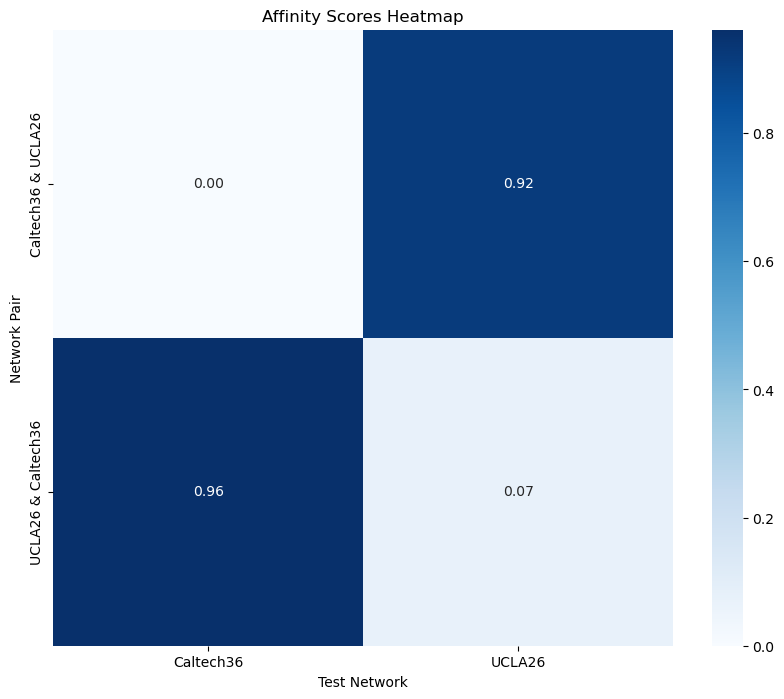

In [5]:
# Example usage 2
ntwk_list = ["Caltech36", "UCLA26"]
sample_size_list = [500, 500]
k = 25
n_components = 16
iterations = 250

affinity_heatmap(ntwk_list, sample_size_list, k, n_components, iterations)

In [6]:
# Example usage 3
ntwk_list = ["Caltech36", "UCLA26", 'Harvard1', 'MIT8']
sample_size_list = [100, 100]
k = 4
n_components = 16
iterations = 100

affinity_heatmap(ntwk_list, sample_size_list, k, n_components, iterations)

Iteration: (0, 1, 0)
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
This is the second sample_size: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
766.0
682.0
initial loading beta [[ 0.51819691 -0.15997099  0.75109969 -0.61586205  0.37663441 -0.74878548
   0.16668729 -0.11863467  0.37991875  0.46358806  0.97330651  0.74079003
   0.18250771  0.17616859 -0.44733253 -0.2623012   0.84340252]]


  0%|          | 0/100 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.485, 0.638]
--- Iteration 0: Training loss --- [Data, Label, Total] = [428.339365.3, 132.119888.3, 988.798617.3]
--- Training --- [threshold, AUC] =  [0.513, 0.637]
--- Iteration 10: Training loss --- [Data, Label, Total] = [15.188237.3, 131.644821.3, 162.021294.3]
!!! pred_type filter


 11%|█         | 11/100 [00:00<00:04, 21.91it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.513, 0.637, 0.625, 0.654]
--- Training --- [threshold, AUC] =  [0.517, 0.637]
--- Iteration 20: Training loss --- [Data, Label, Total] = [3.027965.3, 131.643833.3, 137.699764.3]
!!! pred_type filter


 21%|██        | 21/100 [00:00<00:03, 24.24it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.517, 0.637, 0.625, 0.654]
--- Training --- [threshold, AUC] =  [0.521, 0.637]
--- Iteration 30: Training loss --- [Data, Label, Total] = [1.258176.3, 131.648524.3, 134.164875.3]
!!! pred_type filter


 31%|███       | 31/100 [00:01<00:02, 25.56it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.521, 0.637, 0.625, 0.654]
--- Training --- [threshold, AUC] =  [0.524, 0.637]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.706786.3, 131.647172.3, 133.060744.3]
!!! pred_type filter


 41%|████      | 41/100 [00:01<00:02, 27.62it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.524, 0.637, 0.625, 0.654]
--- Training --- [threshold, AUC] =  [0.526, 0.637]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.446212.3, 131.643912.3, 132.536337.3]
!!! pred_type filter


 51%|█████     | 51/100 [00:01<00:01, 27.74it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.526, 0.637, 0.625, 0.654]
--- Training --- [threshold, AUC] =  [0.527, 0.637]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.298775.3, 131.640062.3, 132.237611.3]
!!! pred_type filter


 61%|██████    | 61/100 [00:02<00:01, 28.07it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.527, 0.637, 0.625, 0.654]
--- Training --- [threshold, AUC] =  [0.529, 0.637]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.209987.3, 131.635377.3, 132.055351.3]
!!! pred_type filter


 71%|███████   | 71/100 [00:02<00:01, 28.15it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.529, 0.637, 0.625, 0.654]
--- Training --- [threshold, AUC] =  [0.53, 0.637]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.153981.3, 131.630638.3, 131.938600.3]
!!! pred_type filter


 81%|████████  | 81/100 [00:02<00:00, 28.67it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.53, 0.637, 0.625, 0.654]
--- Training --- [threshold, AUC] =  [0.531, 0.637]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.117115.3, 131.625872.3, 131.860103.3]
!!! pred_type filter


100%|██████████| 100/100 [00:03<00:00, 29.86it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.531, 0.637, 0.625, 0.654]
!!! pred_type filter


Iteration: (0, 1, 1)
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
This is the second sample_size: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
780.0
644.0
initial loading beta [[ 7.00317988e-01  1.81046181e-02 -7.69335338e-01 -1.16054783e-01
  -1.08300702e-01 -2.26781509e-01  8.07144193e-01 -1.68001747e-01
  -3.55606497e-01 -2.29015882e-01 -4.79421615e-01 -9.35985111e-02
   3.78528336e-01  6.00690809e-01 -2.42136293e-01  3.49998531e-04
  -7.27363252e-01]]


  0%|          | 0/100 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.609, 0.717]
--- Iteration 0: Training loss --- [Data, Label, Total] = [416.860741.3, 120.757589.3, 954.479072.3]
--- Training --- [threshold, AUC] =  [0.623, 0.717]
--- Iteration 10: Training loss --- [Data, Label, Total] = [35.420565.3, 119.698193.3, 190.539322.3]
!!! pred_type filter


 11%|█         | 11/100 [00:00<00:04, 22.16it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.623, 0.717, 0.705, 0.733]
--- Training --- [threshold, AUC] =  [0.623, 0.717]
--- Iteration 20: Training loss --- [Data, Label, Total] = [8.054627.3, 119.650556.3, 135.759809.3]
!!! pred_type filter


 21%|██        | 21/100 [00:00<00:03, 25.96it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.623, 0.717, 0.705, 0.733]
--- Training --- [threshold, AUC] =  [0.623, 0.717]
--- Iteration 30: Training loss --- [Data, Label, Total] = [2.332718.3, 119.601803.3, 124.267238.3]
!!! pred_type filter


 31%|███       | 31/100 [00:01<00:02, 28.37it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.623, 0.717, 0.705, 0.733]
--- Training --- [threshold, AUC] =  [0.624, 0.717]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.900303.3, 119.524790.3, 121.325397.3]
!!! pred_type filter


 41%|████      | 41/100 [00:01<00:02, 29.17it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.624, 0.717, 0.705, 0.733]
--- Training --- [threshold, AUC] =  [0.625, 0.718]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.435717.3, 119.434754.3, 120.306189.3]
!!! pred_type filter


 51%|█████     | 51/100 [00:01<00:01, 30.58it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.625, 0.718, 0.705, 0.733]
--- Training --- [threshold, AUC] =  [0.626, 0.718]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.269607.3, 119.349861.3, 119.889075.3]
!!! pred_type filter


 61%|██████    | 61/100 [00:02<00:01, 32.25it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.626, 0.718, 0.705, 0.733]
--- Training --- [threshold, AUC] =  [0.627, 0.718]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.214869.3, 119.276250.3, 119.705988.3]
!!! pred_type filter


 71%|███████   | 71/100 [00:02<00:00, 31.61it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.627, 0.718, 0.705, 0.733]
--- Training --- [threshold, AUC] =  [0.628, 0.718]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.185244.3, 119.210836.3, 119.581324.3]
!!! pred_type filter


 81%|████████  | 81/100 [00:02<00:00, 32.26it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.628, 0.718, 0.705, 0.733]
--- Training --- [threshold, AUC] =  [0.629, 0.718]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.166161.3, 119.151754.3, 119.484077.3]
!!! pred_type filter


100%|██████████| 100/100 [00:03<00:00, 32.52it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.629, 0.718, 0.705, 0.733]
!!! pred_type filter


Iteration: (0, 1, 2)
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
This is the second sample_size: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
750.0
646.0
initial loading beta [[-0.32361929  0.96246064 -0.943586   -0.02380539  0.32816531 -0.98664596
   0.41205066 -0.09505173  0.44357525 -0.68776976  0.05628684  0.1232919
  -0.07295355  0.1394636  -0.94618418 -0.38958185 -0.11860602]]


  0%|          | 0/100 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.571, 0.667]
--- Iteration 0: Training loss --- [Data, Label, Total] = [438.693634.3, 127.930352.3, 1005.317620.3]
--- Training --- [threshold, AUC] =  [0.582, 0.672]
--- Iteration 10: Training loss --- [Data, Label, Total] = [21.314321.3, 126.940823.3, 169.569466.3]
!!! pred_type filter


 11%|█         | 11/100 [00:00<00:02, 31.70it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.582, 0.672, 0.655, 0.701]
--- Training --- [threshold, AUC] =  [0.584, 0.672]
--- Iteration 20: Training loss --- [Data, Label, Total] = [4.667540.3, 126.768692.3, 136.103772.3]
!!! pred_type filter


 21%|██        | 21/100 [00:00<00:02, 32.74it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.584, 0.672, 0.655, 0.701]
--- Training --- [threshold, AUC] =  [0.583, 0.672]
--- Iteration 30: Training loss --- [Data, Label, Total] = [1.678032.3, 126.736484.3, 130.092548.3]
!!! pred_type filter


 31%|███       | 31/100 [00:00<00:01, 35.08it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.583, 0.672, 0.655, 0.701]
--- Training --- [threshold, AUC] =  [0.583, 0.672]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.753968.3, 126.686521.3, 128.194457.3]
!!! pred_type filter


 41%|████      | 41/100 [00:01<00:01, 34.96it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.583, 0.672, 0.655, 0.701]
--- Training --- [threshold, AUC] =  [0.584, 0.672]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.389179.3, 126.623813.3, 127.402172.3]
!!! pred_type filter


 51%|█████     | 51/100 [00:01<00:01, 35.71it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.584, 0.672, 0.655, 0.701]
--- Training --- [threshold, AUC] =  [0.584, 0.672]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.223174.3, 126.555761.3, 127.002109.3]
!!! pred_type filter


 61%|██████    | 61/100 [00:01<00:01, 36.21it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.584, 0.672, 0.655, 0.701]
--- Training --- [threshold, AUC] =  [0.585, 0.672]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.140018.3, 126.488325.3, 126.768362.3]
!!! pred_type filter


 71%|███████   | 71/100 [00:02<00:00, 35.95it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.585, 0.672, 0.655, 0.701]
--- Training --- [threshold, AUC] =  [0.585, 0.672]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.096714.3, 126.424006.3, 126.617434.3]
!!! pred_type filter


 81%|████████  | 81/100 [00:02<00:00, 36.35it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.585, 0.672, 0.655, 0.701]
--- Training --- [threshold, AUC] =  [0.586, 0.672]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.076080.3, 126.363162.3, 126.515322.3]
!!! pred_type filter


100%|██████████| 100/100 [00:02<00:00, 38.29it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.586, 0.672, 0.655, 0.701]
!!! pred_type filter


Iteration: (0, 1, 3)
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
This is the second sample_size: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
764.0
638.0
initial loading beta [[ 0.86594814 -0.42615905 -0.62145034  0.19205044  0.73356959  0.24204626
  -0.24068459  0.70419833  0.49986532  0.96900486 -0.18667017 -0.40173768
  -0.5462582   0.94293167  0.32025453 -0.69665919 -0.65873465]]


  0%|          | 0/100 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.441, 0.746]
--- Iteration 0: Training loss --- [Data, Label, Total] = [381.325245.3, 116.358552.3, 879.009042.3]
--- Training --- [threshold, AUC] =  [0.487, 0.746]
--- Iteration 10: Training loss --- [Data, Label, Total] = [19.037087.3, 112.736477.3, 150.810651.3]
!!! pred_type filter


 11%|█         | 11/100 [00:00<00:02, 34.65it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.487, 0.746, 0.715, 0.778]
--- Training --- [threshold, AUC] =  [0.501, 0.746]
--- Iteration 20: Training loss --- [Data, Label, Total] = [3.038593.3, 111.325128.3, 117.402314.3]
!!! pred_type filter


 21%|██        | 21/100 [00:00<00:02, 29.47it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.501, 0.746, 0.715, 0.778]
--- Training --- [threshold, AUC] =  [0.507, 0.746]
--- Iteration 30: Training loss --- [Data, Label, Total] = [1.560143.3, 110.615598.3, 113.735885.3]
!!! pred_type filter


 31%|███       | 31/100 [00:01<00:02, 29.82it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.507, 0.746, 0.715, 0.778]
--- Training --- [threshold, AUC] =  [0.511, 0.746]
--- Iteration 40: Training loss --- [Data, Label, Total] = [1.083914.3, 109.997230.3, 112.165059.3]
!!! pred_type filter


 41%|████      | 41/100 [00:01<00:01, 33.06it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.511, 0.746, 0.715, 0.778]
--- Training --- [threshold, AUC] =  [0.515, 0.746]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.824925.3, 109.464153.3, 111.114002.3]
!!! pred_type filter


 51%|█████     | 51/100 [00:01<00:01, 33.17it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.515, 0.746, 0.715, 0.778]
--- Training --- [threshold, AUC] =  [0.517, 0.746]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.630255.3, 109.016048.3, 110.276559.3]
!!! pred_type filter


 61%|██████    | 61/100 [00:01<00:01, 36.40it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.517, 0.746, 0.715, 0.778]
--- Training --- [threshold, AUC] =  [0.519, 0.746]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.467377.3, 108.632231.3, 109.566986.3]
!!! pred_type filter


 71%|███████   | 71/100 [00:02<00:00, 37.50it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.519, 0.746, 0.715, 0.778]
--- Training --- [threshold, AUC] =  [0.521, 0.746]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.337215.3, 108.302648.3, 108.977079.3]
!!! pred_type filter


 81%|████████  | 81/100 [00:02<00:00, 37.34it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.521, 0.746, 0.715, 0.778]
--- Training --- [threshold, AUC] =  [0.522, 0.746]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.244302.3, 108.021346.3, 108.509950.3]
!!! pred_type filter


100%|██████████| 100/100 [00:02<00:00, 37.62it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.522, 0.746, 0.715, 0.778]
!!! pred_type filter


Iteration: (0, 2, 0)
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
This is the second sample_size: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
758.0
642.0
initial loading beta [[ 0.83643891  0.30157142 -0.05427773 -0.81760313 -0.63236439 -0.82476429
  -0.85240915  0.98248139  0.86386196 -0.68563623  0.98677269  0.50242792
  -0.55486434 -0.68183295  0.78996499 -0.9346428   0.02337041]]


  0%|          | 0/100 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.595, 0.717]
--- Iteration 0: Training loss --- [Data, Label, Total] = [428.817222.3, 122.701824.3, 980.336268.3]
--- Training --- [threshold, AUC] =  [0.605, 0.717]
--- Iteration 10: Training loss --- [Data, Label, Total] = [35.802331.3, 120.846782.3, 192.451444.3]
!!! pred_type filter


 11%|█         | 11/100 [00:00<00:02, 32.76it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.605, 0.717, 0.695, 0.729]
--- Training --- [threshold, AUC] =  [0.606, 0.717]
--- Iteration 20: Training loss --- [Data, Label, Total] = [15.687486.3, 120.502787.3, 151.877759.3]
!!! pred_type filter


 21%|██        | 21/100 [00:00<00:03, 25.37it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.606, 0.717, 0.695, 0.729]
--- Training --- [threshold, AUC] =  [0.605, 0.717]
--- Iteration 30: Training loss --- [Data, Label, Total] = [5.603940.3, 120.502691.3, 131.710571.3]
!!! pred_type filter


 31%|███       | 31/100 [00:01<00:02, 26.25it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.605, 0.717, 0.695, 0.729]
--- Training --- [threshold, AUC] =  [0.604, 0.717]
--- Iteration 40: Training loss --- [Data, Label, Total] = [2.151644.3, 120.592120.3, 124.895409.3]
!!! pred_type filter


 41%|████      | 41/100 [00:01<00:02, 25.02it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.604, 0.717, 0.695, 0.729]
--- Training --- [threshold, AUC] =  [0.605, 0.717]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.902137.3, 120.565798.3, 122.370073.3]
!!! pred_type filter


 51%|█████     | 51/100 [00:02<00:02, 24.23it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.605, 0.717, 0.695, 0.729]
--- Training --- [threshold, AUC] =  [0.605, 0.717]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.467704.3, 120.461104.3, 121.396513.3]
!!! pred_type filter


 61%|██████    | 61/100 [00:02<00:01, 24.86it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.605, 0.717, 0.695, 0.729]
--- Training --- [threshold, AUC] =  [0.607, 0.717]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.309458.3, 120.333556.3, 120.952472.3]
!!! pred_type filter


 71%|███████   | 71/100 [00:02<00:01, 26.29it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.607, 0.717, 0.695, 0.729]
--- Training --- [threshold, AUC] =  [0.608, 0.717]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.243619.3, 120.209137.3, 120.696375.3]
!!! pred_type filter


 81%|████████  | 81/100 [00:03<00:00, 28.52it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.608, 0.717, 0.695, 0.729]
--- Training --- [threshold, AUC] =  [0.609, 0.717]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.209370.3, 120.097644.3, 120.516385.3]
!!! pred_type filter


100%|██████████| 100/100 [00:03<00:00, 28.28it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.609, 0.717, 0.695, 0.729]
!!! pred_type filter


Iteration: (0, 2, 1)
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
This is the second sample_size: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
786.0
694.0
initial loading beta [[-0.07089209  0.53513339 -0.06809636 -0.7874045   0.69254866 -0.13802438
   0.18539852  0.29367804 -0.61068486 -0.64245036  0.90564427  0.04176967
   0.99823468  0.29780535 -0.53138366  0.66311517 -0.60050098]]


  0%|          | 0/100 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.495, 0.657]
--- Iteration 0: Training loss --- [Data, Label, Total] = [443.262178.3, 130.440034.3, 1016.964390.3]
--- Training --- [threshold, AUC] =  [0.506, 0.657]
--- Iteration 10: Training loss --- [Data, Label, Total] = [13.164447.3, 130.299950.3, 156.628843.3]
!!! pred_type filter


 11%|█         | 11/100 [00:00<00:01, 49.42it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.506, 0.657, 0.645, 0.65]
--- Training --- [threshold, AUC] =  [0.51, 0.657]
--- Iteration 20: Training loss --- [Data, Label, Total] = [1.434078.3, 130.284339.3, 133.152494.3]
!!! pred_type filter


 21%|██        | 21/100 [00:00<00:01, 41.67it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.51, 0.657, 0.645, 0.65]
--- Training --- [threshold, AUC] =  [0.512, 0.657]
--- Iteration 30: Training loss --- [Data, Label, Total] = [0.456552.3, 130.284000.3, 131.197103.3]
!!! pred_type filter


 41%|████      | 41/100 [00:00<00:01, 44.85it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.512, 0.657, 0.645, 0.65]
--- Training --- [threshold, AUC] =  [0.513, 0.657]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.214880.3, 130.274413.3, 130.704172.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.513, 0.657, 0.645, 0.65]


 51%|█████     | 51/100 [00:01<00:01, 45.70it/s]

--- Training --- [threshold, AUC] =  [0.513, 0.657]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.127379.3, 130.262925.3, 130.517683.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.513, 0.657, 0.645, 0.65]


 61%|██████    | 61/100 [00:01<00:00, 44.51it/s]

--- Training --- [threshold, AUC] =  [0.513, 0.657]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.089001.3, 130.252315.3, 130.430318.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.513, 0.657, 0.645, 0.65]


 71%|███████   | 71/100 [00:01<00:00, 46.95it/s]

--- Training --- [threshold, AUC] =  [0.514, 0.657]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.067964.3, 130.243336.3, 130.379264.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.514, 0.657, 0.645, 0.65]
--- Training --- [threshold, AUC] =  [0.514, 0.657]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.055652.3, 130.234555.3, 130.345860.3]
!!! pred_type filter


 81%|████████  | 81/100 [00:01<00:00, 48.01it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.514, 0.657, 0.645, 0.65]
--- Training --- [threshold, AUC] =  [0.514, 0.657]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.046766.3, 130.226129.3, 130.319661.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.514, 0.657, 0.645, 0.65]


100%|██████████| 100/100 [00:02<00:00, 49.89it/s]


!!! pred_type filter
Iteration: (0, 2, 2)
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
This is the second sample_size: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
750.0
654.0
initial loading beta [[-0.61786532 -0.18588398 -0.51547587  0.53624974 -0.06259291 -0.97233936
   0.39501906 -0.42945963 -0.38521963 -0.30792559 -0.772707   -0.80130618
   0.934315    0.81408617  0.9294297   0.43967593  0.47809775]]


  0%|          | 0/100 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.567, 0.646]
--- Iteration 0: Training loss --- [Data, Label, Total] = [412.141763.3, 129.819469.3, 954.102995.3]
--- Training --- [threshold, AUC] =  [0.577, 0.646]
--- Iteration 10: Training loss --- [Data, Label, Total] = [24.769887.3, 129.165071.3, 178.704846.3]
!!! pred_type filter


 11%|█         | 11/100 [00:00<00:02, 30.96it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.577, 0.646, 0.63, 0.673]
--- Training --- [threshold, AUC] =  [0.579, 0.65]
--- Iteration 20: Training loss --- [Data, Label, Total] = [5.658803.3, 128.685236.3, 140.002841.3]
!!! pred_type filter


 21%|██        | 21/100 [00:00<00:02, 32.65it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.579, 0.65, 0.63, 0.673]
--- Training --- [threshold, AUC] =  [0.58, 0.65]
--- Iteration 30: Training loss --- [Data, Label, Total] = [2.035054.3, 128.589571.3, 132.659679.3]
!!! pred_type filter


 31%|███       | 31/100 [00:00<00:02, 33.74it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.58, 0.65, 0.63, 0.673]
--- Training --- [threshold, AUC] =  [0.58, 0.65]
--- Iteration 40: Training loss --- [Data, Label, Total] = [1.044006.3, 128.529306.3, 130.617318.3]
!!! pred_type filter


 41%|████      | 41/100 [00:01<00:01, 34.03it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.58, 0.65, 0.63, 0.673]
--- Training --- [threshold, AUC] =  [0.58, 0.65]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.636309.3, 128.478018.3, 129.750636.3]
!!! pred_type filter


 58%|█████▊    | 58/100 [00:01<00:01, 39.61it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.58, 0.65, 0.63, 0.673]
--- Training --- [threshold, AUC] =  [0.58, 0.65]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.414711.3, 128.431184.3, 129.260606.3]
!!! pred_type filter


 63%|██████▎   | 63/100 [00:01<00:01, 31.65it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.58, 0.65, 0.63, 0.673]
--- Training --- [threshold, AUC] =  [0.581, 0.65]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.283836.3, 128.387977.3, 128.955649.3]
!!! pred_type filter


 71%|███████   | 71/100 [00:02<00:00, 32.50it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.581, 0.65, 0.63, 0.673]
--- Training --- [threshold, AUC] =  [0.581, 0.65]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.204430.3, 128.347673.3, 128.756533.3]
!!! pred_type filter


 81%|████████  | 81/100 [00:02<00:00, 33.10it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.581, 0.65, 0.63, 0.673]
--- Training --- [threshold, AUC] =  [0.582, 0.65]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.156042.3, 128.308804.3, 128.620889.3]
!!! pred_type filter


100%|██████████| 100/100 [00:02<00:00, 35.95it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.582, 0.65, 0.63, 0.673]
!!! pred_type filter


Iteration: (0, 2, 3)
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
This is the second sample_size: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
748.0
662.0
initial loading beta [[ 0.07750204 -0.83939915  0.68050362  0.59908208  0.90294976 -0.86410628
  -0.05773163 -0.18501286 -0.96236714  0.32808124  0.56957413  0.29481705
  -0.74940556 -0.51833313  0.0531424  -0.73605019 -0.58556585]]


  0%|          | 0/100 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.496, 0.648]
--- Iteration 0: Training loss --- [Data, Label, Total] = [362.250236.3, 129.871931.3, 854.372403.3]
--- Training --- [threshold, AUC] =  [0.535, 0.649]
--- Iteration 10: Training loss --- [Data, Label, Total] = [21.234945.3, 129.125206.3, 171.595095.3]
!!! pred_type filter


 11%|█         | 11/100 [00:00<00:03, 27.39it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.535, 0.649, 0.64, 0.697]
--- Training --- [threshold, AUC] =  [0.543, 0.649]
--- Iteration 20: Training loss --- [Data, Label, Total] = [3.605883.3, 129.030305.3, 136.242071.3]
!!! pred_type filter


 21%|██        | 21/100 [00:00<00:02, 26.99it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.543, 0.649, 0.64, 0.697]
--- Training --- [threshold, AUC] =  [0.546, 0.649]
--- Iteration 30: Training loss --- [Data, Label, Total] = [1.035810.3, 129.027042.3, 131.098662.3]
!!! pred_type filter


 31%|███       | 31/100 [00:01<00:02, 28.74it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.546, 0.649, 0.64, 0.697]
--- Training --- [threshold, AUC] =  [0.548, 0.649]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.511528.3, 129.026822.3, 130.049878.3]
!!! pred_type filter


 41%|████      | 41/100 [00:01<00:01, 31.12it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.548, 0.649, 0.64, 0.697]
--- Training --- [threshold, AUC] =  [0.549, 0.649]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.316202.3, 129.020057.3, 129.652462.3]
!!! pred_type filter


 51%|█████     | 51/100 [00:01<00:01, 32.83it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.549, 0.649, 0.64, 0.697]
--- Training --- [threshold, AUC] =  [0.55, 0.649]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.221897.3, 129.009369.3, 129.453163.3]
!!! pred_type filter


 61%|██████    | 61/100 [00:01<00:01, 33.29it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.55, 0.649, 0.64, 0.697]
--- Training --- [threshold, AUC] =  [0.551, 0.649]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.168090.3, 128.996752.3, 129.332932.3]
!!! pred_type filter


 71%|███████   | 71/100 [00:02<00:00, 34.81it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.551, 0.649, 0.64, 0.697]
--- Training --- [threshold, AUC] =  [0.552, 0.649]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.134100.3, 128.983377.3, 129.251578.3]
!!! pred_type filter


 81%|████████  | 81/100 [00:02<00:00, 35.30it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.552, 0.649, 0.64, 0.697]
--- Training --- [threshold, AUC] =  [0.552, 0.649]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.111218.3, 128.969933.3, 129.192369.3]
!!! pred_type filter


100%|██████████| 100/100 [00:02<00:00, 35.54it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.552, 0.649, 0.64, 0.697]
!!! pred_type filter


Iteration: (0, 3, 0)
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
This is the second sample_size: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
768.0
694.0
initial loading beta [[ 0.53539446  0.12009177 -0.8799637   0.55636156  0.69528321  0.30824812
  -0.24129076 -0.30433742  0.35647435  0.30629325 -0.89737052 -0.87229435
  -0.97534867  0.44259773 -0.71777747  0.9300573  -0.36671385]]


  0%|          | 0/100 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.515, 0.675]
--- Iteration 0: Training loss --- [Data, Label, Total] = [435.087617.3, 130.192266.3, 1000.367500.3]
--- Training --- [threshold, AUC] =  [0.586, 0.675]
--- Iteration 10: Training loss --- [Data, Label, Total] = [30.737028.3, 127.810455.3, 189.284511.3]
!!! pred_type filter


 11%|█         | 11/100 [00:00<00:02, 30.29it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.586, 0.675, 0.675, 0.706]
--- Training --- [threshold, AUC] =  [0.596, 0.678]
--- Iteration 20: Training loss --- [Data, Label, Total] = [4.459686.3, 127.642240.3, 136.561613.3]
!!! pred_type filter


 21%|██        | 21/100 [00:00<00:02, 26.79it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.596, 0.678, 0.675, 0.706]
--- Training --- [threshold, AUC] =  [0.595, 0.678]
--- Iteration 30: Training loss --- [Data, Label, Total] = [1.329127.3, 127.657557.3, 130.315811.3]
!!! pred_type filter


 31%|███       | 31/100 [00:01<00:02, 27.21it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.595, 0.678, 0.675, 0.706]
--- Training --- [threshold, AUC] =  [0.595, 0.678]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.633331.3, 127.641435.3, 128.908097.3]
!!! pred_type filter


 41%|████      | 41/100 [00:01<00:02, 28.30it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.595, 0.678, 0.675, 0.706]
--- Training --- [threshold, AUC] =  [0.596, 0.678]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.398287.3, 127.608469.3, 128.405043.3]
!!! pred_type filter


 51%|█████     | 51/100 [00:01<00:01, 28.99it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.596, 0.678, 0.675, 0.706]
--- Training --- [threshold, AUC] =  [0.596, 0.678]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.276306.3, 127.579522.3, 128.132134.3]
!!! pred_type filter


 61%|██████    | 61/100 [00:02<00:01, 30.08it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.596, 0.678, 0.675, 0.706]
--- Training --- [threshold, AUC] =  [0.597, 0.678]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.203903.3, 127.552340.3, 127.960145.3]
!!! pred_type filter


 71%|███████   | 71/100 [00:02<00:01, 27.36it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.597, 0.678, 0.675, 0.706]
--- Training --- [threshold, AUC] =  [0.597, 0.678]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.156708.3, 127.527591.3, 127.841007.3]
!!! pred_type filter


 81%|████████  | 81/100 [00:02<00:00, 27.61it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.597, 0.678, 0.675, 0.706]
--- Training --- [threshold, AUC] =  [0.598, 0.678]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.123732.3, 127.504230.3, 127.751694.3]
!!! pred_type filter


100%|██████████| 100/100 [00:03<00:00, 30.80it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.598, 0.678, 0.675, 0.706]
!!! pred_type filter


Iteration: (0, 3, 1)
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
This is the second sample_size: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
782.0
674.0
initial loading beta [[ 0.29772334  0.89492006 -0.22500192 -0.79254497  0.29973189  0.20040756
   0.92871687 -0.21948117 -0.87448314  0.61776624 -0.34392305  0.62973518
  -0.86374134  0.65481995 -0.50396143  0.5135106  -0.17355106]]


  0%|          | 0/100 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.475, 0.663]
--- Iteration 0: Training loss --- [Data, Label, Total] = [412.310459.3, 128.868382.3, 953.489299.3]
--- Training --- [threshold, AUC] =  [0.464, 0.663]
--- Iteration 10: Training loss --- [Data, Label, Total] = [16.620714.3, 128.471331.3, 161.712759.3]
!!! pred_type filter


 11%|█         | 11/100 [00:00<00:02, 30.94it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.464, 0.663, 0.65, 0.676]
--- Training --- [threshold, AUC] =  [0.456, 0.663]
--- Iteration 20: Training loss --- [Data, Label, Total] = [2.807807.3, 128.456397.3, 134.072010.3]
!!! pred_type filter


 21%|██        | 21/100 [00:00<00:02, 27.07it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.456, 0.663, 0.65, 0.676]
--- Training --- [threshold, AUC] =  [0.456, 0.663]
--- Iteration 30: Training loss --- [Data, Label, Total] = [1.101340.3, 128.467405.3, 130.670084.3]
!!! pred_type filter


 31%|███       | 31/100 [00:01<00:02, 28.16it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.456, 0.663, 0.65, 0.676]
--- Training --- [threshold, AUC] =  [0.456, 0.663]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.644769.3, 128.474994.3, 129.764532.3]
!!! pred_type filter


 41%|████      | 41/100 [00:01<00:02, 29.24it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.456, 0.663, 0.65, 0.676]
--- Training --- [threshold, AUC] =  [0.456, 0.663]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.433636.3, 128.475701.3, 129.342973.3]
!!! pred_type filter


 51%|█████     | 51/100 [00:01<00:01, 28.19it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.456, 0.663, 0.65, 0.676]
--- Training --- [threshold, AUC] =  [0.456, 0.663]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.313577.3, 128.474393.3, 129.101546.3]
!!! pred_type filter


 61%|██████    | 61/100 [00:02<00:01, 27.87it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.456, 0.663, 0.65, 0.676]
--- Training --- [threshold, AUC] =  [0.457, 0.663]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.238351.3, 128.470350.3, 128.947052.3]
!!! pred_type filter


 71%|███████   | 71/100 [00:02<00:01, 28.28it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.457, 0.663, 0.65, 0.676]
--- Training --- [threshold, AUC] =  [0.457, 0.663]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.188995.3, 128.465533.3, 128.843523.3]
!!! pred_type filter


 81%|████████  | 81/100 [00:02<00:00, 28.37it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.457, 0.663, 0.65, 0.676]
--- Training --- [threshold, AUC] =  [0.457, 0.663]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.155682.3, 128.459567.3, 128.770931.3]
!!! pred_type filter


100%|██████████| 100/100 [00:03<00:00, 30.68it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.457, 0.663, 0.65, 0.676]
!!! pred_type filter


Iteration: (0, 3, 2)
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
This is the second sample_size: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
776.0
692.0
initial loading beta [[-0.66431075 -0.09798721 -0.00460148 -0.70495053 -0.55395686 -0.99992904
   0.29372804  0.60154926  0.71722161 -0.85911629 -0.98962966  0.95487922
   0.73161442  0.36994289  0.29312955  0.64376021  0.37793865]]


  0%|          | 0/100 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.579, 0.646]
--- Iteration 0: Training loss --- [Data, Label, Total] = [474.190207.3, 132.153413.3, 1080.533828.3]
--- Training --- [threshold, AUC] =  [0.586, 0.645]
--- Iteration 10: Training loss --- [Data, Label, Total] = [40.284092.3, 131.849558.3, 212.417742.3]
!!! pred_type filter


 11%|█         | 11/100 [00:00<00:03, 25.64it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.586, 0.645, 0.63, 0.634]
--- Training --- [threshold, AUC] =  [0.586, 0.645]
--- Iteration 20: Training loss --- [Data, Label, Total] = [12.818872.3, 131.843474.3, 157.481218.3]
!!! pred_type filter


 21%|██        | 21/100 [00:00<00:02, 26.75it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.586, 0.645, 0.63, 0.634]
--- Training --- [threshold, AUC] =  [0.585, 0.645]
--- Iteration 30: Training loss --- [Data, Label, Total] = [4.564850.3, 131.854510.3, 140.984209.3]
!!! pred_type filter


 31%|███       | 31/100 [00:01<00:02, 25.91it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.585, 0.645, 0.63, 0.634]
--- Training --- [threshold, AUC] =  [0.584, 0.645]
--- Iteration 40: Training loss --- [Data, Label, Total] = [2.124245.3, 131.863542.3, 136.112032.3]
!!! pred_type filter


 41%|████      | 41/100 [00:01<00:02, 26.17it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.584, 0.645, 0.63, 0.634]
--- Training --- [threshold, AUC] =  [0.584, 0.646]
--- Iteration 50: Training loss --- [Data, Label, Total] = [1.081265.3, 131.869958.3, 134.032488.3]
!!! pred_type filter


 51%|█████     | 51/100 [00:01<00:01, 26.30it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.584, 0.646, 0.63, 0.634]
--- Training --- [threshold, AUC] =  [0.583, 0.646]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.582220.3, 131.874639.3, 133.039080.3]
!!! pred_type filter


 61%|██████    | 61/100 [00:02<00:01, 27.43it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.583, 0.646, 0.63, 0.634]
--- Training --- [threshold, AUC] =  [0.583, 0.646]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.337741.3, 131.876651.3, 132.552132.3]
!!! pred_type filter


 71%|███████   | 71/100 [00:02<00:01, 27.65it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.583, 0.646, 0.63, 0.634]
--- Training --- [threshold, AUC] =  [0.583, 0.646]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.212909.3, 131.876516.3, 132.302335.3]
!!! pred_type filter


 81%|████████  | 81/100 [00:02<00:00, 28.69it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.583, 0.646, 0.63, 0.634]
--- Training --- [threshold, AUC] =  [0.583, 0.646]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.145581.3, 131.874587.3, 132.165748.3]
!!! pred_type filter


100%|██████████| 100/100 [00:03<00:00, 29.98it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.583, 0.646, 0.63, 0.634]
!!! pred_type filter


Iteration: (0, 3, 3)
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
This is the second sample_size: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
730.0
700.0
initial loading beta [[-0.03393451 -0.17982323  0.70439953  0.33430099 -0.87883734  0.82502546
   0.95965065 -0.39133832 -0.85194194 -0.38628823  0.16865008  0.99557465
   0.04312613 -0.44281768 -0.49626606 -0.30468438 -0.70370814]]


  0%|          | 0/100 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.528, 0.582]
--- Iteration 0: Training loss --- [Data, Label, Total] = [424.131422.3, 137.360102.3, 985.622947.3]
--- Training --- [threshold, AUC] =  [0.534, 0.582]
--- Iteration 10: Training loss --- [Data, Label, Total] = [27.743811.3, 137.113873.3, 192.601495.3]
!!! pred_type filter


 11%|█         | 11/100 [00:00<00:03, 22.45it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.534, 0.582, 0.59, 0.613]
--- Training --- [threshold, AUC] =  [0.533, 0.582]
--- Iteration 20: Training loss --- [Data, Label, Total] = [4.021768.3, 137.097737.3, 145.141273.3]
!!! pred_type filter


 21%|██        | 21/100 [00:00<00:03, 23.70it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.533, 0.582, 0.59, 0.613]
--- Training --- [threshold, AUC] =  [0.533, 0.582]
--- Iteration 30: Training loss --- [Data, Label, Total] = [1.040951.3, 137.092361.3, 139.174262.3]
!!! pred_type filter


 31%|███       | 31/100 [00:01<00:02, 25.68it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.533, 0.582, 0.59, 0.613]
--- Training --- [threshold, AUC] =  [0.533, 0.582]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.418062.3, 137.088812.3, 137.924935.3]
!!! pred_type filter


 41%|████      | 41/100 [00:01<00:02, 28.03it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.533, 0.582, 0.59, 0.613]
--- Training --- [threshold, AUC] =  [0.533, 0.582]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.219940.3, 137.086343.3, 137.526222.3]
!!! pred_type filter


 51%|█████     | 51/100 [00:01<00:01, 29.13it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.533, 0.582, 0.59, 0.613]
--- Training --- [threshold, AUC] =  [0.534, 0.582]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.132556.3, 137.084469.3, 137.349581.3]
!!! pred_type filter


 61%|██████    | 61/100 [00:02<00:01, 29.97it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.534, 0.582, 0.59, 0.613]
--- Training --- [threshold, AUC] =  [0.534, 0.562]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.087315.3, 137.082958.3, 137.257587.3]
!!! pred_type filter


 71%|███████   | 71/100 [00:02<00:00, 30.62it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.534, 0.562, 0.575, 0.612]
--- Training --- [threshold, AUC] =  [0.534, 0.562]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.061703.3, 137.081690.3, 137.205096.3]
!!! pred_type filter


 81%|████████  | 81/100 [00:02<00:00, 30.41it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.534, 0.562, 0.575, 0.612]
--- Training --- [threshold, AUC] =  [0.534, 0.562]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.046034.3, 137.080583.3, 137.172651.3]
!!! pred_type filter


100%|██████████| 100/100 [00:03<00:00, 31.63it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.534, 0.562, 0.575, 0.612]
!!! pred_type filter


Iteration: (1, 0, 0)
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
This is the second sample_size: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
680.0
706.0
initial loading beta [[ 0.64181243 -0.65987413  0.96133534 -0.08144495 -0.35895621  0.54728066
  -0.16090682 -0.41938636  0.41441974  0.09904181  0.92873587 -0.31884394
   0.57365021 -0.96781727 -0.88317568 -0.19185604  0.02259316]]


  0%|          | 0/100 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.526, 0.632]
--- Iteration 0: Training loss --- [Data, Label, Total] = [414.890504.3, 135.540416.3, 965.321424.3]
--- Training --- [threshold, AUC] =  [0.623, 0.607]
--- Iteration 10: Training loss --- [Data, Label, Total] = [35.857454.3, 134.099699.3, 205.814607.3]
!!! pred_type filter


 11%|█         | 11/100 [00:00<00:03, 28.74it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.623, 0.607, 0.58, 0.382]
--- Training --- [threshold, AUC] =  [0.599, 0.608]
--- Iteration 20: Training loss --- [Data, Label, Total] = [6.802342.3, 132.138328.3, 145.743012.3]
!!! pred_type filter


 21%|██        | 21/100 [00:00<00:02, 31.00it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.599, 0.608, 0.585, 0.411]
--- Training --- [threshold, AUC] =  [0.49, 0.648]
--- Iteration 30: Training loss --- [Data, Label, Total] = [2.114211.3, 131.459466.3, 135.687888.3]
!!! pred_type filter


 31%|███       | 31/100 [00:01<00:02, 27.84it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.49, 0.648, 0.605, 0.463]
--- Training --- [threshold, AUC] =  [0.5, 0.648]
--- Iteration 40: Training loss --- [Data, Label, Total] = [1.004362.3, 131.146635.3, 133.155358.3]
!!! pred_type filter


 41%|████      | 41/100 [00:01<00:02, 28.04it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.5, 0.648, 0.605, 0.463]
--- Training --- [threshold, AUC] =  [0.507, 0.648]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.575601.3, 130.946902.3, 132.098105.3]
!!! pred_type filter


 51%|█████     | 51/100 [00:01<00:01, 28.29it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.507, 0.648, 0.605, 0.463]
--- Training --- [threshold, AUC] =  [0.512, 0.648]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.355640.3, 130.832303.3, 131.543584.3]
!!! pred_type filter


 61%|██████    | 61/100 [00:02<00:01, 28.35it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.512, 0.648, 0.605, 0.463]
--- Training --- [threshold, AUC] =  [0.516, 0.648]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.226760.3, 130.731154.3, 131.184675.3]
!!! pred_type filter


 71%|███████   | 71/100 [00:02<00:00, 30.59it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.516, 0.648, 0.605, 0.463]
--- Training --- [threshold, AUC] =  [0.52, 0.648]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.149573.3, 130.634589.3, 130.933735.3]
!!! pred_type filter


 81%|████████  | 81/100 [00:02<00:00, 32.30it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.52, 0.648, 0.605, 0.463]
--- Training --- [threshold, AUC] =  [0.524, 0.648]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.103985.3, 130.541769.3, 130.749739.3]
!!! pred_type filter


100%|██████████| 100/100 [00:03<00:00, 32.36it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.524, 0.648, 0.605, 0.463]
!!! pred_type filter


Iteration: (1, 0, 1)
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
This is the second sample_size: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
688.0
744.0
initial loading beta [[ 0.53342375  0.1810004  -0.68704472 -0.98762804 -0.72937591  0.92997398
  -0.23879745  0.54015897  0.22133801  0.77086803  0.31493936 -0.06289652
  -0.47884886 -0.06612284  0.9062661  -0.66492148  0.63023595]]


  0%|          | 0/100 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.515, 0.606]
--- Iteration 0: Training loss --- [Data, Label, Total] = [396.652343.3, 135.376432.3, 928.681118.3]
--- Training --- [threshold, AUC] =  [0.515, 0.606]
--- Iteration 10: Training loss --- [Data, Label, Total] = [33.730752.3, 135.326586.3, 202.788091.3]
!!! pred_type filter


 11%|█         | 11/100 [00:00<00:03, 26.68it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.515, 0.606, 0.6, 0.56]
--- Training --- [threshold, AUC] =  [0.508, 0.606]
--- Iteration 20: Training loss --- [Data, Label, Total] = [8.810249.3, 135.104369.3, 152.724867.3]
!!! pred_type filter


 21%|██        | 21/100 [00:00<00:02, 26.72it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.508, 0.606, 0.6, 0.56]
--- Training --- [threshold, AUC] =  [0.506, 0.608]
--- Iteration 30: Training loss --- [Data, Label, Total] = [2.534420.3, 135.035665.3, 140.104505.3]
!!! pred_type filter


 31%|███       | 31/100 [00:01<00:02, 24.94it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.506, 0.608, 0.6, 0.56]
--- Training --- [threshold, AUC] =  [0.506, 0.608]
--- Iteration 40: Training loss --- [Data, Label, Total] = [1.067975.3, 135.000021.3, 137.135971.3]
!!! pred_type filter


 41%|████      | 41/100 [00:01<00:02, 26.37it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.506, 0.608, 0.6, 0.56]
--- Training --- [threshold, AUC] =  [0.505, 0.608]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.586111.3, 134.974840.3, 136.147062.3]
!!! pred_type filter


 51%|█████     | 51/100 [00:01<00:01, 27.56it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.505, 0.608, 0.6, 0.56]
--- Training --- [threshold, AUC] =  [0.505, 0.608]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.362137.3, 134.954614.3, 135.678887.3]
!!! pred_type filter


 61%|██████    | 61/100 [00:02<00:01, 28.79it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.505, 0.608, 0.6, 0.56]
--- Training --- [threshold, AUC] =  [0.504, 0.608]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.241574.3, 134.937253.3, 135.420400.3]
!!! pred_type filter


 71%|███████   | 71/100 [00:02<00:00, 29.47it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.504, 0.608, 0.6, 0.56]
--- Training --- [threshold, AUC] =  [0.504, 0.608]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.170975.3, 134.921396.3, 135.263345.3]
!!! pred_type filter


 81%|████████  | 81/100 [00:02<00:00, 29.49it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.504, 0.608, 0.6, 0.56]
--- Training --- [threshold, AUC] =  [0.503, 0.608]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.126897.3, 134.907606.3, 135.161399.3]
!!! pred_type filter


100%|██████████| 100/100 [00:03<00:00, 30.29it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.503, 0.608, 0.6, 0.56]
!!! pred_type filter


Iteration: (1, 0, 2)
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
This is the second sample_size: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
628.0
774.0
initial loading beta [[-0.02164818  0.96502666 -0.57054349  0.15918161 -0.99153105 -0.11393214
   0.77527967 -0.60767457 -0.73154903  0.33653632  0.75970473  0.34073257
   0.72330707 -0.64628974  0.37761262  0.13691013 -0.18999701]]


  0%|          | 0/100 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.618, 0.738]
--- Iteration 0: Training loss --- [Data, Label, Total] = [426.525988.3, 116.469997.3, 969.521973.3]
--- Training --- [threshold, AUC] =  [0.631, 0.738]
--- Iteration 10: Training loss --- [Data, Label, Total] = [33.375023.3, 115.225850.3, 181.975896.3]
!!! pred_type filter


 11%|█         | 11/100 [00:00<00:03, 28.66it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.631, 0.738, 0.73, 0.686]
--- Training --- [threshold, AUC] =  [0.639, 0.747]
--- Iteration 20: Training loss --- [Data, Label, Total] = [9.105663.3, 114.684123.3, 132.895450.3]
!!! pred_type filter


 21%|██        | 21/100 [00:00<00:02, 28.82it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.639, 0.747, 0.73, 0.686]
--- Training --- [threshold, AUC] =  [0.631, 0.747]
--- Iteration 30: Training loss --- [Data, Label, Total] = [3.598524.3, 114.485080.3, 121.682129.3]
!!! pred_type filter


 31%|███       | 31/100 [00:01<00:02, 29.97it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.631, 0.747, 0.73, 0.686]
--- Training --- [threshold, AUC] =  [0.626, 0.747]
--- Iteration 40: Training loss --- [Data, Label, Total] = [1.992314.3, 114.281555.3, 118.266184.3]
!!! pred_type filter


 41%|████      | 41/100 [00:01<00:01, 29.95it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.626, 0.747, 0.73, 0.686]
--- Training --- [threshold, AUC] =  [0.622, 0.747]
--- Iteration 50: Training loss --- [Data, Label, Total] = [1.303479.3, 114.052798.3, 116.659756.3]
!!! pred_type filter


 51%|█████     | 51/100 [00:01<00:01, 29.75it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.622, 0.747, 0.73, 0.686]
--- Training --- [threshold, AUC] =  [0.62, 0.747]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.950105.3, 113.841716.3, 115.741926.3]
!!! pred_type filter


 61%|██████    | 61/100 [00:02<00:01, 28.84it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.62, 0.747, 0.73, 0.686]
--- Training --- [threshold, AUC] =  [0.617, 0.747]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.761324.3, 113.648419.3, 115.171067.3]
!!! pred_type filter


 71%|███████   | 71/100 [00:02<00:00, 30.55it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.617, 0.747, 0.73, 0.686]
--- Training --- [threshold, AUC] =  [0.615, 0.747]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.652296.3, 113.468577.3, 114.773168.3]
!!! pred_type filter


 81%|████████  | 81/100 [00:02<00:00, 31.88it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.615, 0.747, 0.73, 0.686]
--- Training --- [threshold, AUC] =  [0.614, 0.747]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.586685.3, 113.302234.3, 114.475605.3]
!!! pred_type filter


100%|██████████| 100/100 [00:03<00:00, 32.86it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.614, 0.747, 0.73, 0.686]
!!! pred_type filter


Iteration: (1, 0, 3)
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
This is the second sample_size: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
660.0
786.0
initial loading beta [[-0.46641229 -0.03039562  0.29180898 -0.98634516 -0.24431965  0.77335323
   0.44950478 -0.82895028  0.58292821 -0.93433667 -0.27719669 -0.33381378
   0.56697265  0.68103364 -0.33799676  0.67115824 -0.97270455]]


  0%|          | 0/100 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.542, 0.705]
--- Iteration 0: Training loss --- [Data, Label, Total] = [421.373338.3, 124.601358.3, 967.348035.3]
--- Training --- [threshold, AUC] =  [0.556, 0.707]
--- Iteration 10: Training loss --- [Data, Label, Total] = [19.315171.3, 123.873682.3, 162.504024.3]
!!! pred_type filter


 11%|█         | 11/100 [00:00<00:03, 26.62it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.556, 0.707, 0.69, 0.663]
--- Training --- [threshold, AUC] =  [0.542, 0.707]
--- Iteration 20: Training loss --- [Data, Label, Total] = [4.288279.3, 123.805842.3, 132.382400.3]
!!! pred_type filter


 21%|██        | 21/100 [00:00<00:03, 23.61it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.542, 0.707, 0.69, 0.663]
--- Training --- [threshold, AUC] =  [0.539, 0.707]
--- Iteration 30: Training loss --- [Data, Label, Total] = [1.698889.3, 123.802169.3, 127.199946.3]
!!! pred_type filter


 40%|████      | 40/100 [00:01<00:01, 32.05it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.539, 0.707, 0.69, 0.663]
--- Training --- [threshold, AUC] =  [0.536, 0.707]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.887314.3, 123.786313.3, 125.560941.3]
!!! pred_type filter


 45%|████▌     | 45/100 [00:01<00:02, 23.66it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.536, 0.707, 0.69, 0.663]
--- Training --- [threshold, AUC] =  [0.533, 0.707]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.533511.3, 123.764807.3, 124.831829.3]
!!! pred_type filter


 51%|█████     | 51/100 [00:02<00:02, 21.97it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.533, 0.707, 0.69, 0.663]
--- Training --- [threshold, AUC] =  [0.532, 0.707]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.348908.3, 123.739271.3, 124.437087.3]
!!! pred_type filter


 61%|██████    | 61/100 [00:02<00:01, 23.78it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.532, 0.707, 0.69, 0.663]
--- Training --- [threshold, AUC] =  [0.53, 0.707]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.241749.3, 123.712944.3, 124.196442.3]
!!! pred_type filter


 71%|███████   | 71/100 [00:02<00:01, 25.35it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.53, 0.707, 0.69, 0.663]
--- Training --- [threshold, AUC] =  [0.529, 0.707]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.176964.3, 123.687326.3, 124.041255.3]
!!! pred_type filter


 81%|████████  | 81/100 [00:03<00:00, 25.90it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.529, 0.707, 0.69, 0.663]
--- Training --- [threshold, AUC] =  [0.528, 0.707]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.136589.3, 123.662661.3, 123.935839.3]
!!! pred_type filter


100%|██████████| 100/100 [00:03<00:00, 27.79it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.528, 0.707, 0.69, 0.663]
!!! pred_type filter


Iteration: (1, 2, 0)
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
This is the second sample_size: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
646.0
674.0
initial loading beta [[-0.0250576  -0.64987787 -0.73919721  0.52248176 -0.65616304  0.72670955
   0.54244506 -0.81357513 -0.34652911  0.0981408  -0.21100295 -0.31492438
  -0.30012428  0.0216361   0.58101516  0.10118166  0.78845708]]


  0%|          | 0/100 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.595, 0.529]
--- Iteration 0: Training loss --- [Data, Label, Total] = [381.844647.3, 137.362357.3, 901.051651.3]
--- Training --- [threshold, AUC] =  [0.554, 0.528]
--- Iteration 10: Training loss --- [Data, Label, Total] = [36.019903.3, 137.504187.3, 209.543993.3]
!!! pred_type filter


 11%|█         | 11/100 [00:00<00:03, 24.22it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.554, 0.528, 0.54, 0.27]
--- Training --- [threshold, AUC] =  [0.562, 0.53]
--- Iteration 20: Training loss --- [Data, Label, Total] = [8.539091.3, 137.316765.3, 154.394946.3]
!!! pred_type filter


 21%|██        | 21/100 [00:00<00:02, 27.94it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.562, 0.53, 0.54, 0.27]
--- Training --- [threshold, AUC] =  [0.561, 0.53]
--- Iteration 30: Training loss --- [Data, Label, Total] = [2.731847.3, 137.256258.3, 142.719951.3]
!!! pred_type filter


 31%|███       | 31/100 [00:01<00:02, 29.84it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.561, 0.53, 0.54, 0.27]
--- Training --- [threshold, AUC] =  [0.561, 0.53]
--- Iteration 40: Training loss --- [Data, Label, Total] = [1.116212.3, 137.223355.3, 139.455779.3]
!!! pred_type filter


 41%|████      | 41/100 [00:01<00:01, 30.71it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.561, 0.53, 0.54, 0.27]
--- Training --- [threshold, AUC] =  [0.581, 0.529]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.546159.3, 137.206421.3, 138.298739.3]
!!! pred_type filter


 59%|█████▉    | 59/100 [00:01<00:01, 39.42it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.581, 0.529, 0.535, 0.131]
--- Training --- [threshold, AUC] =  [0.581, 0.529]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.296169.3, 137.194094.3, 137.786432.3]
!!! pred_type filter


 64%|██████▍   | 64/100 [00:02<00:01, 31.44it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.581, 0.529, 0.535, 0.131]
--- Training --- [threshold, AUC] =  [0.581, 0.529]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.174554.3, 137.183698.3, 137.532806.3]
!!! pred_type filter


 71%|███████   | 71/100 [00:02<00:00, 29.34it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.581, 0.529, 0.535, 0.131]
--- Training --- [threshold, AUC] =  [0.582, 0.529]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.111467.3, 137.173913.3, 137.396848.3]
!!! pred_type filter


 81%|████████  | 81/100 [00:02<00:00, 30.61it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.582, 0.529, 0.535, 0.131]
--- Training --- [threshold, AUC] =  [0.582, 0.529]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.076618.3, 137.163874.3, 137.317111.3]
!!! pred_type filter


100%|██████████| 100/100 [00:03<00:00, 33.26it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.582, 0.529, 0.535, 0.131]
!!! pred_type filter


Iteration: (1, 2, 1)
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
This is the second sample_size: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
654.0
680.0
initial loading beta [[ 0.57205425 -0.28698626 -0.33043897 -0.04995978 -0.17883314  0.91508664
   0.60446111 -0.58603686  0.37868377 -0.28645577 -0.34547287  0.95979694
   0.1192041  -0.53801788 -0.78227106  0.90501681  0.84901107]]


  0%|          | 0/100 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.523, 0.56]
--- Iteration 0: Training loss --- [Data, Label, Total] = [365.623570.3, 137.162428.3, 868.409569.3]
--- Training --- [threshold, AUC] =  [0.533, 0.567]
--- Iteration 10: Training loss --- [Data, Label, Total] = [29.703146.3, 136.679141.3, 196.085433.3]
!!! pred_type filter


 11%|█         | 11/100 [00:00<00:02, 35.56it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.533, 0.567, 0.57, 0.358]
--- Training --- [threshold, AUC] =  [0.523, 0.567]
--- Iteration 20: Training loss --- [Data, Label, Total] = [7.397337.3, 136.514064.3, 151.308737.3]
!!! pred_type filter


 21%|██        | 21/100 [00:00<00:02, 30.94it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.523, 0.567, 0.57, 0.358]
--- Training --- [threshold, AUC] =  [0.514, 0.567]
--- Iteration 30: Training loss --- [Data, Label, Total] = [1.506124.3, 136.496126.3, 139.508375.3]
!!! pred_type filter


 31%|███       | 31/100 [00:01<00:02, 28.36it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.514, 0.567, 0.57, 0.358]
--- Training --- [threshold, AUC] =  [0.51, 0.567]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.435013.3, 136.484361.3, 137.354387.3]
!!! pred_type filter


 41%|████      | 41/100 [00:01<00:02, 26.18it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.51, 0.567, 0.57, 0.358]
--- Training --- [threshold, AUC] =  [0.508, 0.567]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.171179.3, 136.475545.3, 136.817904.3]
!!! pred_type filter


 51%|█████     | 51/100 [00:01<00:01, 24.82it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.508, 0.567, 0.57, 0.358]
--- Training --- [threshold, AUC] =  [0.507, 0.567]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.085859.3, 136.468433.3, 136.640152.3]
!!! pred_type filter


 61%|██████    | 61/100 [00:02<00:01, 26.11it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.507, 0.567, 0.57, 0.358]
--- Training --- [threshold, AUC] =  [0.506, 0.567]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.052232.3, 136.462318.3, 136.566782.3]
!!! pred_type filter


 71%|███████   | 71/100 [00:02<00:01, 25.34it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.506, 0.567, 0.57, 0.358]
--- Training --- [threshold, AUC] =  [0.505, 0.567]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.036300.3, 136.456646.3, 136.529247.3]
!!! pred_type filter


 81%|████████  | 81/100 [00:03<00:00, 25.28it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.505, 0.567, 0.57, 0.358]
--- Training --- [threshold, AUC] =  [0.505, 0.567]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.027429.3, 136.450909.3, 136.505766.3]
!!! pred_type filter


100%|██████████| 100/100 [00:03<00:00, 27.79it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.505, 0.567, 0.57, 0.358]
!!! pred_type filter


Iteration: (1, 2, 2)
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
This is the second sample_size: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
656.0
664.0
initial loading beta [[-0.43504364  0.40336168 -0.8958254  -0.45380375 -0.71449093 -0.87168713
  -0.256617   -0.36764282 -0.11374792  0.92544152  0.84224007 -0.79615071
  -0.18381169  0.76099341  0.25379587  0.89878037 -0.64545792]]


  0%|          | 0/100 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.514, 0.513]
--- Iteration 0: Training loss --- [Data, Label, Total] = [402.576785.3, 138.519675.3, 943.673246.3]
--- Training --- [threshold, AUC] =  [0.507, 0.512]
--- Iteration 10: Training loss --- [Data, Label, Total] = [23.562876.3, 138.535147.3, 185.660900.3]
!!! pred_type filter


 11%|█         | 11/100 [00:00<00:04, 19.37it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.507, 0.512, 0.515, 0.366]
--- Training --- [threshold, AUC] =  [0.511, 0.514]
--- Iteration 20: Training loss --- [Data, Label, Total] = [4.899375.3, 138.522326.3, 148.321075.3]
!!! pred_type filter


 21%|██        | 21/100 [00:01<00:04, 17.74it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.511, 0.514, 0.515, 0.366]
--- Training --- [threshold, AUC] =  [0.511, 0.514]
--- Iteration 30: Training loss --- [Data, Label, Total] = [1.621555.3, 138.521396.3, 141.764506.3]
!!! pred_type filter


 31%|███       | 31/100 [00:01<00:03, 18.52it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.511, 0.514, 0.515, 0.366]
--- Training --- [threshold, AUC] =  [0.511, 0.514]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.604987.3, 138.522111.3, 139.732085.3]
!!! pred_type filter


 41%|████      | 41/100 [00:02<00:03, 19.50it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.511, 0.514, 0.515, 0.366]
--- Training --- [threshold, AUC] =  [0.511, 0.514]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.280941.3, 138.522688.3, 139.084569.3]
!!! pred_type filter


 51%|█████     | 51/100 [00:02<00:02, 20.68it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.511, 0.514, 0.515, 0.366]
--- Training --- [threshold, AUC] =  [0.511, 0.514]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.154319.3, 138.522969.3, 138.831607.3]
!!! pred_type filter


 61%|██████    | 61/100 [00:02<00:01, 22.00it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.511, 0.514, 0.515, 0.366]
--- Training --- [threshold, AUC] =  [0.511, 0.514]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.094872.3, 138.523249.3, 138.712993.3]
!!! pred_type filter


 80%|████████  | 80/100 [00:03<00:00, 28.81it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.511, 0.514, 0.515, 0.366]
--- Training --- [threshold, AUC] =  [0.511, 0.514]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.063586.3, 138.523283.3, 138.650454.3]
!!! pred_type filter


 85%|████████▌ | 85/100 [00:03<00:00, 23.06it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.511, 0.514, 0.515, 0.366]
--- Training --- [threshold, AUC] =  [0.511, 0.514]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.045619.3, 138.523326.3, 138.614564.3]
!!! pred_type filter


100%|██████████| 100/100 [00:04<00:00, 22.32it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.511, 0.514, 0.515, 0.366]
!!! pred_type filter


Iteration: (1, 2, 3)
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
This is the second sample_size: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
652.0
656.0
initial loading beta [[ 0.75188009 -0.92676899 -0.17630763 -0.58575465  0.97883017  0.92444416
  -0.63882754 -0.47197686 -0.67203383  0.08210708 -0.98073871  0.14112103
   0.39609827 -0.2628797   0.55737322  0.50933901 -0.76560307]]


  0%|          | 0/100 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.499, 0.548]
--- Iteration 0: Training loss --- [Data, Label, Total] = [397.003348.3, 138.315630.3, 932.322325.3]
--- Training --- [threshold, AUC] =  [0.469, 0.54]
--- Iteration 10: Training loss --- [Data, Label, Total] = [28.015101.3, 138.129262.3, 194.159464.3]
!!! pred_type filter


 11%|█         | 11/100 [00:00<00:05, 17.65it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.469, 0.54, 0.525, 0.662]
--- Training --- [threshold, AUC] =  [0.456, 0.54]
--- Iteration 20: Training loss --- [Data, Label, Total] = [9.304492.3, 137.934209.3, 156.543193.3]
!!! pred_type filter


 21%|██        | 21/100 [00:01<00:03, 20.63it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.456, 0.54, 0.525, 0.662]
--- Training --- [threshold, AUC] =  [0.454, 0.54]
--- Iteration 30: Training loss --- [Data, Label, Total] = [4.034253.3, 137.919387.3, 145.987892.3]
!!! pred_type filter


 31%|███       | 31/100 [00:01<00:02, 25.29it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.454, 0.54, 0.525, 0.662]
--- Training --- [threshold, AUC] =  [0.452, 0.54]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.892207.3, 137.917861.3, 139.702276.3]
!!! pred_type filter


 41%|████      | 41/100 [00:01<00:02, 25.98it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.452, 0.54, 0.525, 0.662]
--- Training --- [threshold, AUC] =  [0.521, 0.54]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.221606.3, 137.915293.3, 138.358506.3]
!!! pred_type filter


 51%|█████     | 51/100 [00:02<00:01, 27.35it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.521, 0.54, 0.525, 0.228]
--- Training --- [threshold, AUC] =  [0.52, 0.54]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.095955.3, 137.912935.3, 138.104845.3]
!!! pred_type filter


 69%|██████▉   | 69/100 [00:02<00:00, 33.64it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.52, 0.54, 0.525, 0.228]
--- Training --- [threshold, AUC] =  [0.52, 0.54]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.058452.3, 137.910899.3, 138.027803.3]
!!! pred_type filter


 74%|███████▍  | 74/100 [00:02<00:00, 28.50it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.52, 0.54, 0.525, 0.228]
--- Training --- [threshold, AUC] =  [0.52, 0.54]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.040666.3, 137.909071.3, 137.990404.3]
!!! pred_type filter


 81%|████████  | 81/100 [00:03<00:00, 27.70it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.52, 0.54, 0.525, 0.228]
--- Training --- [threshold, AUC] =  [0.52, 0.54]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.030078.3, 137.907416.3, 137.967572.3]
!!! pred_type filter


100%|██████████| 100/100 [00:03<00:00, 28.56it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.52, 0.54, 0.525, 0.228]
!!! pred_type filter


Iteration: (1, 3, 0)
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
This is the second sample_size: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
650.0
726.0
initial loading beta [[ 0.5024821  -0.93221066 -0.73910805 -0.06523337 -0.79901469 -0.74297763
   0.25192119  0.87268523  0.72405277 -0.50495291 -0.11074536 -0.5667187
   0.58818044  0.13657052  0.18649258  0.80335589 -0.58951747]]


  0%|          | 0/100 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.559, 0.614]
--- Iteration 0: Training loss --- [Data, Label, Total] = [428.544930.3, 132.328580.3, 989.418440.3]
--- Training --- [threshold, AUC] =  [0.601, 0.614]
--- Iteration 10: Training loss --- [Data, Label, Total] = [21.507324.3, 131.834158.3, 174.848806.3]
!!! pred_type filter


 11%|█         | 11/100 [00:00<00:04, 21.69it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.601, 0.614, 0.61, 0.458]
--- Training --- [threshold, AUC] =  [0.598, 0.614]
--- Iteration 20: Training loss --- [Data, Label, Total] = [4.789223.3, 131.673772.3, 141.252217.3]
!!! pred_type filter


 21%|██        | 21/100 [00:00<00:03, 23.35it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.598, 0.614, 0.61, 0.458]
--- Training --- [threshold, AUC] =  [0.596, 0.614]
--- Iteration 30: Training loss --- [Data, Label, Total] = [1.517423.3, 131.638348.3, 134.673195.3]
!!! pred_type filter


 37%|███▋      | 37/100 [00:01<00:02, 29.53it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.596, 0.614, 0.61, 0.458]
--- Training --- [threshold, AUC] =  [0.595, 0.613]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.709946.3, 131.618490.3, 133.038382.3]
!!! pred_type filter


 41%|████      | 41/100 [00:01<00:02, 22.75it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.595, 0.613, 0.61, 0.458]
--- Training --- [threshold, AUC] =  [0.595, 0.613]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.392845.3, 131.591787.3, 132.377477.3]
!!! pred_type filter


 51%|█████     | 51/100 [00:02<00:01, 25.07it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.595, 0.613, 0.61, 0.458]
--- Training --- [threshold, AUC] =  [0.594, 0.613]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.247583.3, 131.554714.3, 132.049880.3]
!!! pred_type filter


 61%|██████    | 61/100 [00:02<00:01, 28.01it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.594, 0.613, 0.61, 0.458]
--- Training --- [threshold, AUC] =  [0.594, 0.613]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.178451.3, 131.511479.3, 131.868382.3]
!!! pred_type filter


 71%|███████   | 71/100 [00:02<00:00, 29.33it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.594, 0.613, 0.61, 0.458]
--- Training --- [threshold, AUC] =  [0.595, 0.613]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.138925.3, 131.469118.3, 131.746968.3]
!!! pred_type filter


 81%|████████  | 81/100 [00:02<00:00, 30.64it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.595, 0.613, 0.61, 0.458]
--- Training --- [threshold, AUC] =  [0.595, 0.613]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.114064.3, 131.430447.3, 131.658575.3]
!!! pred_type filter


100%|██████████| 100/100 [00:03<00:00, 29.33it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.595, 0.613, 0.61, 0.458]
!!! pred_type filter


Iteration: (1, 3, 1)
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
This is the second sample_size: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
650.0
696.0
initial loading beta [[-0.36875167  0.57180964 -0.08833316  0.93745375  0.83551056  0.31558588
  -0.82401343  0.37224205  0.9594104  -0.97566042  0.80806646  0.94981321
  -0.42100854 -0.39108542 -0.31909052 -0.72527146  0.55014488]]


  0%|          | 0/100 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.564, 0.583]
--- Iteration 0: Training loss --- [Data, Label, Total] = [365.638569.3, 135.493493.3, 866.770631.3]
--- Training --- [threshold, AUC] =  [0.506, 0.582]
--- Iteration 10: Training loss --- [Data, Label, Total] = [24.560046.3, 135.446784.3, 184.566877.3]
!!! pred_type filter


 11%|█         | 11/100 [00:00<00:03, 27.76it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.506, 0.582, 0.575, 0.459]
--- Training --- [threshold, AUC] =  [0.516, 0.583]
--- Iteration 20: Training loss --- [Data, Label, Total] = [4.064245.3, 135.415842.3, 143.544332.3]
!!! pred_type filter


 21%|██        | 21/100 [00:00<00:02, 27.53it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.516, 0.583, 0.575, 0.388]
--- Training --- [threshold, AUC] =  [0.52, 0.583]
--- Iteration 30: Training loss --- [Data, Label, Total] = [0.741495.3, 135.414750.3, 136.897739.3]
!!! pred_type filter


 31%|███       | 31/100 [00:01<00:02, 29.72it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.52, 0.583, 0.575, 0.388]
--- Training --- [threshold, AUC] =  [0.52, 0.583]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.269483.3, 135.412963.3, 135.951929.3]
!!! pred_type filter


 41%|████      | 41/100 [00:01<00:01, 30.95it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.52, 0.583, 0.575, 0.388]
--- Training --- [threshold, AUC] =  [0.521, 0.583]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.142425.3, 135.407836.3, 135.692686.3]
!!! pred_type filter


 51%|█████     | 51/100 [00:01<00:01, 31.76it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.521, 0.583, 0.575, 0.388]
--- Training --- [threshold, AUC] =  [0.521, 0.583]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.093461.3, 135.401576.3, 135.588497.3]
!!! pred_type filter


 61%|██████    | 61/100 [00:01<00:01, 33.29it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.521, 0.583, 0.575, 0.388]
--- Training --- [threshold, AUC] =  [0.521, 0.583]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.068838.3, 135.395190.3, 135.532865.3]
!!! pred_type filter


 71%|███████   | 71/100 [00:02<00:00, 33.44it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.521, 0.583, 0.575, 0.388]
--- Training --- [threshold, AUC] =  [0.521, 0.583]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.053830.3, 135.388913.3, 135.496574.3]
!!! pred_type filter


 81%|████████  | 81/100 [00:02<00:00, 33.20it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.521, 0.583, 0.575, 0.388]
--- Training --- [threshold, AUC] =  [0.521, 0.583]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.043697.3, 135.382943.3, 135.470336.3]
!!! pred_type filter


100%|██████████| 100/100 [00:02<00:00, 34.21it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.521, 0.583, 0.575, 0.388]
!!! pred_type filter


Iteration: (1, 3, 2)
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
This is the second sample_size: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
620.0
682.0
initial loading beta [[-0.91404372 -0.17223106  0.11594605 -0.29860489 -0.56826848  0.29641297
  -0.97659316  0.899371    0.19781204  0.22469251  0.22525263  0.51532543
   0.98320106 -0.17565706  0.74289348  0.11244307 -0.50305715]]


  0%|          | 0/100 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.567, 0.615]
--- Iteration 0: Training loss --- [Data, Label, Total] = [398.708146.3, 131.881533.3, 929.297825.3]
--- Training --- [threshold, AUC] =  [0.544, 0.615]
--- Iteration 10: Training loss --- [Data, Label, Total] = [23.602435.3, 131.764789.3, 178.969658.3]
!!! pred_type filter


 11%|█         | 11/100 [00:00<00:05, 16.82it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.544, 0.615, 0.605, 0.44]
--- Training --- [threshold, AUC] =  [0.547, 0.615]
--- Iteration 20: Training loss --- [Data, Label, Total] = [2.647049.3, 130.685934.3, 135.980033.3]
!!! pred_type filter


 21%|██        | 21/100 [00:00<00:03, 23.35it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.547, 0.615, 0.605, 0.44]
--- Training --- [threshold, AUC] =  [0.545, 0.615]
--- Iteration 30: Training loss --- [Data, Label, Total] = [0.927453.3, 130.425484.3, 132.280389.3]
!!! pred_type filter


 31%|███       | 31/100 [00:01<00:02, 27.02it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.545, 0.615, 0.605, 0.44]
--- Training --- [threshold, AUC] =  [0.543, 0.615]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.555539.3, 130.163941.3, 131.275019.3]
!!! pred_type filter


 41%|████      | 41/100 [00:01<00:02, 29.09it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.543, 0.615, 0.605, 0.44]
--- Training --- [threshold, AUC] =  [0.541, 0.615]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.411999.3, 129.915430.3, 130.739429.3]
!!! pred_type filter


 51%|█████     | 51/100 [00:01<00:01, 30.50it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.541, 0.615, 0.605, 0.44]
--- Training --- [threshold, AUC] =  [0.54, 0.615]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.345998.3, 129.678429.3, 130.370425.3]
!!! pred_type filter


 61%|██████    | 61/100 [00:02<00:01, 30.61it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.54, 0.615, 0.605, 0.44]
--- Training --- [threshold, AUC] =  [0.539, 0.615]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.312416.3, 129.457594.3, 130.082427.3]
!!! pred_type filter


 71%|███████   | 71/100 [00:02<00:00, 30.76it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.539, 0.615, 0.605, 0.44]
--- Training --- [threshold, AUC] =  [0.538, 0.615]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.294568.3, 129.253743.3, 129.842879.3]
!!! pred_type filter


 81%|████████  | 81/100 [00:02<00:00, 30.83it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.538, 0.615, 0.605, 0.44]
--- Training --- [threshold, AUC] =  [0.537, 0.615]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.284905.3, 129.067138.3, 129.636947.3]
!!! pred_type filter


100%|██████████| 100/100 [00:03<00:00, 31.13it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.537, 0.615, 0.605, 0.44]
!!! pred_type filter


Iteration: (1, 3, 3)
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
This is the second sample_size: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
678.0
684.0
initial loading beta [[-0.71536506  0.51821805  0.80165996  0.74490218  0.31354001  0.00923387
  -0.44832967 -0.80554374 -0.54998437 -0.67976337 -0.05443547  0.05370576
  -0.50597444 -0.94894295  0.44923991  0.45413016  0.69732146]]


  0%|          | 0/100 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.529, 0.535]
--- Iteration 0: Training loss --- [Data, Label, Total] = [386.406089.3, 138.165197.3, 910.977375.3]


  9%|▉         | 9/100 [00:00<00:01, 84.68it/s]

--- Training --- [threshold, AUC] =  [0.566, 0.535]
--- Iteration 10: Training loss --- [Data, Label, Total] = [18.927476.3, 137.756747.3, 175.611699.3]
!!! pred_type filter


 18%|█▊        | 18/100 [00:00<00:02, 28.29it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.566, 0.535, 0.54, 0.258]
--- Training --- [threshold, AUC] =  [0.57, 0.535]
--- Iteration 20: Training loss --- [Data, Label, Total] = [5.529393.3, 137.727390.3, 148.786176.3]
!!! pred_type filter


 23%|██▎       | 23/100 [00:01<00:03, 19.29it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.57, 0.535, 0.54, 0.258]
--- Training --- [threshold, AUC] =  [0.571, 0.535]
--- Iteration 30: Training loss --- [Data, Label, Total] = [1.363242.3, 137.721757.3, 140.448242.3]
!!! pred_type filter


 31%|███       | 31/100 [00:01<00:03, 20.33it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.571, 0.535, 0.54, 0.258]
--- Training --- [threshold, AUC] =  [0.572, 0.535]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.605816.3, 137.719950.3, 138.931582.3]
!!! pred_type filter


 41%|████      | 41/100 [00:01<00:02, 23.98it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.572, 0.535, 0.54, 0.258]
--- Training --- [threshold, AUC] =  [0.572, 0.535]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.290802.3, 137.718972.3, 138.300576.3]
!!! pred_type filter


 51%|█████     | 51/100 [00:01<00:01, 26.76it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.572, 0.535, 0.54, 0.258]
--- Training --- [threshold, AUC] =  [0.573, 0.535]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.142483.3, 137.718041.3, 138.003007.3]
!!! pred_type filter


 61%|██████    | 61/100 [00:02<00:01, 26.42it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.573, 0.535, 0.54, 0.258]
--- Training --- [threshold, AUC] =  [0.573, 0.535]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.073810.3, 137.717155.3, 137.864775.3]
!!! pred_type filter


 71%|███████   | 71/100 [00:02<00:01, 28.32it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.573, 0.535, 0.54, 0.258]
--- Training --- [threshold, AUC] =  [0.574, 0.535]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.041849.3, 137.716355.3, 137.800052.3]
!!! pred_type filter


 81%|████████  | 81/100 [00:03<00:00, 29.20it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.574, 0.535, 0.54, 0.258]
--- Training --- [threshold, AUC] =  [0.574, 0.535]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.026425.3, 137.715664.3, 137.768514.3]
!!! pred_type filter


100%|██████████| 100/100 [00:03<00:00, 29.18it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.574, 0.535, 0.54, 0.258]
!!! pred_type filter


Iteration: (2, 0, 0)
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
This is the second sample_size: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
608.0
734.0
initial loading beta [[ 0.21044711 -0.21840552  0.56807695 -0.63556209  0.64109677  0.58578032
  -0.49959995  0.98233174 -0.89834496  0.84382038 -0.08221164 -0.48980837
   0.28505007 -0.10167128 -0.56053737  0.85408462 -0.94487574]]


  0%|          | 0/100 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.626, 0.733]
--- Iteration 0: Training loss --- [Data, Label, Total] = [390.203161.3, 116.511656.3, 896.917979.3]
--- Training --- [threshold, AUC] =  [0.582, 0.733]
--- Iteration 10: Training loss --- [Data, Label, Total] = [23.917549.3, 113.486388.3, 161.321487.3]
!!! pred_type filter


 11%|█         | 11/100 [00:00<00:02, 39.14it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.582, 0.733, 0.735, 0.658]
--- Training --- [threshold, AUC] =  [0.61, 0.74]
--- Iteration 20: Training loss --- [Data, Label, Total] = [3.532674.3, 112.451002.3, 119.516350.3]
!!! pred_type filter


 21%|██        | 21/100 [00:00<00:01, 40.70it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.61, 0.74, 0.735, 0.658]
--- Training --- [threshold, AUC] =  [0.632, 0.74]
--- Iteration 30: Training loss --- [Data, Label, Total] = [0.994843.3, 111.764682.3, 113.754367.3]
!!! pred_type filter


 31%|███       | 31/100 [00:00<00:01, 36.64it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.632, 0.74, 0.735, 0.658]
--- Training --- [threshold, AUC] =  [0.648, 0.74]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.485775.3, 111.065167.3, 112.036718.3]
!!! pred_type filter


 41%|████      | 41/100 [00:01<00:01, 34.96it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.648, 0.74, 0.735, 0.658]
--- Training --- [threshold, AUC] =  [0.66, 0.74]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.298347.3, 110.456029.3, 111.052722.3]
!!! pred_type filter


 51%|█████     | 51/100 [00:01<00:01, 35.56it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.66, 0.74, 0.735, 0.658]
--- Training --- [threshold, AUC] =  [0.67, 0.74]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.204409.3, 109.955783.3, 110.364602.3]
!!! pred_type filter


 61%|██████    | 61/100 [00:01<00:01, 36.33it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.67, 0.74, 0.735, 0.658]
--- Training --- [threshold, AUC] =  [0.678, 0.74]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.150340.3, 109.553134.3, 109.853814.3]
!!! pred_type filter


 71%|███████   | 71/100 [00:01<00:00, 37.09it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.678, 0.74, 0.735, 0.658]
--- Training --- [threshold, AUC] =  [0.684, 0.74]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.119572.3, 109.227798.3, 109.466941.3]
!!! pred_type filter


 81%|████████  | 81/100 [00:02<00:00, 37.05it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.684, 0.74, 0.735, 0.658]
--- Training --- [threshold, AUC] =  [0.689, 0.74]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.101320.3, 108.963278.3, 109.165918.3]
!!! pred_type filter


100%|██████████| 100/100 [00:02<00:00, 39.61it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.689, 0.74, 0.735, 0.658]
!!! pred_type filter


Iteration: (2, 0, 1)
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
This is the second sample_size: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
658.0
782.0
initial loading beta [[-6.23371816e-04 -6.74898993e-01 -5.26795098e-01  3.91953323e-01
  -5.98763943e-01  4.48893953e-03 -2.30850704e-01  4.22147906e-01
   5.77676809e-01  9.19929845e-01  8.64697466e-01 -3.70535532e-01
   8.59669307e-01  2.03092734e-01 -6.17605488e-01  7.76157844e-01
  -4.07585569e-01]]


  0%|          | 0/100 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.501, 0.71]
--- Iteration 0: Training loss --- [Data, Label, Total] = [411.674542.3, 123.397078.3, 946.746161.3]
--- Training --- [threshold, AUC] =  [0.508, 0.708]
--- Iteration 10: Training loss --- [Data, Label, Total] = [13.656796.3, 122.816032.3, 150.129624.3]
!!! pred_type filter


 11%|█         | 11/100 [00:00<00:02, 37.23it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.508, 0.708, 0.69, 0.667]
--- Training --- [threshold, AUC] =  [0.502, 0.711]
--- Iteration 20: Training loss --- [Data, Label, Total] = [1.531303.3, 122.678205.3, 125.740811.3]
!!! pred_type filter


 21%|██        | 21/100 [00:00<00:02, 33.96it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.502, 0.711, 0.69, 0.667]
--- Training --- [threshold, AUC] =  [0.499, 0.711]
--- Iteration 30: Training loss --- [Data, Label, Total] = [0.473060.3, 122.649415.3, 123.595535.3]
!!! pred_type filter


 38%|███▊      | 38/100 [00:01<00:01, 38.97it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.499, 0.711, 0.69, 0.667]
--- Training --- [threshold, AUC] =  [0.498, 0.711]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.271547.3, 122.610475.3, 123.153568.3]
!!! pred_type filter


 43%|████▎     | 43/100 [00:01<00:01, 32.07it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.498, 0.711, 0.69, 0.667]
--- Training --- [threshold, AUC] =  [0.496, 0.711]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.194648.3, 122.572065.3, 122.961361.3]
!!! pred_type filter


 51%|█████     | 51/100 [00:01<00:01, 32.10it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.496, 0.711, 0.69, 0.667]
--- Training --- [threshold, AUC] =  [0.495, 0.711]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.154513.3, 122.533169.3, 122.842195.3]
!!! pred_type filter


 61%|██████    | 61/100 [00:01<00:01, 32.83it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.495, 0.711, 0.69, 0.667]
--- Training --- [threshold, AUC] =  [0.494, 0.711]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.130136.3, 122.495276.3, 122.755548.3]
!!! pred_type filter


 71%|███████   | 71/100 [00:02<00:00, 33.93it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.494, 0.711, 0.69, 0.667]
--- Training --- [threshold, AUC] =  [0.493, 0.711]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.114072.3, 122.459997.3, 122.688142.3]
!!! pred_type filter


 81%|████████  | 81/100 [00:02<00:00, 32.31it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.493, 0.711, 0.69, 0.667]
--- Training --- [threshold, AUC] =  [0.492, 0.711]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.102921.3, 122.426727.3, 122.632568.3]
!!! pred_type filter


100%|██████████| 100/100 [00:02<00:00, 35.50it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.492, 0.711, 0.69, 0.667]
!!! pred_type filter


Iteration: (2, 0, 2)
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
This is the second sample_size: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
652.0
760.0
initial loading beta [[-0.38376443  0.39610394 -0.57624026 -0.50879053  0.88258652 -0.69803513
   0.76081175 -0.91980695  0.15007643 -0.98642922 -0.86786595  0.90548879
   0.60307121 -0.10702654 -0.70647599 -0.91959591 -0.16006185]]


  0%|          | 0/100 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.548, 0.679]
--- Iteration 0: Training loss --- [Data, Label, Total] = [397.459751.3, 126.017076.3, 920.936579.3]
--- Training --- [threshold, AUC] =  [0.568, 0.679]
--- Iteration 10: Training loss --- [Data, Label, Total] = [17.100610.3, 125.637998.3, 159.839218.3]
!!! pred_type filter


 11%|█         | 11/100 [00:00<00:02, 37.00it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.568, 0.679, 0.66, 0.614]
--- Training --- [threshold, AUC] =  [0.567, 0.679]
--- Iteration 20: Training loss --- [Data, Label, Total] = [2.001372.3, 125.604368.3, 129.607113.3]
!!! pred_type filter


 21%|██        | 21/100 [00:00<00:02, 32.97it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.567, 0.679, 0.66, 0.614]
--- Training --- [threshold, AUC] =  [0.567, 0.679]
--- Iteration 30: Training loss --- [Data, Label, Total] = [0.628473.3, 125.592011.3, 126.848956.3]
!!! pred_type filter


 31%|███       | 31/100 [00:00<00:01, 35.62it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.567, 0.679, 0.66, 0.614]
--- Training --- [threshold, AUC] =  [0.566, 0.679]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.311794.3, 125.575558.3, 126.199145.3]
!!! pred_type filter


 41%|████      | 41/100 [00:01<00:01, 38.94it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.566, 0.679, 0.66, 0.614]
--- Training --- [threshold, AUC] =  [0.566, 0.679]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.206512.3, 125.549888.3, 125.962912.3]
!!! pred_type filter


 51%|█████     | 51/100 [00:01<00:01, 39.09it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.566, 0.679, 0.66, 0.614]
--- Training --- [threshold, AUC] =  [0.566, 0.679]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.157282.3, 125.520496.3, 125.835061.3]
!!! pred_type filter


 61%|██████    | 61/100 [00:01<00:00, 40.28it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.566, 0.679, 0.66, 0.614]
--- Training --- [threshold, AUC] =  [0.566, 0.679]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.130769.3, 125.490434.3, 125.751973.3]
!!! pred_type filter


 71%|███████   | 71/100 [00:01<00:00, 40.98it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.566, 0.679, 0.66, 0.614]
--- Training --- [threshold, AUC] =  [0.566, 0.679]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.114618.3, 125.462825.3, 125.692061.3]
!!! pred_type filter


 81%|████████  | 81/100 [00:02<00:00, 42.07it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.566, 0.679, 0.66, 0.614]
--- Training --- [threshold, AUC] =  [0.566, 0.679]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.103094.3, 125.437832.3, 125.644019.3]
!!! pred_type filter


100%|██████████| 100/100 [00:02<00:00, 43.38it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.566, 0.679, 0.66, 0.614]
!!! pred_type filter


Iteration: (2, 0, 3)
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
This is the second sample_size: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
674.0
780.0
initial loading beta [[-0.75834214  0.61167723 -0.8661221  -0.85044588 -0.37021919  0.68120529
   0.00947881  0.11511148  0.83226368 -0.50036743 -0.89986938 -0.64134208
   0.90222264 -0.06731353  0.71835756 -0.49433818 -0.60357635]]


  0%|          | 0/100 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.556, 0.677]
--- Iteration 0: Training loss --- [Data, Label, Total] = [421.348948.3, 128.186804.3, 970.884699.3]
--- Training --- [threshold, AUC] =  [0.547, 0.677]
--- Iteration 10: Training loss --- [Data, Label, Total] = [13.563402.3, 127.943146.3, 155.069950.3]
!!! pred_type filter


 11%|█         | 11/100 [00:00<00:03, 27.14it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.547, 0.677, 0.66, 0.646]
--- Training --- [threshold, AUC] =  [0.551, 0.677]
--- Iteration 20: Training loss --- [Data, Label, Total] = [2.509193.3, 127.935499.3, 132.953885.3]
!!! pred_type filter


 21%|██        | 21/100 [00:00<00:03, 25.21it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.551, 0.677, 0.66, 0.646]
--- Training --- [threshold, AUC] =  [0.549, 0.677]
--- Iteration 30: Training loss --- [Data, Label, Total] = [1.074491.3, 127.945472.3, 130.094455.3]
!!! pred_type filter


 31%|███       | 31/100 [00:01<00:02, 25.76it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.549, 0.677, 0.66, 0.646]
--- Training --- [threshold, AUC] =  [0.549, 0.677]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.603144.3, 127.944122.3, 129.150410.3]
!!! pred_type filter


 41%|████      | 41/100 [00:01<00:02, 27.78it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.549, 0.677, 0.66, 0.646]
--- Training --- [threshold, AUC] =  [0.548, 0.677]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.384138.3, 127.937813.3, 128.706089.3]
!!! pred_type filter


 51%|█████     | 51/100 [00:01<00:01, 28.87it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.548, 0.677, 0.66, 0.646]
--- Training --- [threshold, AUC] =  [0.548, 0.677]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.268956.3, 127.926535.3, 128.464447.3]
!!! pred_type filter


 61%|██████    | 61/100 [00:02<00:01, 29.79it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.548, 0.677, 0.66, 0.646]
--- Training --- [threshold, AUC] =  [0.549, 0.677]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.202586.3, 127.913415.3, 128.318586.3]
!!! pred_type filter


 71%|███████   | 71/100 [00:02<00:00, 30.17it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.549, 0.677, 0.66, 0.646]
--- Training --- [threshold, AUC] =  [0.549, 0.677]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.160917.3, 127.902022.3, 128.223856.3]
!!! pred_type filter


 81%|████████  | 81/100 [00:02<00:00, 29.95it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.549, 0.677, 0.66, 0.646]
--- Training --- [threshold, AUC] =  [0.549, 0.677]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.132378.3, 127.891407.3, 128.156164.3]
!!! pred_type filter


100%|██████████| 100/100 [00:03<00:00, 31.01it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.549, 0.677, 0.66, 0.646]
!!! pred_type filter


Iteration: (2, 1, 0)
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
This is the second sample_size: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
652.0
640.0
initial loading beta [[-0.77494396  0.82875293 -0.22078495  0.95368033  0.94383071 -0.20885246
   0.72636391 -0.5571991   0.21656298 -0.03472352 -0.09570594 -0.64908736
   0.71481682 -0.46545461 -0.19702249 -0.14665131  0.91518167]]


  0%|          | 0/100 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.494, 0.53]
--- Iteration 0: Training loss --- [Data, Label, Total] = [392.191856.3, 138.080613.3, 922.464325.3]
--- Training --- [threshold, AUC] =  [0.504, 0.549]
--- Iteration 10: Training loss --- [Data, Label, Total] = [31.964323.3, 138.052378.3, 201.981024.3]
!!! pred_type filter


 11%|█         | 11/100 [00:00<00:03, 27.23it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.504, 0.549, 0.54, 0.674]
--- Training --- [threshold, AUC] =  [0.503, 0.549]
--- Iteration 20: Training loss --- [Data, Label, Total] = [5.682566.3, 137.759247.3, 149.124380.3]
!!! pred_type filter


 21%|██        | 21/100 [00:00<00:02, 27.12it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.503, 0.549, 0.54, 0.674]
--- Training --- [threshold, AUC] =  [0.503, 0.549]
--- Iteration 30: Training loss --- [Data, Label, Total] = [0.741120.3, 137.669345.3, 139.151584.3]
!!! pred_type filter


 31%|███       | 31/100 [00:01<00:02, 25.31it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.503, 0.549, 0.54, 0.674]
--- Training --- [threshold, AUC] =  [0.502, 0.549]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.192327.3, 137.654325.3, 138.038980.3]
!!! pred_type filter


 41%|████      | 41/100 [00:01<00:02, 25.37it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.502, 0.549, 0.54, 0.674]
--- Training --- [threshold, AUC] =  [0.502, 0.549]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.084914.3, 137.641754.3, 137.811583.3]
!!! pred_type filter


 51%|█████     | 51/100 [00:01<00:01, 27.07it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.502, 0.549, 0.54, 0.674]
--- Training --- [threshold, AUC] =  [0.502, 0.55]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.050940.3, 137.631459.3, 137.733339.3]
!!! pred_type filter


 61%|██████    | 61/100 [00:02<00:01, 29.72it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.502, 0.55, 0.54, 0.674]
--- Training --- [threshold, AUC] =  [0.502, 0.55]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.035762.3, 137.623333.3, 137.694857.3]
!!! pred_type filter


 71%|███████   | 71/100 [00:02<00:00, 31.73it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.502, 0.55, 0.54, 0.674]
--- Training --- [threshold, AUC] =  [0.503, 0.55]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.027284.3, 137.615373.3, 137.669940.3]
!!! pred_type filter


 81%|████████  | 81/100 [00:02<00:00, 32.25it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.503, 0.55, 0.54, 0.674]
--- Training --- [threshold, AUC] =  [0.503, 0.55]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.021837.3, 137.607549.3, 137.651223.3]
!!! pred_type filter


100%|██████████| 100/100 [00:03<00:00, 32.10it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.503, 0.55, 0.54, 0.674]
!!! pred_type filter


Iteration: (2, 1, 1)
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
This is the second sample_size: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
662.0
670.0
initial loading beta [[ 0.9111859   0.66426066 -0.17963947  0.30842427  0.27179006 -0.97163473
  -0.85387914 -0.20649349  0.32741448 -0.78905616 -0.46590934 -0.92425264
   0.46437579 -0.11958601  0.52175136 -0.72291292  0.93486764]]


  0%|          | 0/100 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.526, 0.553]
--- Iteration 0: Training loss --- [Data, Label, Total] = [424.095248.3, 137.898196.3, 986.088691.3]
--- Training --- [threshold, AUC] =  [0.514, 0.553]
--- Iteration 10: Training loss --- [Data, Label, Total] = [24.618695.3, 138.046422.3, 187.283812.3]
!!! pred_type filter


 11%|█         | 11/100 [00:00<00:03, 27.45it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.514, 0.553, 0.55, 0.384]
--- Training --- [threshold, AUC] =  [0.516, 0.553]
--- Iteration 20: Training loss --- [Data, Label, Total] = [11.491958.3, 137.851905.3, 160.835821.3]
!!! pred_type filter


 28%|██▊       | 28/100 [00:00<00:02, 33.94it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.516, 0.553, 0.55, 0.384]
--- Training --- [threshold, AUC] =  [0.528, 0.561]
--- Iteration 30: Training loss --- [Data, Label, Total] = [4.557134.3, 137.488415.3, 146.602684.3]
!!! pred_type filter


 33%|███▎      | 33/100 [00:01<00:02, 26.02it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.528, 0.561, 0.55, 0.384]
--- Training --- [threshold, AUC] =  [0.537, 0.564]
--- Iteration 40: Training loss --- [Data, Label, Total] = [1.119684.3, 137.213478.3, 139.452846.3]
!!! pred_type filter


 41%|████      | 41/100 [00:01<00:02, 27.07it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.537, 0.564, 0.56, 0.389]
--- Training --- [threshold, AUC] =  [0.543, 0.564]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.316625.3, 137.088894.3, 137.722143.3]
!!! pred_type filter


 51%|█████     | 51/100 [00:01<00:01, 29.51it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.543, 0.564, 0.56, 0.389]
--- Training --- [threshold, AUC] =  [0.545, 0.564]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.108930.3, 137.025194.3, 137.243053.3]
!!! pred_type filter


 61%|██████    | 61/100 [00:02<00:01, 30.44it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.545, 0.564, 0.56, 0.389]
--- Training --- [threshold, AUC] =  [0.547, 0.564]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.044554.3, 136.982770.3, 137.071878.3]
!!! pred_type filter


 71%|███████   | 71/100 [00:02<00:00, 30.63it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.547, 0.564, 0.56, 0.389]
--- Training --- [threshold, AUC] =  [0.548, 0.564]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.024284.3, 136.951812.3, 137.000379.3]
!!! pred_type filter


 81%|████████  | 81/100 [00:02<00:00, 31.12it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.548, 0.564, 0.56, 0.389]
--- Training --- [threshold, AUC] =  [0.549, 0.564]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.017960.3, 136.931380.3, 136.967300.3]
!!! pred_type filter


100%|██████████| 100/100 [00:03<00:00, 32.70it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.549, 0.564, 0.56, 0.389]
!!! pred_type filter


Iteration: (2, 1, 2)
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
This is the second sample_size: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
680.0
660.0
initial loading beta [[-0.26747819 -0.41643943 -0.01368401  0.37006435 -0.32494872  0.57160618
  -0.98012147 -0.99738716 -0.48426778 -0.51665355  0.63348969  0.86863924
  -0.26763433  0.35510368  0.05246426  0.7290933   0.83503424]]


  0%|          | 0/100 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.516, 0.559]
--- Iteration 0: Training loss --- [Data, Label, Total] = [392.237455.3, 137.857593.3, 922.332502.3]
--- Training --- [threshold, AUC] =  [0.52, 0.558]
--- Iteration 10: Training loss --- [Data, Label, Total] = [27.095051.3, 137.715451.3, 191.905553.3]
!!! pred_type filter


 11%|█         | 11/100 [00:00<00:03, 27.34it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.52, 0.558, 0.56, 0.63]
--- Training --- [threshold, AUC] =  [0.521, 0.558]
--- Iteration 20: Training loss --- [Data, Label, Total] = [13.600842.3, 137.676358.3, 164.878043.3]
!!! pred_type filter


 21%|██        | 21/100 [00:00<00:03, 23.71it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.521, 0.558, 0.56, 0.63]
--- Training --- [threshold, AUC] =  [0.521, 0.558]
--- Iteration 30: Training loss --- [Data, Label, Total] = [6.655117.3, 137.648249.3, 150.958483.3]
!!! pred_type filter


 31%|███       | 31/100 [00:01<00:02, 25.05it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.521, 0.558, 0.56, 0.63]
--- Training --- [threshold, AUC] =  [0.521, 0.558]
--- Iteration 40: Training loss --- [Data, Label, Total] = [1.417874.3, 137.623982.3, 140.459730.3]
!!! pred_type filter


 41%|████      | 41/100 [00:01<00:02, 27.67it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.521, 0.558, 0.56, 0.633]
--- Training --- [threshold, AUC] =  [0.521, 0.558]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.331636.3, 137.614885.3, 138.278157.3]
!!! pred_type filter


 51%|█████     | 51/100 [00:01<00:01, 28.56it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.521, 0.558, 0.56, 0.633]
--- Training --- [threshold, AUC] =  [0.521, 0.558]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.139732.3, 137.611495.3, 137.890960.3]
!!! pred_type filter


 61%|██████    | 61/100 [00:02<00:01, 27.43it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.521, 0.558, 0.56, 0.633]
--- Training --- [threshold, AUC] =  [0.521, 0.558]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.082232.3, 137.609514.3, 137.773978.3]
!!! pred_type filter


 71%|███████   | 71/100 [00:02<00:01, 27.43it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.521, 0.558, 0.56, 0.633]
--- Training --- [threshold, AUC] =  [0.521, 0.558]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.054424.3, 137.608062.3, 137.716910.3]
!!! pred_type filter


 81%|████████  | 81/100 [00:02<00:00, 28.45it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.521, 0.558, 0.56, 0.633]
--- Training --- [threshold, AUC] =  [0.521, 0.558]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.037926.3, 137.606714.3, 137.682565.3]
!!! pred_type filter


100%|██████████| 100/100 [00:03<00:00, 29.91it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.521, 0.558, 0.56, 0.633]
!!! pred_type filter


Iteration: (2, 1, 3)
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
This is the second sample_size: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
668.0
664.0
initial loading beta [[-0.10015167 -0.79005908 -0.9012181   0.0998739   0.76587804 -0.34723957
   0.80527653 -0.59364791 -0.62745887 -0.31112941 -0.68251759  0.6218645
  -0.17484992  0.51653913  0.94628268 -0.71915892  0.60309444]]


  0%|          | 0/100 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.486, 0.543]
--- Iteration 0: Training loss --- [Data, Label, Total] = [394.673888.3, 138.067545.3, 927.415321.3]
--- Training --- [threshold, AUC] =  [0.479, 0.543]
--- Iteration 10: Training loss --- [Data, Label, Total] = [25.997790.3, 137.658802.3, 189.654383.3]
!!! pred_type filter


 11%|█         | 11/100 [00:00<00:03, 27.37it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.479, 0.543, 0.54, 0.669]
--- Training --- [threshold, AUC] =  [0.481, 0.543]
--- Iteration 20: Training loss --- [Data, Label, Total] = [9.886889.3, 137.564298.3, 157.338077.3]
!!! pred_type filter


 21%|██        | 21/100 [00:00<00:02, 30.60it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.481, 0.543, 0.54, 0.669]
--- Training --- [threshold, AUC] =  [0.482, 0.539]
--- Iteration 30: Training loss --- [Data, Label, Total] = [3.123147.3, 137.531610.3, 143.777903.3]
!!! pred_type filter


 31%|███       | 31/100 [00:00<00:02, 33.34it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.482, 0.539, 0.54, 0.669]
--- Training --- [threshold, AUC] =  [0.479, 0.539]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.841592.3, 137.507594.3, 139.190779.3]
!!! pred_type filter


 41%|████      | 41/100 [00:01<00:01, 34.54it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.479, 0.539, 0.54, 0.669]
--- Training --- [threshold, AUC] =  [0.477, 0.539]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.294451.3, 137.495417.3, 138.084319.3]
!!! pred_type filter


 51%|█████     | 51/100 [00:01<00:01, 33.30it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.477, 0.539, 0.54, 0.669]
--- Training --- [threshold, AUC] =  [0.476, 0.539]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.129634.3, 137.488408.3, 137.747677.3]
!!! pred_type filter


 61%|██████    | 61/100 [00:01<00:01, 36.08it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.476, 0.539, 0.54, 0.669]
--- Training --- [threshold, AUC] =  [0.475, 0.539]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.069466.3, 137.483995.3, 137.622926.3]
!!! pred_type filter


 71%|███████   | 71/100 [00:02<00:00, 36.06it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.475, 0.539, 0.54, 0.669]
--- Training --- [threshold, AUC] =  [0.475, 0.539]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.044216.3, 137.481020.3, 137.569452.3]
!!! pred_type filter


 81%|████████  | 81/100 [00:02<00:00, 34.74it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.475, 0.539, 0.54, 0.669]
--- Training --- [threshold, AUC] =  [0.474, 0.539]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.031960.3, 137.478494.3, 137.542414.3]
!!! pred_type filter


100%|██████████| 100/100 [00:02<00:00, 36.20it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.474, 0.539, 0.54, 0.669]
!!! pred_type filter


Iteration: (2, 3, 0)
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
This is the second sample_size: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
686.0
686.0
initial loading beta [[ 0.08533175 -0.21075074 -0.0307838   0.3686492   0.76668043 -0.33655617
   0.17605832  0.07249306 -0.75650493  0.27337369  0.10728992  0.6882371
  -0.91019126  0.26518298 -0.3910676  -0.39960348  0.34495788]]


  0%|          | 0/100 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.499, 0.535]
--- Iteration 0: Training loss --- [Data, Label, Total] = [388.408471.3, 138.330943.3, 915.147884.3]
--- Training --- [threshold, AUC] =  [0.498, 0.534]
--- Iteration 10: Training loss --- [Data, Label, Total] = [29.415040.3, 138.145039.3, 196.975119.3]
!!! pred_type filter


 11%|█         | 11/100 [00:00<00:03, 22.59it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.498, 0.534, 0.525, 0.652]
--- Training --- [threshold, AUC] =  [0.5, 0.535]
--- Iteration 20: Training loss --- [Data, Label, Total] = [4.085255.3, 138.111517.3, 146.282028.3]
!!! pred_type filter


 21%|██        | 21/100 [00:00<00:03, 22.17it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.5, 0.535, 0.525, 0.647]
--- Training --- [threshold, AUC] =  [0.5, 0.535]
--- Iteration 30: Training loss --- [Data, Label, Total] = [0.994665.3, 138.105230.3, 140.094560.3]
!!! pred_type filter


 31%|███       | 31/100 [00:01<00:03, 21.61it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.5, 0.535, 0.525, 0.647]
--- Training --- [threshold, AUC] =  [0.5, 0.535]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.464247.3, 138.103796.3, 139.032289.3]
!!! pred_type filter


 41%|████      | 41/100 [00:01<00:02, 23.08it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.5, 0.535, 0.525, 0.647]
--- Training --- [threshold, AUC] =  [0.5, 0.535]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.273128.3, 138.102909.3, 138.649165.3]
!!! pred_type filter


 51%|█████     | 51/100 [00:02<00:02, 24.34it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.5, 0.535, 0.525, 0.647]
--- Training --- [threshold, AUC] =  [0.5, 0.535]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.184028.3, 138.102237.3, 138.470293.3]
!!! pred_type filter


 61%|██████    | 61/100 [00:02<00:01, 25.31it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.5, 0.535, 0.525, 0.647]
--- Training --- [threshold, AUC] =  [0.5, 0.535]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.133730.3, 138.101643.3, 138.369104.3]
!!! pred_type filter


 71%|███████   | 71/100 [00:02<00:01, 25.09it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.5, 0.535, 0.525, 0.647]
--- Training --- [threshold, AUC] =  [0.5, 0.535]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.101483.3, 138.101196.3, 138.304162.3]
!!! pred_type filter


 81%|████████  | 81/100 [00:03<00:00, 24.04it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.5, 0.535, 0.525, 0.647]
--- Training --- [threshold, AUC] =  [0.5, 0.535]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.079184.3, 138.100827.3, 138.259196.3]
!!! pred_type filter


100%|██████████| 100/100 [00:03<00:00, 25.75it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.5, 0.535, 0.525, 0.647]
!!! pred_type filter


Iteration: (2, 3, 1)
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
This is the second sample_size: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
636.0
718.0
initial loading beta [[ 0.36598047  0.28924909 -0.23444594 -0.89549105 -0.99140504  0.27701884
  -0.72235551 -0.0251015   0.09908874  0.00319093  0.49282189  0.56570214
  -0.50440261  0.02813018  0.09282117 -0.11084966 -0.67988098]]


  0%|          | 0/100 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.554, 0.644]
--- Iteration 0: Training loss --- [Data, Label, Total] = [442.049634.3, 129.591098.3, 1013.690366.3]
--- Training --- [threshold, AUC] =  [0.529, 0.644]
--- Iteration 10: Training loss --- [Data, Label, Total] = [26.860824.3, 128.330861.3, 182.052509.3]
!!! pred_type filter


 11%|█         | 11/100 [00:00<00:03, 28.63it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.529, 0.644, 0.63, 0.538]
--- Training --- [threshold, AUC] =  [0.521, 0.644]
--- Iteration 20: Training loss --- [Data, Label, Total] = [8.129698.3, 127.925579.3, 144.184976.3]
!!! pred_type filter


 21%|██        | 21/100 [00:00<00:02, 28.15it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.521, 0.644, 0.63, 0.538]
--- Training --- [threshold, AUC] =  [0.515, 0.644]
--- Iteration 30: Training loss --- [Data, Label, Total] = [2.913758.3, 127.756535.3, 133.584051.3]
!!! pred_type filter


 31%|███       | 31/100 [00:01<00:02, 24.65it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.515, 0.644, 0.63, 0.538]
--- Training --- [threshold, AUC] =  [0.51, 0.644]
--- Iteration 40: Training loss --- [Data, Label, Total] = [1.013218.3, 127.602723.3, 129.629159.3]
!!! pred_type filter


 41%|████      | 41/100 [00:01<00:02, 21.56it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.51, 0.644, 0.63, 0.538]
--- Training --- [threshold, AUC] =  [0.506, 0.644]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.362840.3, 127.461144.3, 128.186825.3]
!!! pred_type filter


 51%|█████     | 51/100 [00:02<00:02, 19.93it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.506, 0.644, 0.63, 0.538]
--- Training --- [threshold, AUC] =  [0.504, 0.644]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.152070.3, 127.335282.3, 127.639421.3]
!!! pred_type filter


 61%|██████    | 61/100 [00:02<00:02, 18.06it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.504, 0.644, 0.63, 0.538]
--- Training --- [threshold, AUC] =  [0.503, 0.644]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.083048.3, 127.221964.3, 127.388060.3]
!!! pred_type filter


 71%|███████   | 71/100 [00:03<00:01, 18.23it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.503, 0.644, 0.63, 0.538]
--- Training --- [threshold, AUC] =  [0.502, 0.644]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.059285.3, 127.123055.3, 127.241626.3]
!!! pred_type filter


 81%|████████  | 81/100 [00:03<00:00, 19.71it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.502, 0.644, 0.63, 0.538]
--- Training --- [threshold, AUC] =  [0.501, 0.644]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.050521.3, 127.039205.3, 127.140248.3]
!!! pred_type filter


100%|██████████| 100/100 [00:04<00:00, 22.67it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.501, 0.644, 0.63, 0.538]
!!! pred_type filter


Iteration: (2, 3, 2)
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
This is the second sample_size: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
656.0
688.0
initial loading beta [[ 0.79199459 -0.2949085  -0.79364583  0.49982727  0.74400961  0.84991139
  -0.18990516  0.58738702  0.38367005 -0.44735642 -0.06883662  0.54445802
   0.4556118  -0.73171569  0.2999428   0.97926782  0.56184158]]


  0%|          | 0/100 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.536, 0.548]
--- Iteration 0: Training loss --- [Data, Label, Total] = [426.030546.3, 137.110920.3, 989.172011.3]
--- Training --- [threshold, AUC] =  [0.497, 0.548]
--- Iteration 10: Training loss --- [Data, Label, Total] = [18.398564.3, 137.315617.3, 174.112744.3]
!!! pred_type filter


 11%|█         | 11/100 [00:00<00:03, 27.14it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.497, 0.548, 0.545, 0.442]
--- Training --- [threshold, AUC] =  [0.511, 0.549]
--- Iteration 20: Training loss --- [Data, Label, Total] = [3.238338.3, 137.191546.3, 143.668221.3]
!!! pred_type filter


 21%|██        | 21/100 [00:00<00:02, 30.91it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.511, 0.549, 0.545, 0.442]
--- Training --- [threshold, AUC] =  [0.52, 0.549]
--- Iteration 30: Training loss --- [Data, Label, Total] = [0.724646.3, 137.148506.3, 138.597798.3]
!!! pred_type filter


 31%|███       | 31/100 [00:00<00:02, 34.03it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.52, 0.549, 0.545, 0.442]
--- Training --- [threshold, AUC] =  [0.522, 0.549]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.278590.3, 137.142959.3, 137.700138.3]
!!! pred_type filter


 41%|████      | 41/100 [00:01<00:01, 37.91it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.522, 0.549, 0.545, 0.442]
--- Training --- [threshold, AUC] =  [0.522, 0.549]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.164666.3, 137.143245.3, 137.472577.3]
!!! pred_type filter


 51%|█████     | 51/100 [00:01<00:01, 37.05it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.522, 0.549, 0.545, 0.442]
--- Training --- [threshold, AUC] =  [0.522, 0.549]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.113971.3, 137.142847.3, 137.370789.3]
!!! pred_type filter


 61%|██████    | 61/100 [00:01<00:01, 35.70it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.522, 0.549, 0.545, 0.442]
--- Training --- [threshold, AUC] =  [0.522, 0.549]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.084298.3, 137.141777.3, 137.310372.3]
!!! pred_type filter


 71%|███████   | 71/100 [00:02<00:00, 35.17it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.522, 0.549, 0.545, 0.442]
--- Training --- [threshold, AUC] =  [0.522, 0.549]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.064809.3, 137.140514.3, 137.270132.3]
!!! pred_type filter


 81%|████████  | 81/100 [00:02<00:00, 35.62it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.522, 0.549, 0.545, 0.442]
--- Training --- [threshold, AUC] =  [0.523, 0.549]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.051337.3, 137.139037.3, 137.241712.3]
!!! pred_type filter


100%|██████████| 100/100 [00:02<00:00, 38.81it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.523, 0.549, 0.545, 0.442]
!!! pred_type filter


Iteration: (2, 3, 3)
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
This is the second sample_size: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
636.0
734.0
initial loading beta [[ 0.91426094 -0.14676729  0.34801743  0.71150674 -0.07913058  0.18345609
  -0.26791957 -0.96249642  0.82639763 -0.14148804  0.64550652 -0.41411141
  -0.52065533  0.09033428 -0.34731925 -0.9663645   0.67937522]]


  0%|          | 0/100 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.601, 0.684]
--- Iteration 0: Training loss --- [Data, Label, Total] = [433.967814.3, 125.891301.3, 993.826930.3]
--- Training --- [threshold, AUC] =  [0.579, 0.682]
--- Iteration 10: Training loss --- [Data, Label, Total] = [16.385094.3, 125.355353.3, 158.125541.3]
!!! pred_type filter


 11%|█         | 11/100 [00:00<00:02, 29.72it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.579, 0.682, 0.675, 0.615]
--- Training --- [threshold, AUC] =  [0.577, 0.682]
--- Iteration 20: Training loss --- [Data, Label, Total] = [2.217633.3, 125.292067.3, 129.727333.3]
!!! pred_type filter


 21%|██        | 21/100 [00:00<00:02, 27.26it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.577, 0.682, 0.675, 0.615]
--- Training --- [threshold, AUC] =  [0.577, 0.682]
--- Iteration 30: Training loss --- [Data, Label, Total] = [0.740225.3, 125.271184.3, 126.751635.3]
!!! pred_type filter


 31%|███       | 31/100 [00:01<00:02, 27.62it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.577, 0.682, 0.675, 0.615]
--- Training --- [threshold, AUC] =  [0.579, 0.682]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.382585.3, 125.201161.3, 125.966330.3]
!!! pred_type filter


 41%|████      | 41/100 [00:01<00:01, 31.06it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.579, 0.682, 0.675, 0.615]
--- Training --- [threshold, AUC] =  [0.581, 0.682]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.267780.3, 125.114881.3, 125.650442.3]
!!! pred_type filter


 51%|█████     | 51/100 [00:01<00:01, 31.19it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.581, 0.682, 0.675, 0.615]
--- Training --- [threshold, AUC] =  [0.583, 0.682]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.223062.3, 125.030176.3, 125.476300.3]
!!! pred_type filter


 61%|██████    | 61/100 [00:02<00:01, 31.33it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.583, 0.682, 0.675, 0.615]
--- Training --- [threshold, AUC] =  [0.585, 0.682]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.198807.3, 124.956128.3, 125.353741.3]
!!! pred_type filter


 71%|███████   | 71/100 [00:02<00:00, 29.47it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.585, 0.682, 0.675, 0.615]
--- Training --- [threshold, AUC] =  [0.586, 0.682]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.184922.3, 124.888745.3, 125.258588.3]
!!! pred_type filter


 81%|████████  | 81/100 [00:02<00:00, 29.90it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.586, 0.682, 0.675, 0.615]
--- Training --- [threshold, AUC] =  [0.587, 0.682]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.175324.3, 124.828031.3, 125.178678.3]
!!! pred_type filter


100%|██████████| 100/100 [00:03<00:00, 31.92it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.587, 0.682, 0.675, 0.615]
!!! pred_type filter


Iteration: (3, 0, 0)
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
This is the second sample_size: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
676.0
724.0
initial loading beta [[ 0.94548147  0.36672311  0.23923867 -0.04791576  0.71194295  0.41202105
  -0.92909842  0.57089275  0.13986516 -0.20899976 -0.20713234 -0.70192143
  -0.59844258 -0.6661813   0.02528482 -0.2038255   0.50157507]]


  0%|          | 0/100 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.512, 0.582]
--- Iteration 0: Training loss --- [Data, Label, Total] = [385.681052.3, 136.120915.3, 907.483019.3]
--- Training --- [threshold, AUC] =  [0.506, 0.582]
--- Iteration 10: Training loss --- [Data, Label, Total] = [14.734284.3, 135.984535.3, 165.453103.3]
!!! pred_type filter


 11%|█         | 11/100 [00:00<00:03, 26.95it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.506, 0.582, 0.575, 0.465]
--- Training --- [threshold, AUC] =  [0.518, 0.582]
--- Iteration 20: Training loss --- [Data, Label, Total] = [1.299773.3, 135.929761.3, 138.529307.3]
!!! pred_type filter


 21%|██        | 21/100 [00:00<00:02, 31.02it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.518, 0.582, 0.575, 0.465]
--- Training --- [threshold, AUC] =  [0.519, 0.582]
--- Iteration 30: Training loss --- [Data, Label, Total] = [0.398943.3, 135.921429.3, 136.719315.3]
!!! pred_type filter


 31%|███       | 31/100 [00:00<00:02, 32.17it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.519, 0.582, 0.575, 0.465]
--- Training --- [threshold, AUC] =  [0.519, 0.582]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.231442.3, 135.918677.3, 136.381560.3]
!!! pred_type filter


 41%|████      | 41/100 [00:01<00:01, 32.90it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.519, 0.582, 0.575, 0.465]
--- Training --- [threshold, AUC] =  [0.519, 0.582]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.158919.3, 135.916603.3, 136.234441.3]
!!! pred_type filter


 51%|█████     | 51/100 [00:01<00:01, 32.42it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.519, 0.582, 0.575, 0.465]
--- Training --- [threshold, AUC] =  [0.519, 0.582]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.115747.3, 135.914499.3, 136.145993.3]
!!! pred_type filter


 61%|██████    | 61/100 [00:01<00:01, 35.38it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.519, 0.582, 0.575, 0.465]
--- Training --- [threshold, AUC] =  [0.519, 0.582]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.087617.3, 135.912386.3, 136.087621.3]
!!! pred_type filter


 71%|███████   | 71/100 [00:02<00:00, 33.41it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.519, 0.582, 0.575, 0.465]
--- Training --- [threshold, AUC] =  [0.519, 0.582]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.068236.3, 135.910274.3, 136.046746.3]
!!! pred_type filter


 81%|████████  | 81/100 [00:02<00:00, 34.13it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.519, 0.582, 0.575, 0.465]
--- Training --- [threshold, AUC] =  [0.519, 0.582]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.054363.3, 135.908195.3, 136.016921.3]
!!! pred_type filter


100%|██████████| 100/100 [00:02<00:00, 34.72it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.519, 0.582, 0.575, 0.465]
!!! pred_type filter


Iteration: (3, 0, 1)
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
This is the second sample_size: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
668.0
732.0
initial loading beta [[ 0.88899977  0.77579748 -0.30092846  0.98486221 -0.77742868 -0.13612715
   0.85116516 -0.86139241  0.72645826 -0.15900426  0.28203708  0.11977435
   0.09934065  0.4146095   0.7249557  -0.73074159  0.74816403]]


  0%|          | 0/100 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.534, 0.63]
--- Iteration 0: Training loss --- [Data, Label, Total] = [439.060258.3, 133.084206.3, 1011.204722.3]
--- Training --- [threshold, AUC] =  [0.506, 0.633]
--- Iteration 10: Training loss --- [Data, Label, Total] = [17.654776.3, 131.899631.3, 167.209184.3]
!!! pred_type filter


 11%|█         | 11/100 [00:00<00:03, 29.48it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.506, 0.633, 0.615, 0.555]
--- Training --- [threshold, AUC] =  [0.503, 0.633]
--- Iteration 20: Training loss --- [Data, Label, Total] = [2.288732.3, 131.690815.3, 136.268279.3]
!!! pred_type filter


 21%|██        | 21/100 [00:00<00:02, 32.07it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.503, 0.633, 0.615, 0.555]
--- Training --- [threshold, AUC] =  [0.502, 0.633]
--- Iteration 30: Training loss --- [Data, Label, Total] = [0.583740.3, 131.626327.3, 132.793807.3]
!!! pred_type filter


 31%|███       | 31/100 [00:00<00:02, 31.82it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.502, 0.633, 0.615, 0.555]
--- Training --- [threshold, AUC] =  [0.501, 0.633]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.197069.3, 131.576714.3, 131.970852.3]
!!! pred_type filter


 41%|████      | 41/100 [00:01<00:01, 31.35it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.501, 0.633, 0.615, 0.555]
--- Training --- [threshold, AUC] =  [0.501, 0.633]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.087852.3, 131.534923.3, 131.710628.3]
!!! pred_type filter


 51%|█████     | 51/100 [00:01<00:01, 32.19it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.501, 0.633, 0.615, 0.555]
--- Training --- [threshold, AUC] =  [0.501, 0.633]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.052354.3, 131.500810.3, 131.605517.3]
!!! pred_type filter


 71%|███████   | 71/100 [00:02<00:00, 36.84it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.501, 0.633, 0.615, 0.555]
--- Training --- [threshold, AUC] =  [0.5, 0.633]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.037725.3, 131.472849.3, 131.548298.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.5, 0.633, 0.615, 0.555]


 81%|████████  | 81/100 [00:02<00:00, 36.64it/s]

--- Training --- [threshold, AUC] =  [0.5, 0.633]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.029761.3, 131.448038.3, 131.507559.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.5, 0.633, 0.615, 0.555]


 91%|█████████ | 91/100 [00:02<00:00, 36.88it/s]

--- Training --- [threshold, AUC] =  [0.499, 0.633]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.024905.3, 131.425163.3, 131.474974.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.499, 0.633, 0.615, 0.555]


100%|██████████| 100/100 [00:02<00:00, 36.33it/s]


!!! pred_type filter
Iteration: (3, 0, 2)
failed to sample k-paths in 10000 * 100 iterations
num of subgraphs induced on k-paths: 100


AxisError: axis 1 is out of bounds for array of dimension 1